In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [14]:
df.tail() # Last 5 rows

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Aug-15,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


Weight(Kilograms) and Freight Cost(USD) not having proper format

In [3]:
print("Shape of Dataset: ", df.shape)

Shape of Dataset:  (10324, 33)


In [4]:
df.isnull().sum()  # check null vaues

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

1. Shipment Mode columnn has missing entries 360
2. Dosage columnn has missing entries 1736
3. Line Item Insurance (USD) columnn has missing entries 287

In [5]:
df.duplicated().sum()  # Check duplicate row

0

In [8]:
df.select_dtypes(exclude = 'object').columns  # numerical columns

Index(['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)'],
      dtype='object')

In [9]:
df.select_dtypes(include = 'object').columns  # categorical columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

Weight (Kilograms) and Freight Cost (USD) must be numerical column

In [10]:
# Seggregate numerical and categorical column
num_cols = ['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)']

cat_cols = ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)']

In [11]:
df[num_cols].describe().T  # Statistical description for numerical column

,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


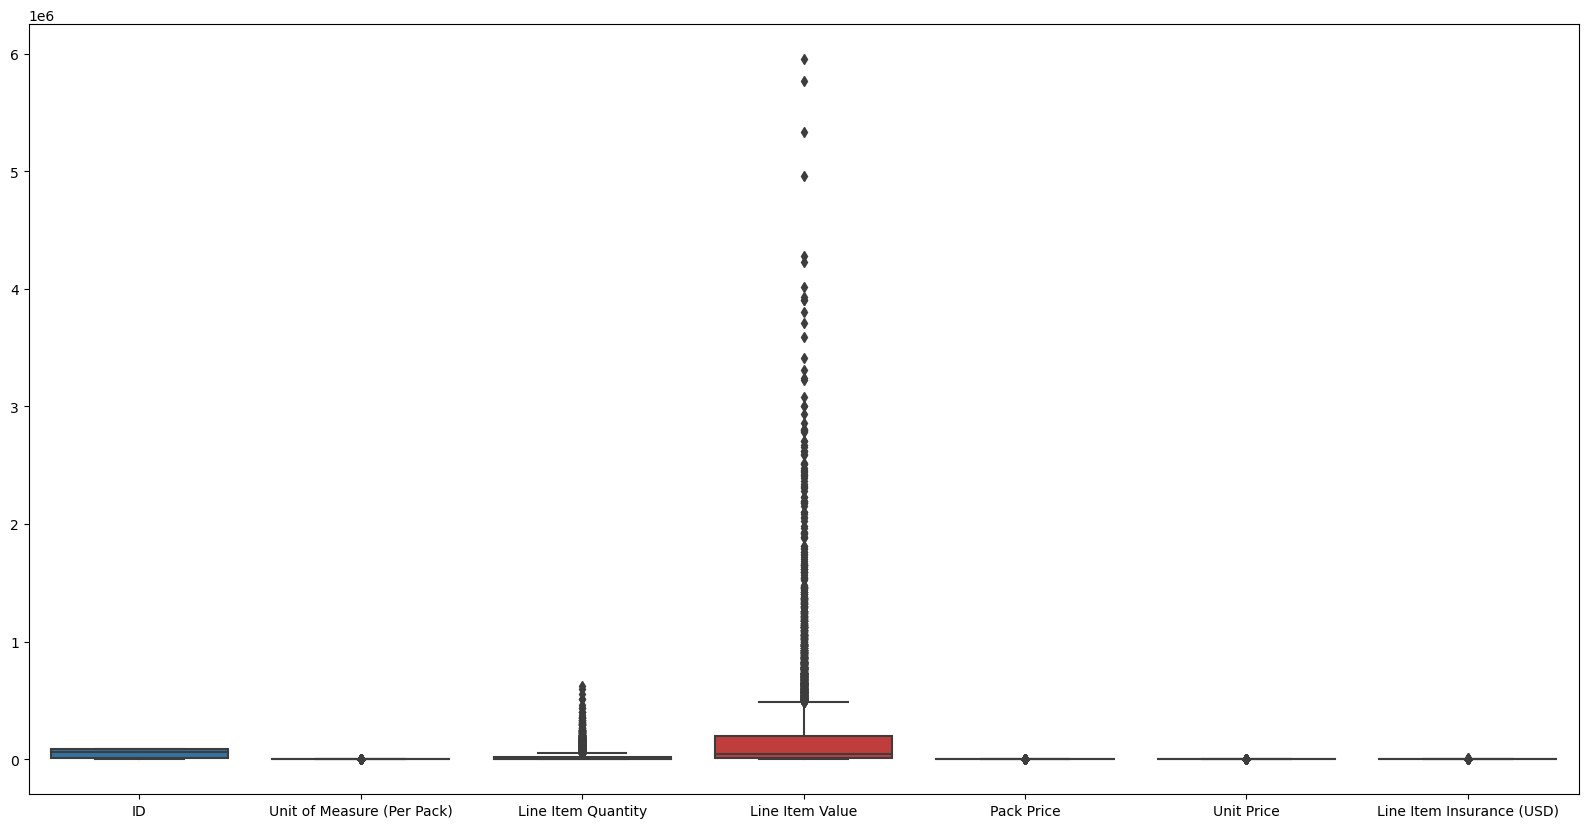

In [135]:
# Outliers
plt.figure(figsize=(20,10))
sns.boxplot(df[num_cols])
plt.show()

1. Line Item Value and Line Item Quantity has lots of outliers

In [12]:
df[cat_cols].describe().T  # Statistical description for categorical column

,count,unique,top,freq
Project Code,10324,142,116-ZA-T30,768
PQ #,10324,1237,Pre-PQ Process,2681
PO / SO #,10324,6233,SCMS-199289,67
ASN/DN #,10324,7030,ASN-19166,54
Country,10324,43,South Africa,1406
Managed By,10324,4,PMO - US,10265
Fulfill Via,10324,2,From RDC,5404
Vendor INCO Term,10324,8,N/A - From RDC,5404
Shipment Mode,9964,4,Air,6113
PQ First Sent to Client Date,10324,765,Pre-PQ Process,2476


# Corelation

C:\Users\miqba\AppData\Local\Temp\ipykernel_14668\4250830967.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


<Axes: >

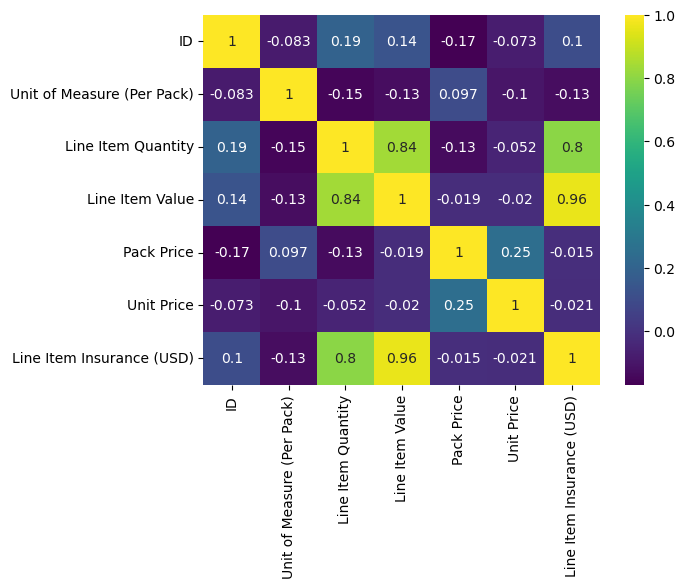

In [33]:
# For numerical columns
sns.heatmap(df.corr(),annot=True,cmap='viridis')

1. Line Item Value and Line Item Quantity is highly positive corelated with Line Item Insurance(USD)

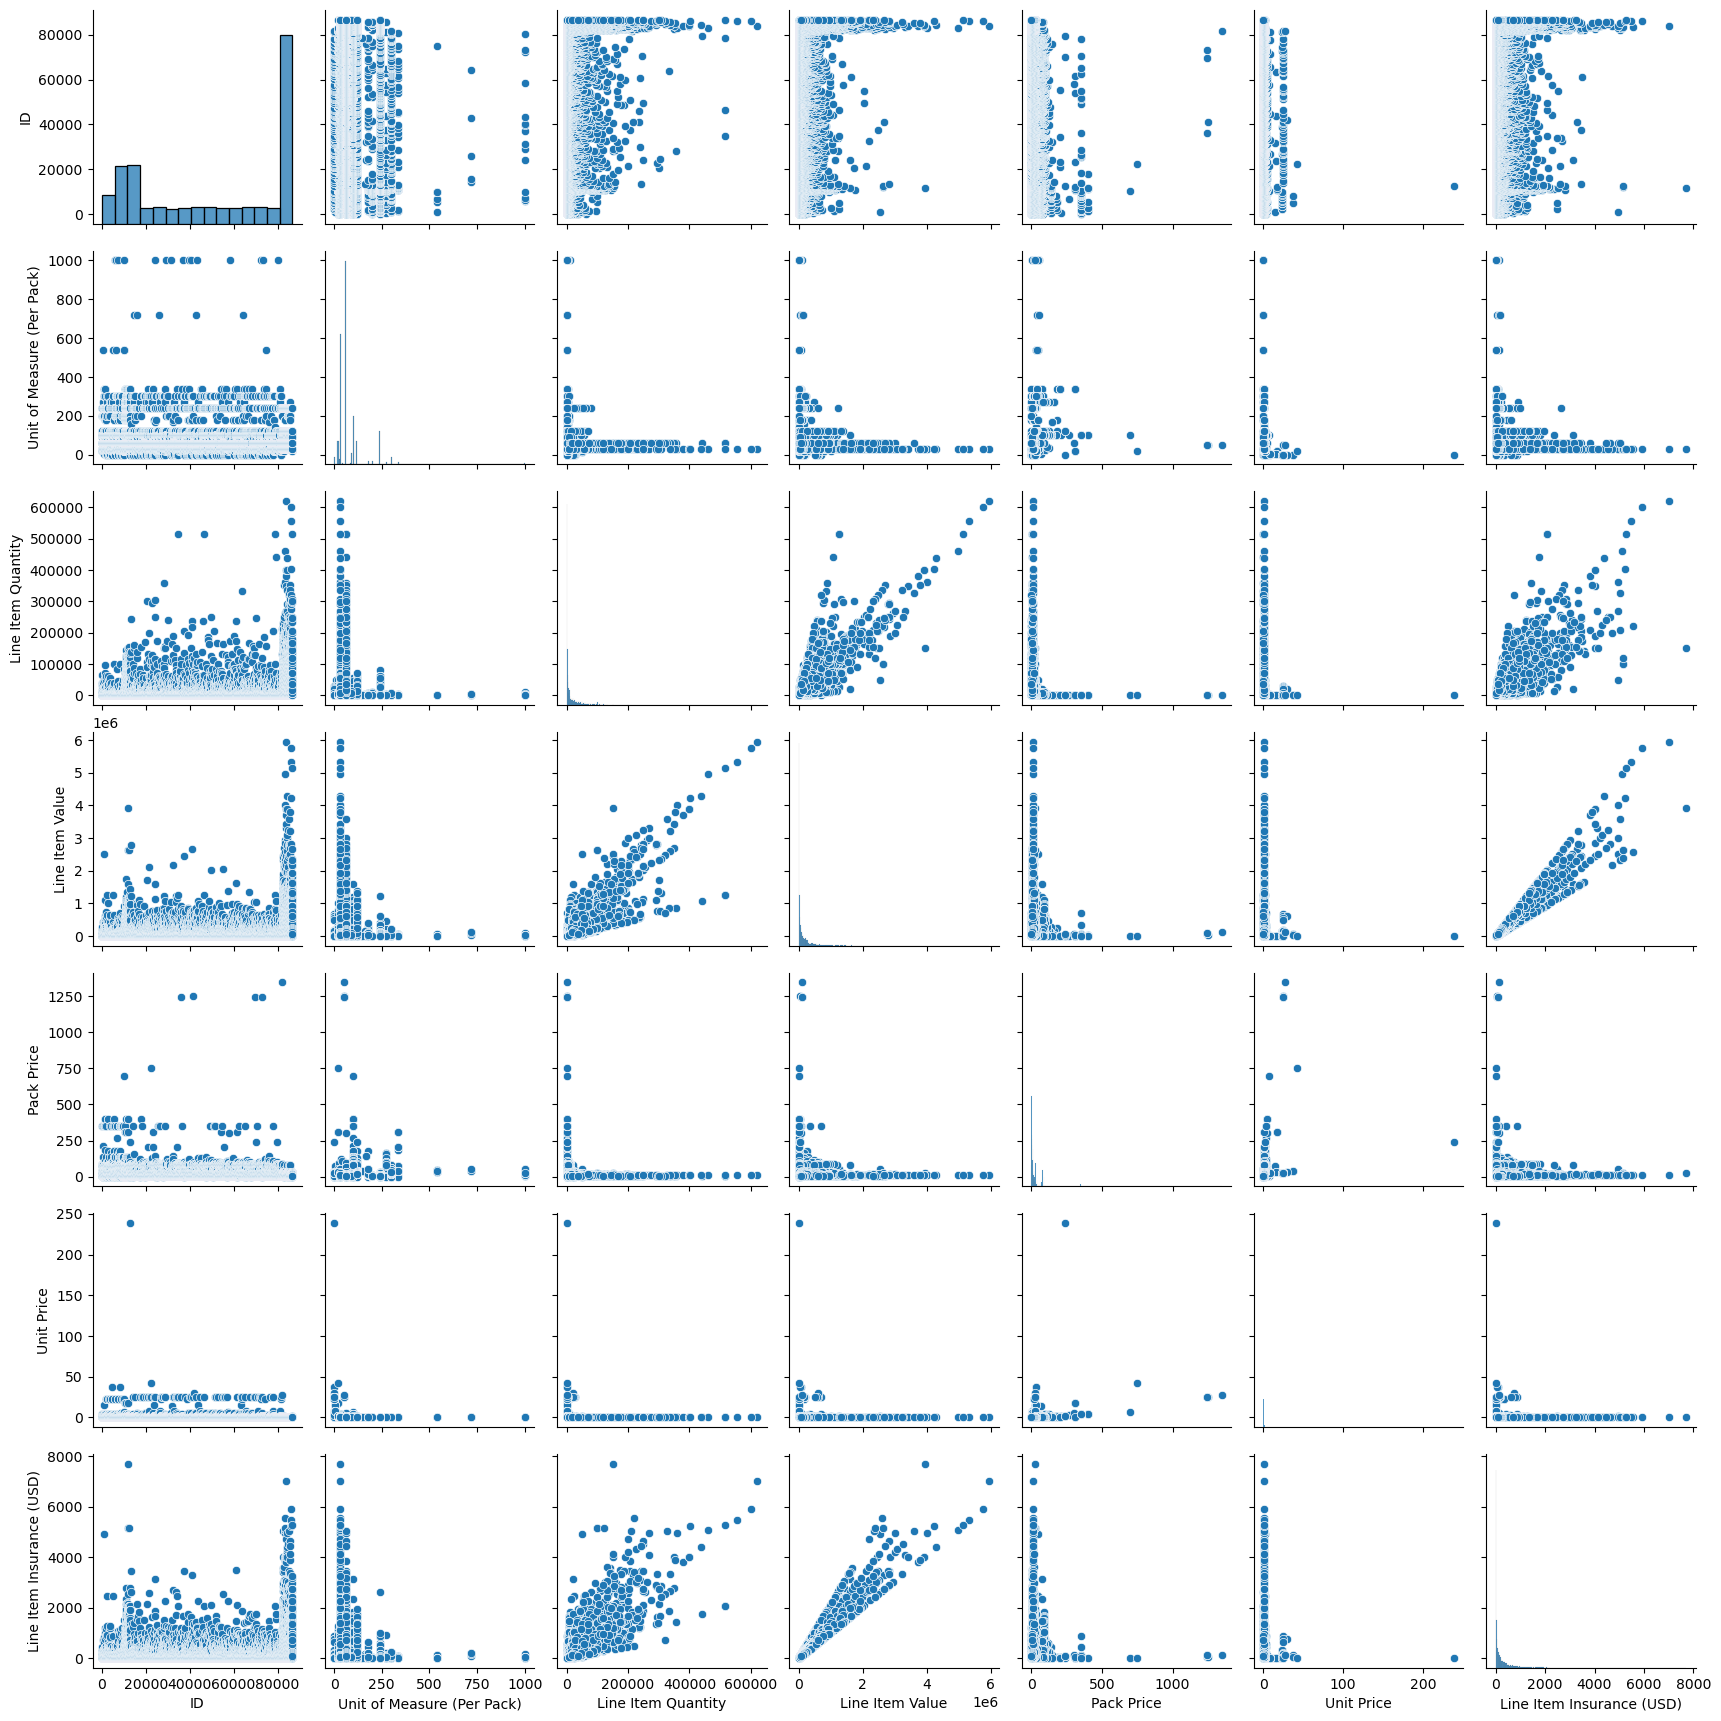

In [63]:
sns.pairplot(df[num_cols])

In [64]:
# For categorical column
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Filter out only the categorical columns from the DataFrame
categorical_df = df.select_dtypes(include='object')

# Calculate the Cramér's V correlation matrix for the categorical columns
correlation_matrix = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns, dtype=float)

for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        confusion_matrix = pd.crosstab(categorical_df[col1], categorical_df[col2])
        correlation_value = cramers_v(confusion_matrix.values)
        correlation_matrix.loc[col1, col2] = correlation_value

# Filter and display correlations greater than 0.8
threshold = 0.8
high_correlations = correlation_matrix[correlation_matrix > threshold]
print("Cramér's V correlation matrix with correlations > 0.8:")
print(high_correlations)

Cramér's V correlation matrix with correlations > 0.8:
                              Project Code      PQ #  PO / SO #  ASN/DN #  \
Project Code                      1.000000       NaN        NaN       NaN   
PQ #                                   NaN  1.000000        NaN       NaN   
PO / SO #                              NaN       NaN   1.000000  0.941601   
ASN/DN #                               NaN       NaN   0.941601  1.000000   
Country                           0.995174       NaN        NaN       NaN   
Managed By                             NaN  0.938362        NaN       NaN   
Fulfill Via                            NaN       NaN        NaN       NaN   
Vendor INCO Term                       NaN       NaN        NaN       NaN   
Shipment Mode                          NaN       NaN        NaN       NaN   
PQ First Sent to Client Date           NaN  0.974274        NaN       NaN   
PO Sent to Vendor Date                 NaN       NaN        NaN       NaN   
Scheduled Delivery Da

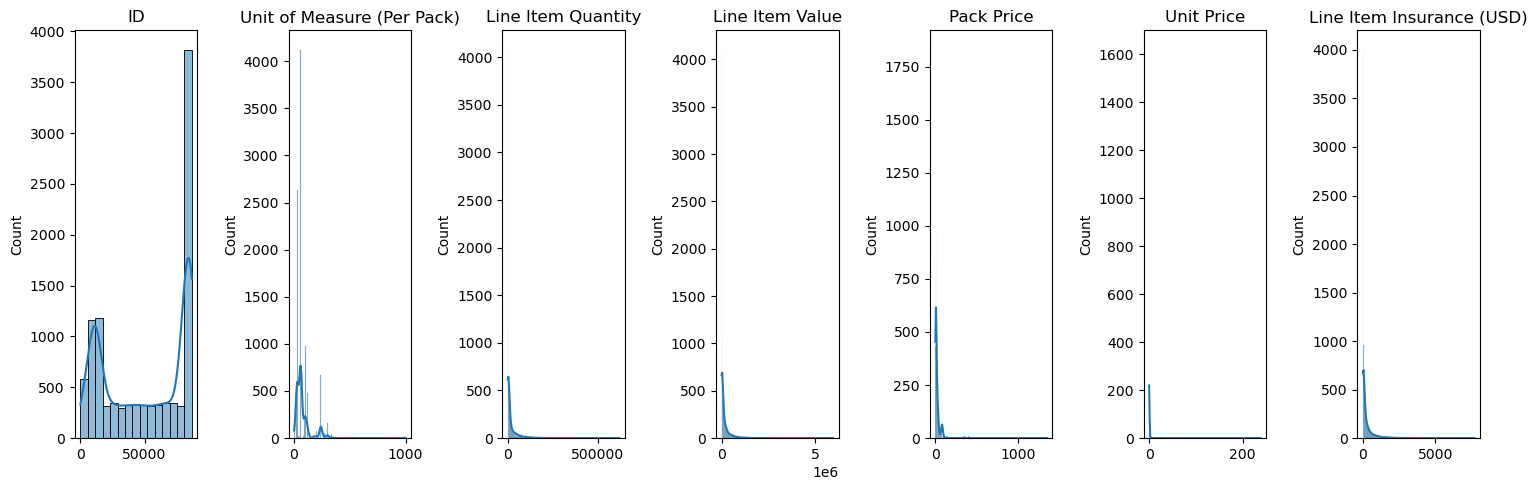

In [19]:
# Create a figure with subplots for all the numerical columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

# Loop through each numerical column and plot the histogram on its corresponding subplot
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)  # Using histplot with KDE (Kernel Density Estimation) enabled
    axes[i].set_title(col)  # Set the title for each subplot
    axes[i].set_xlabel('')  # Remove x-axis label to avoid duplication
    
plt.tight_layout()  # Adjust layout to prevent overlapping of subplots
plt.show()

In [65]:
# Checking value_count of each categorical column
categorical_df = df[cat_cols].copy()
[categorical_df[i].value_counts() for i in categorical_df]

[116-ZA-T30    768
 104-CI-T30    729
 151-NG-T30    628
 114-UG-T30    596
 108-VN-T30    522
              ... 
 100-SN-T01      1
 201-UG-T30      1
 100-GN-T30      1
 A02-SN-T50      1
 104-SZ-T30      1
 Name: Project Code, Length: 142, dtype: int64,
 Pre-PQ Process    2681
 FPQ-14942          205
 FPQ-12522          154
 FPQ-13973          110
 FPQ-4537            98
                   ... 
 FPQ-12933            1
 FPQ-6823             1
 FPQ-15736            1
 FPQ-6128             1
 FPQ-16523            1
 Name: PQ #, Length: 1237, dtype: int64,
 SCMS-199289    67
 SCMS-199283    63
 SCMS-183950    55
 SCMS-215370    38
 SCMS-259075    38
                ..
 SCMS-260830     1
 SCMS-283040     1
 SCMS-149030     1
 SCMS-234070     1
 SO-51680        1
 Name: PO / SO #, Length: 6233, dtype: int64,
 ASN-19166    54
 ASN-24415    38
 ASN-23875    26
 ASN-32138    19
 ASN-28034    17
              ..
 ASN-11200     1
 ASN-23000     1
 ASN-19497     1
 ASN-24569     1
 DN-4334     

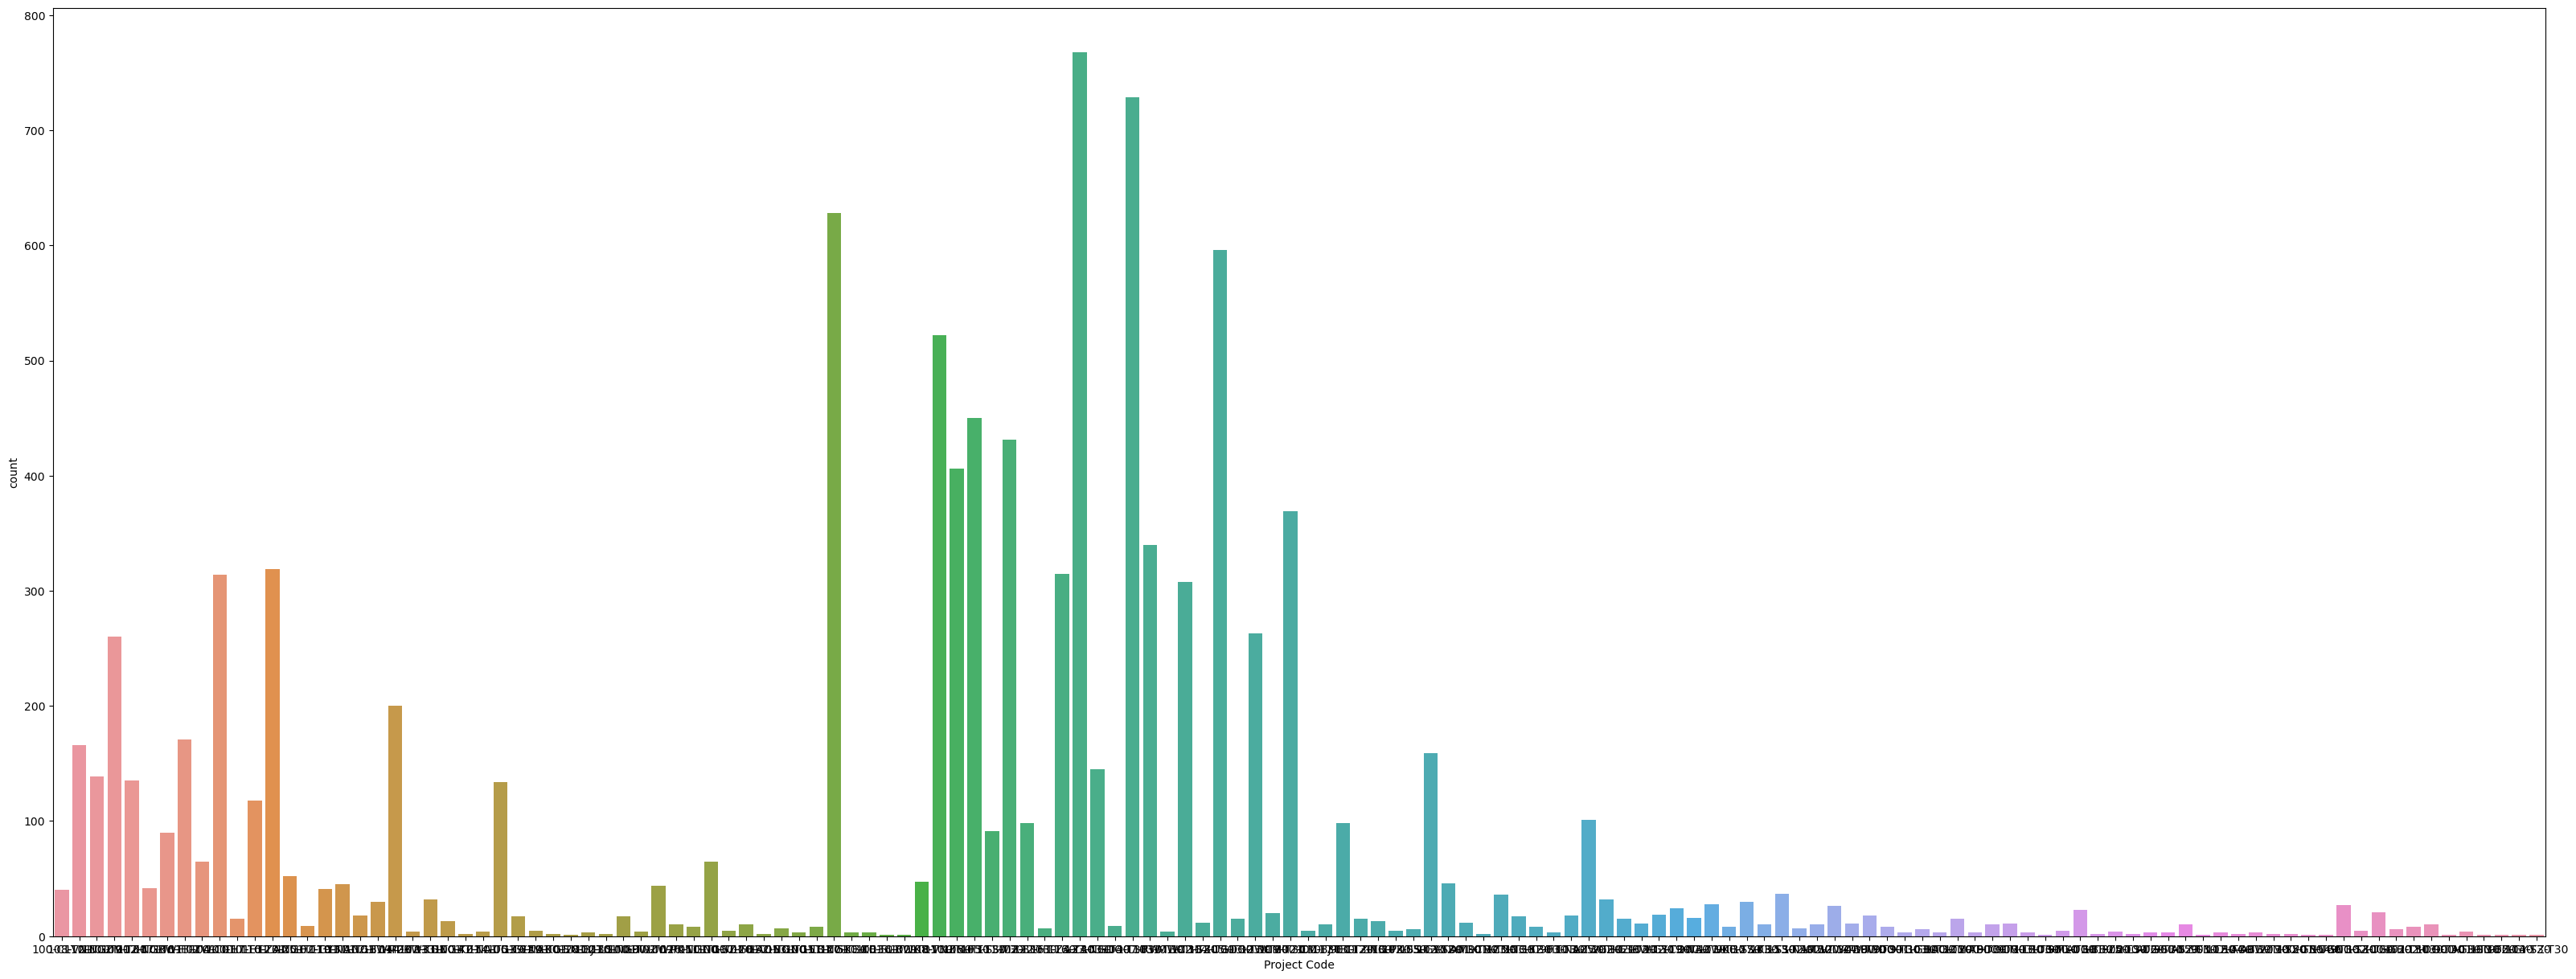

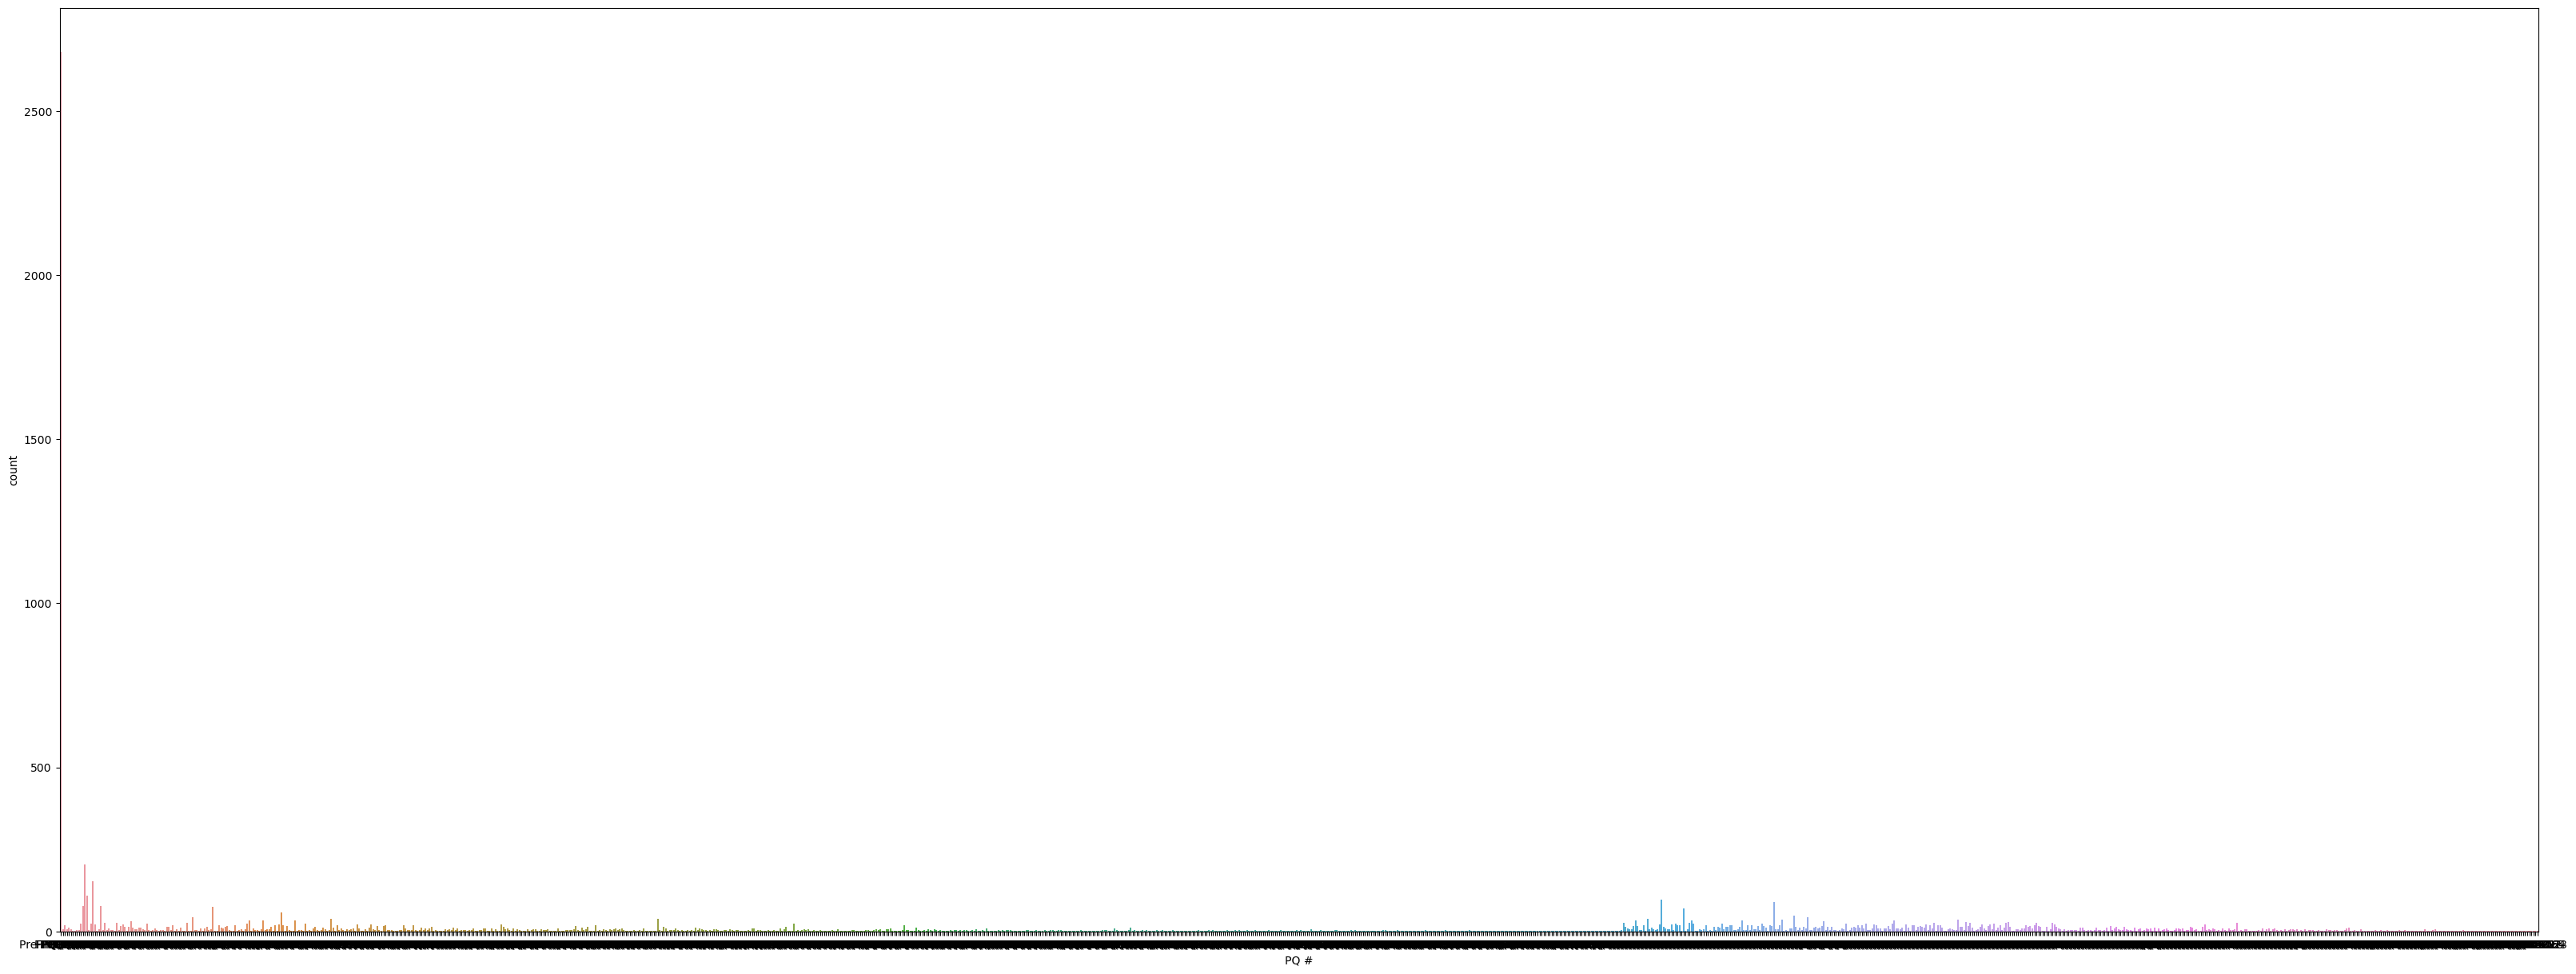

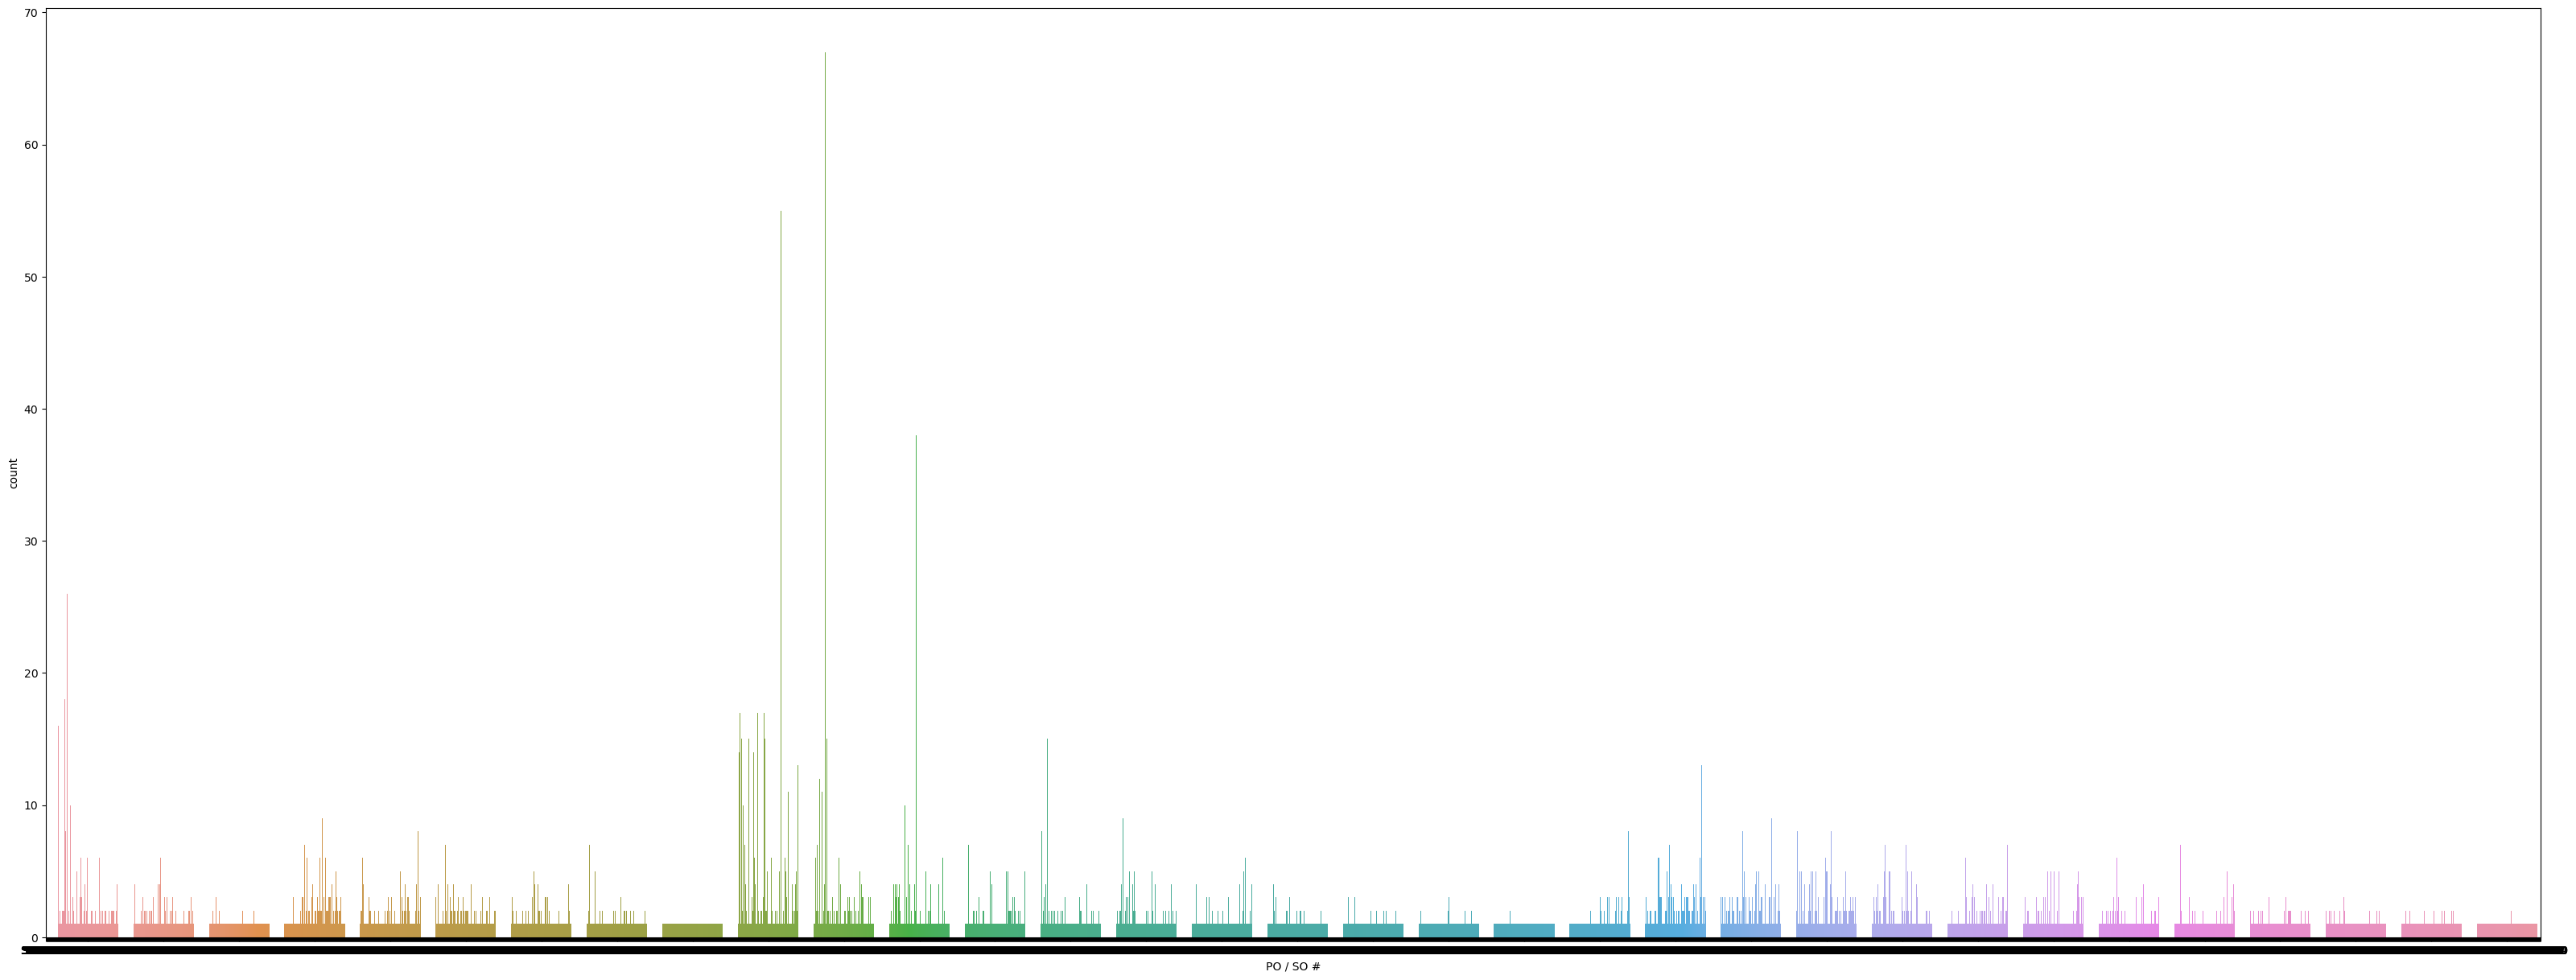

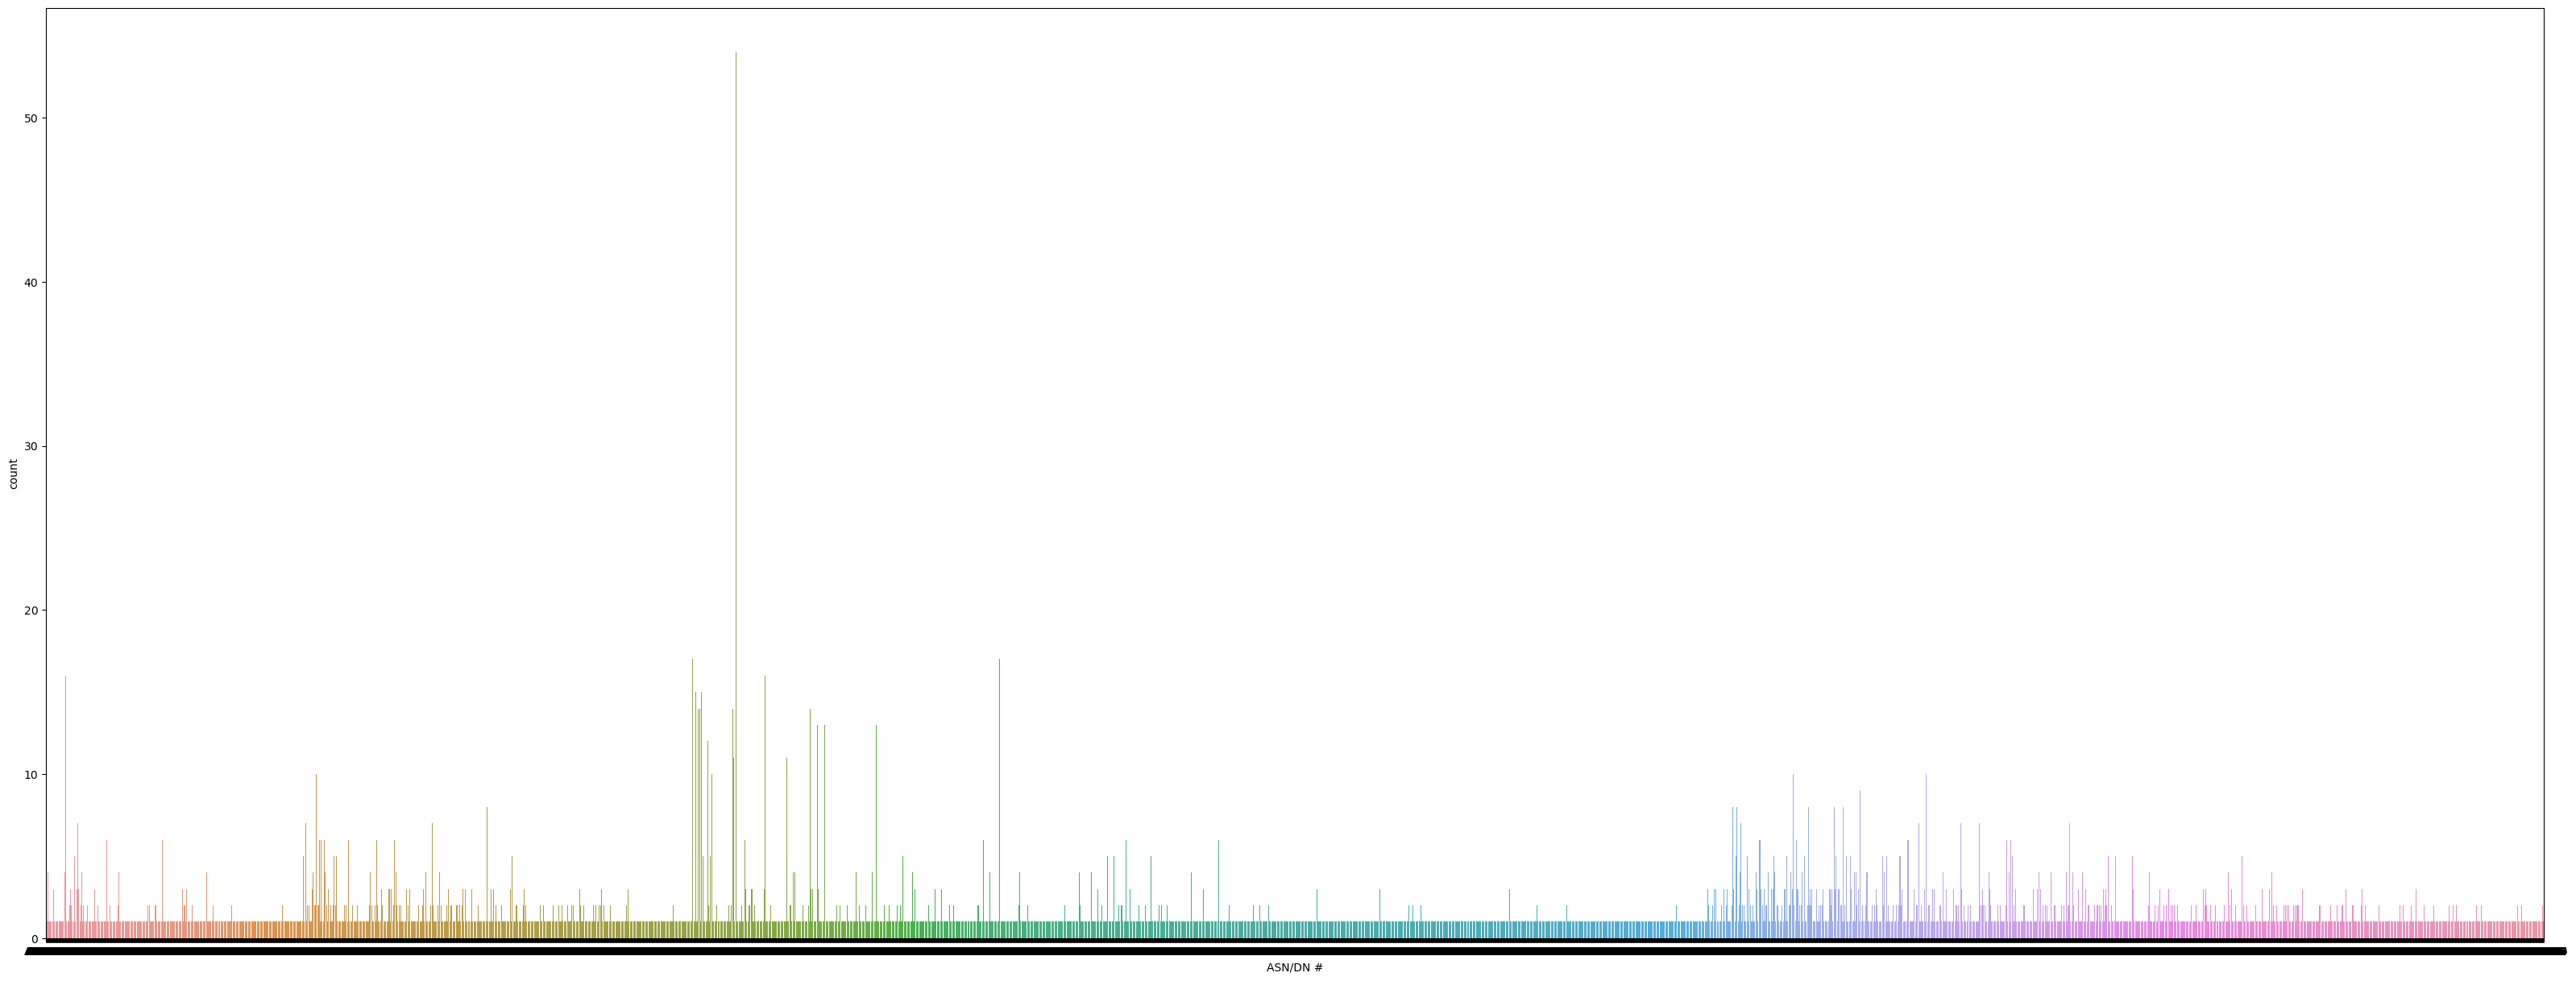

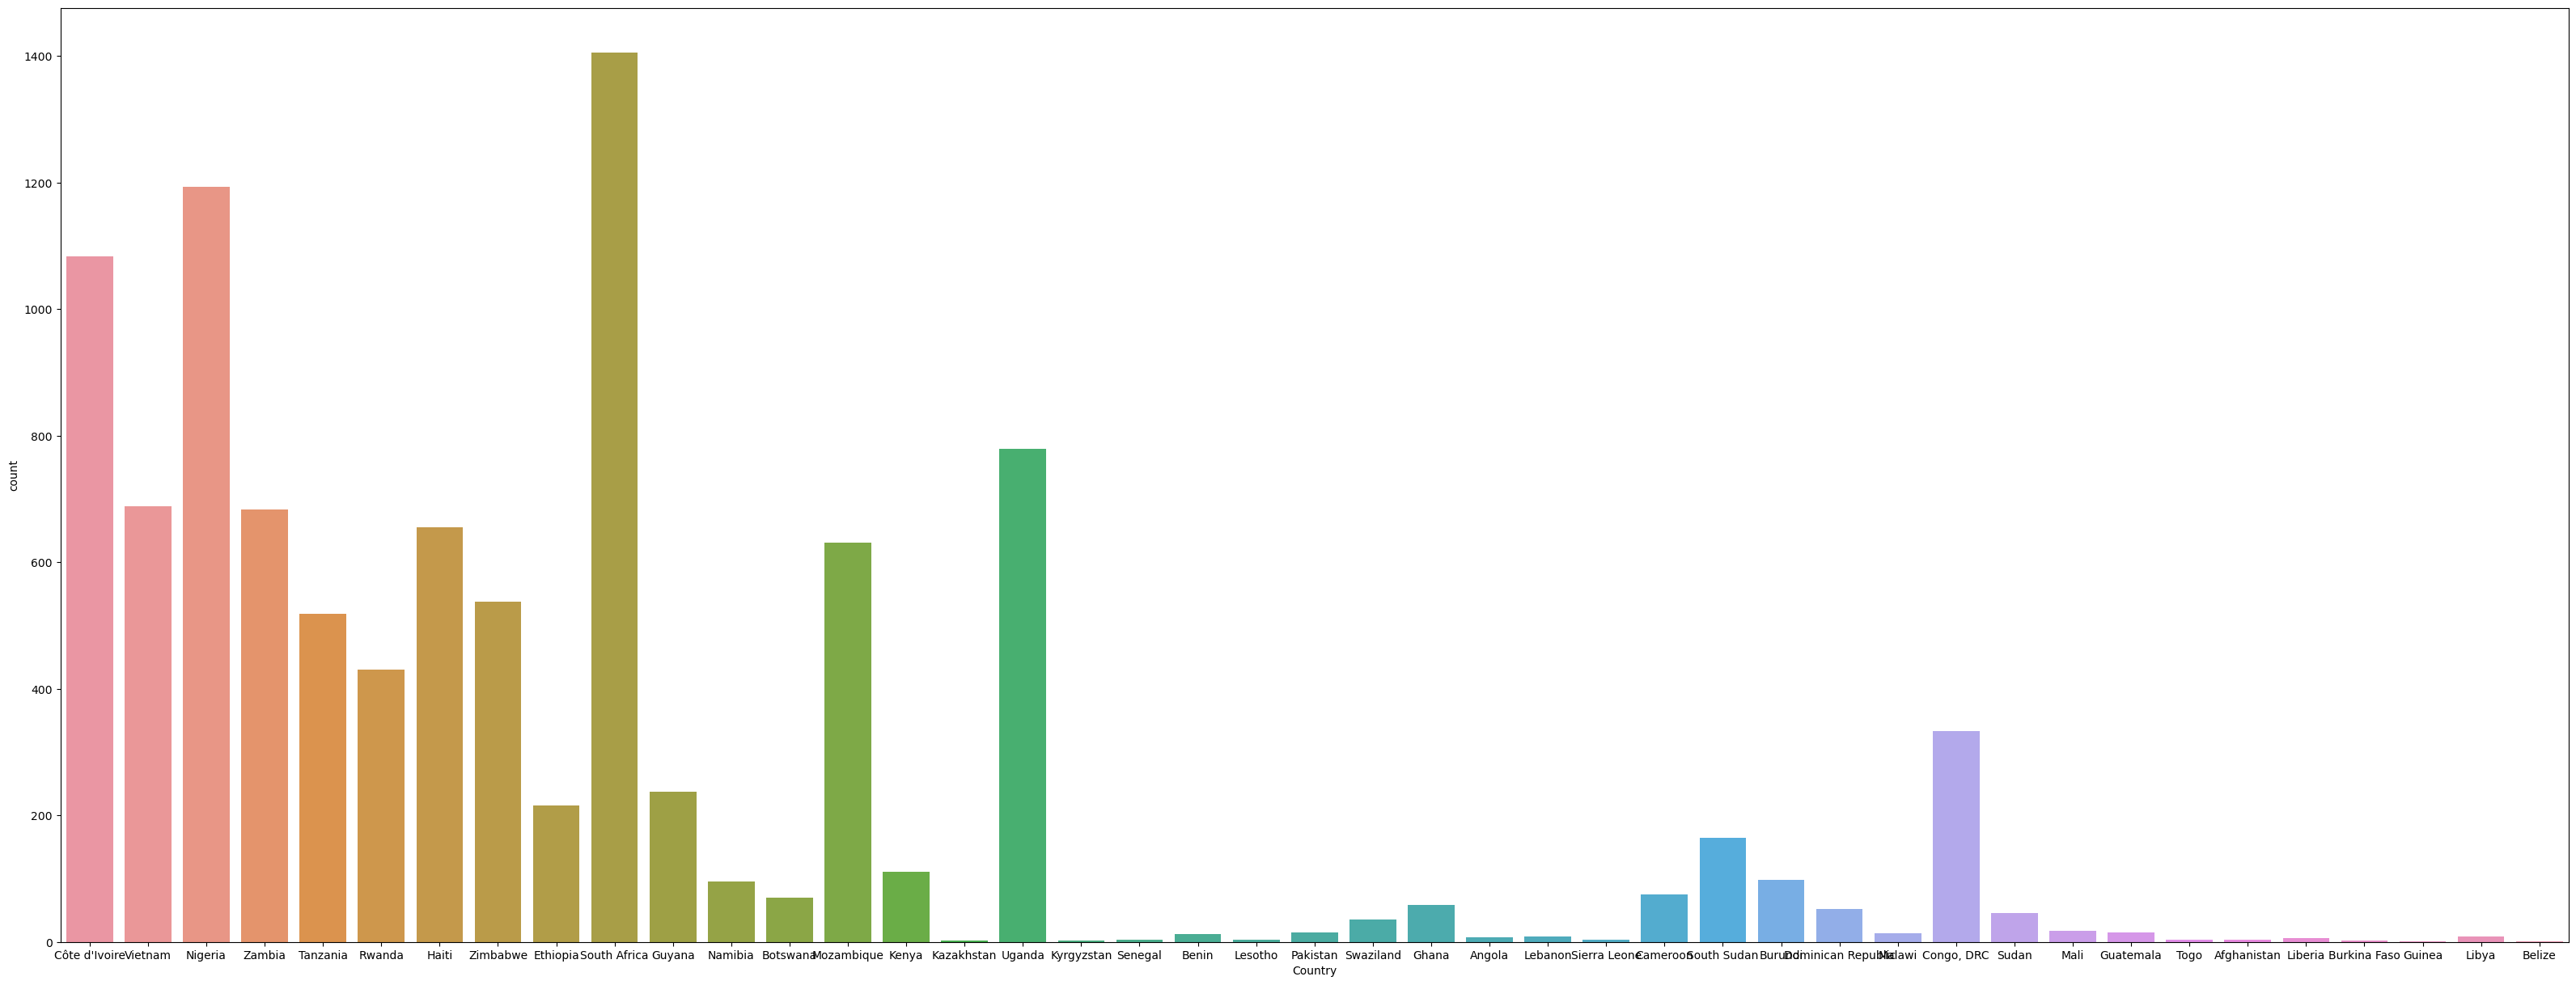

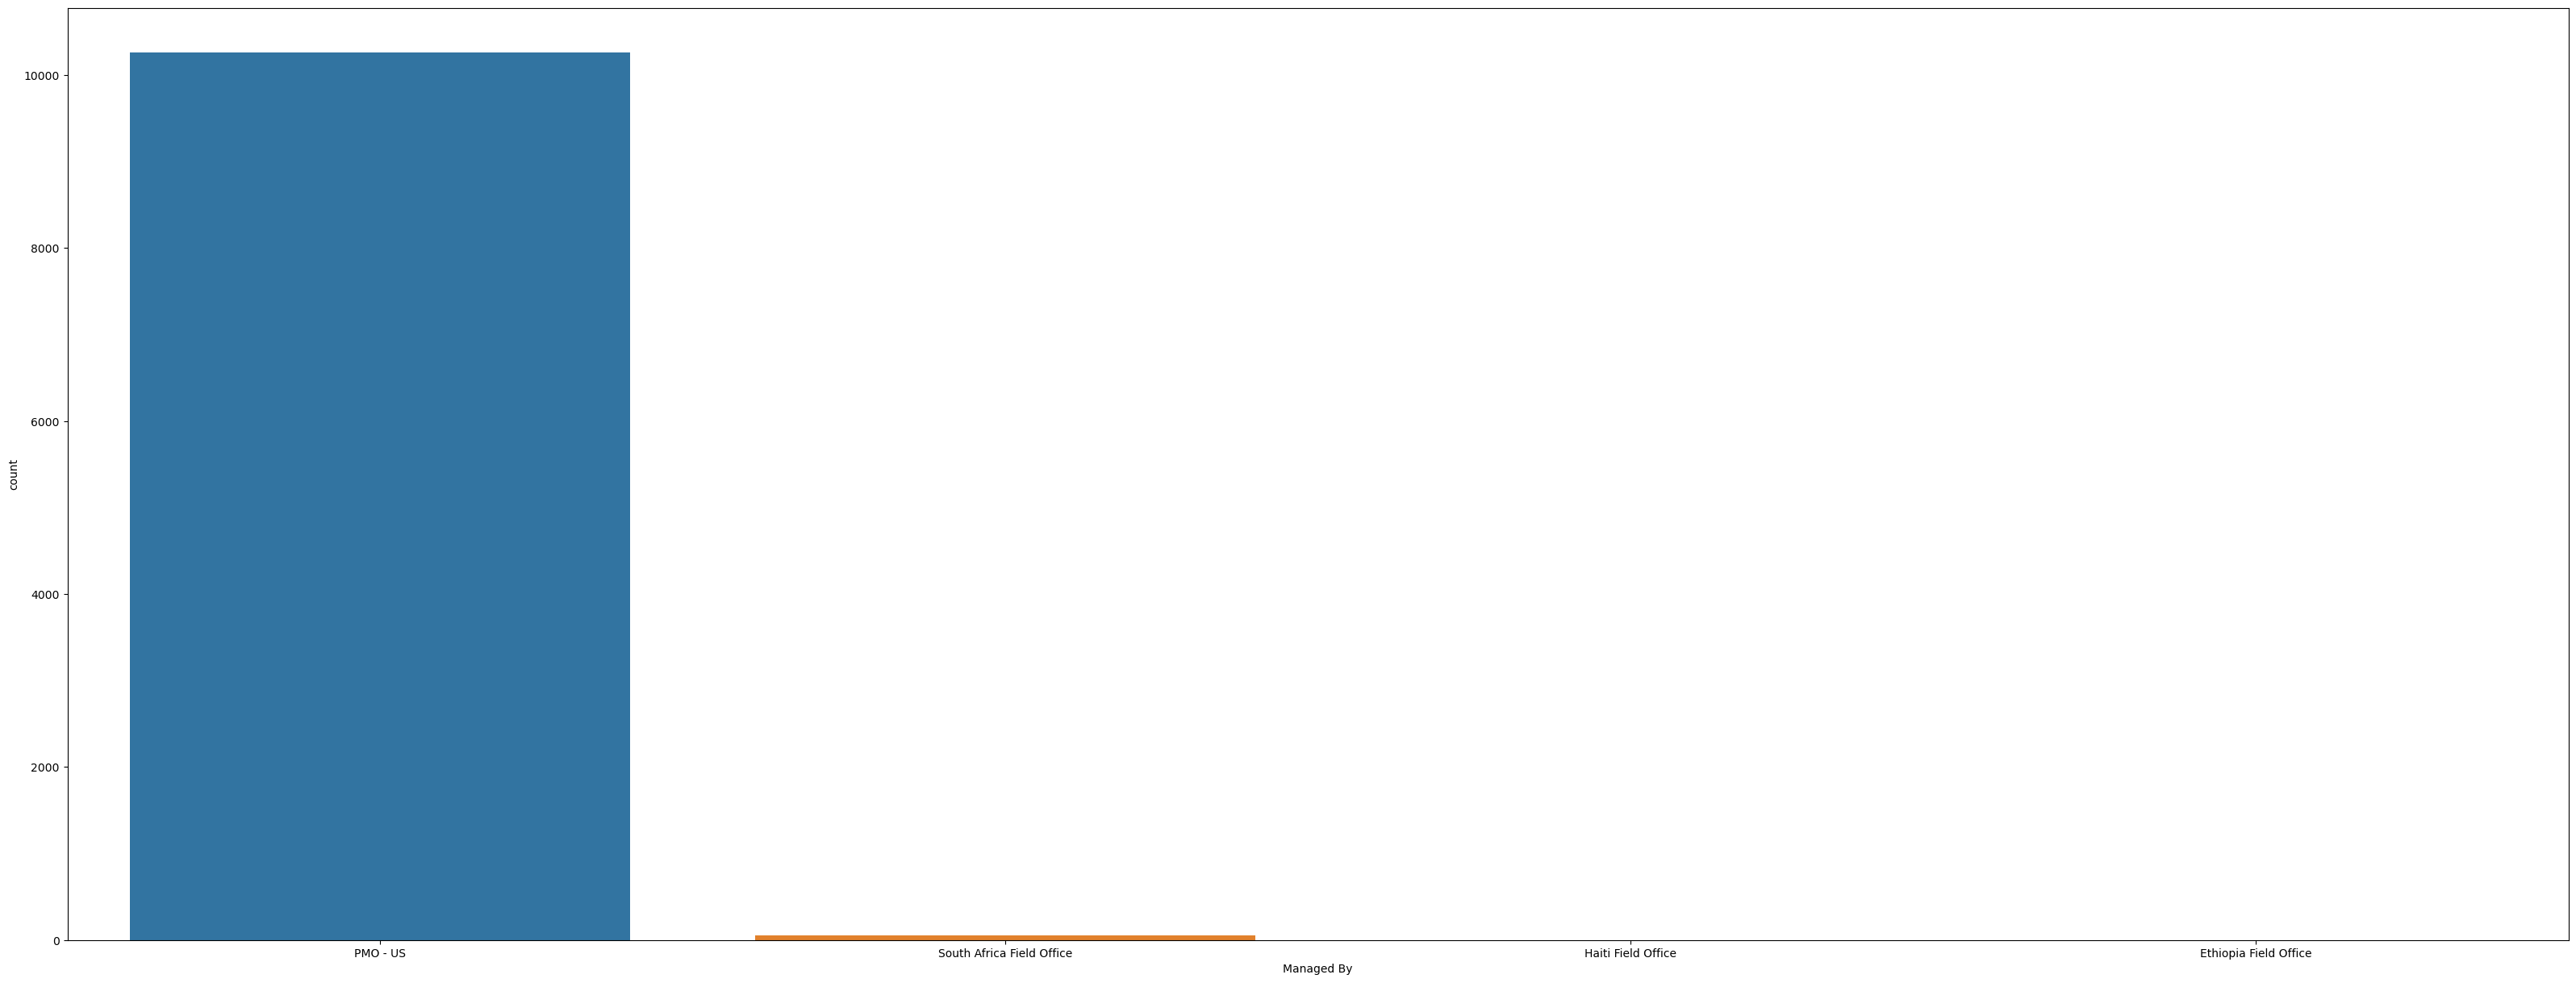

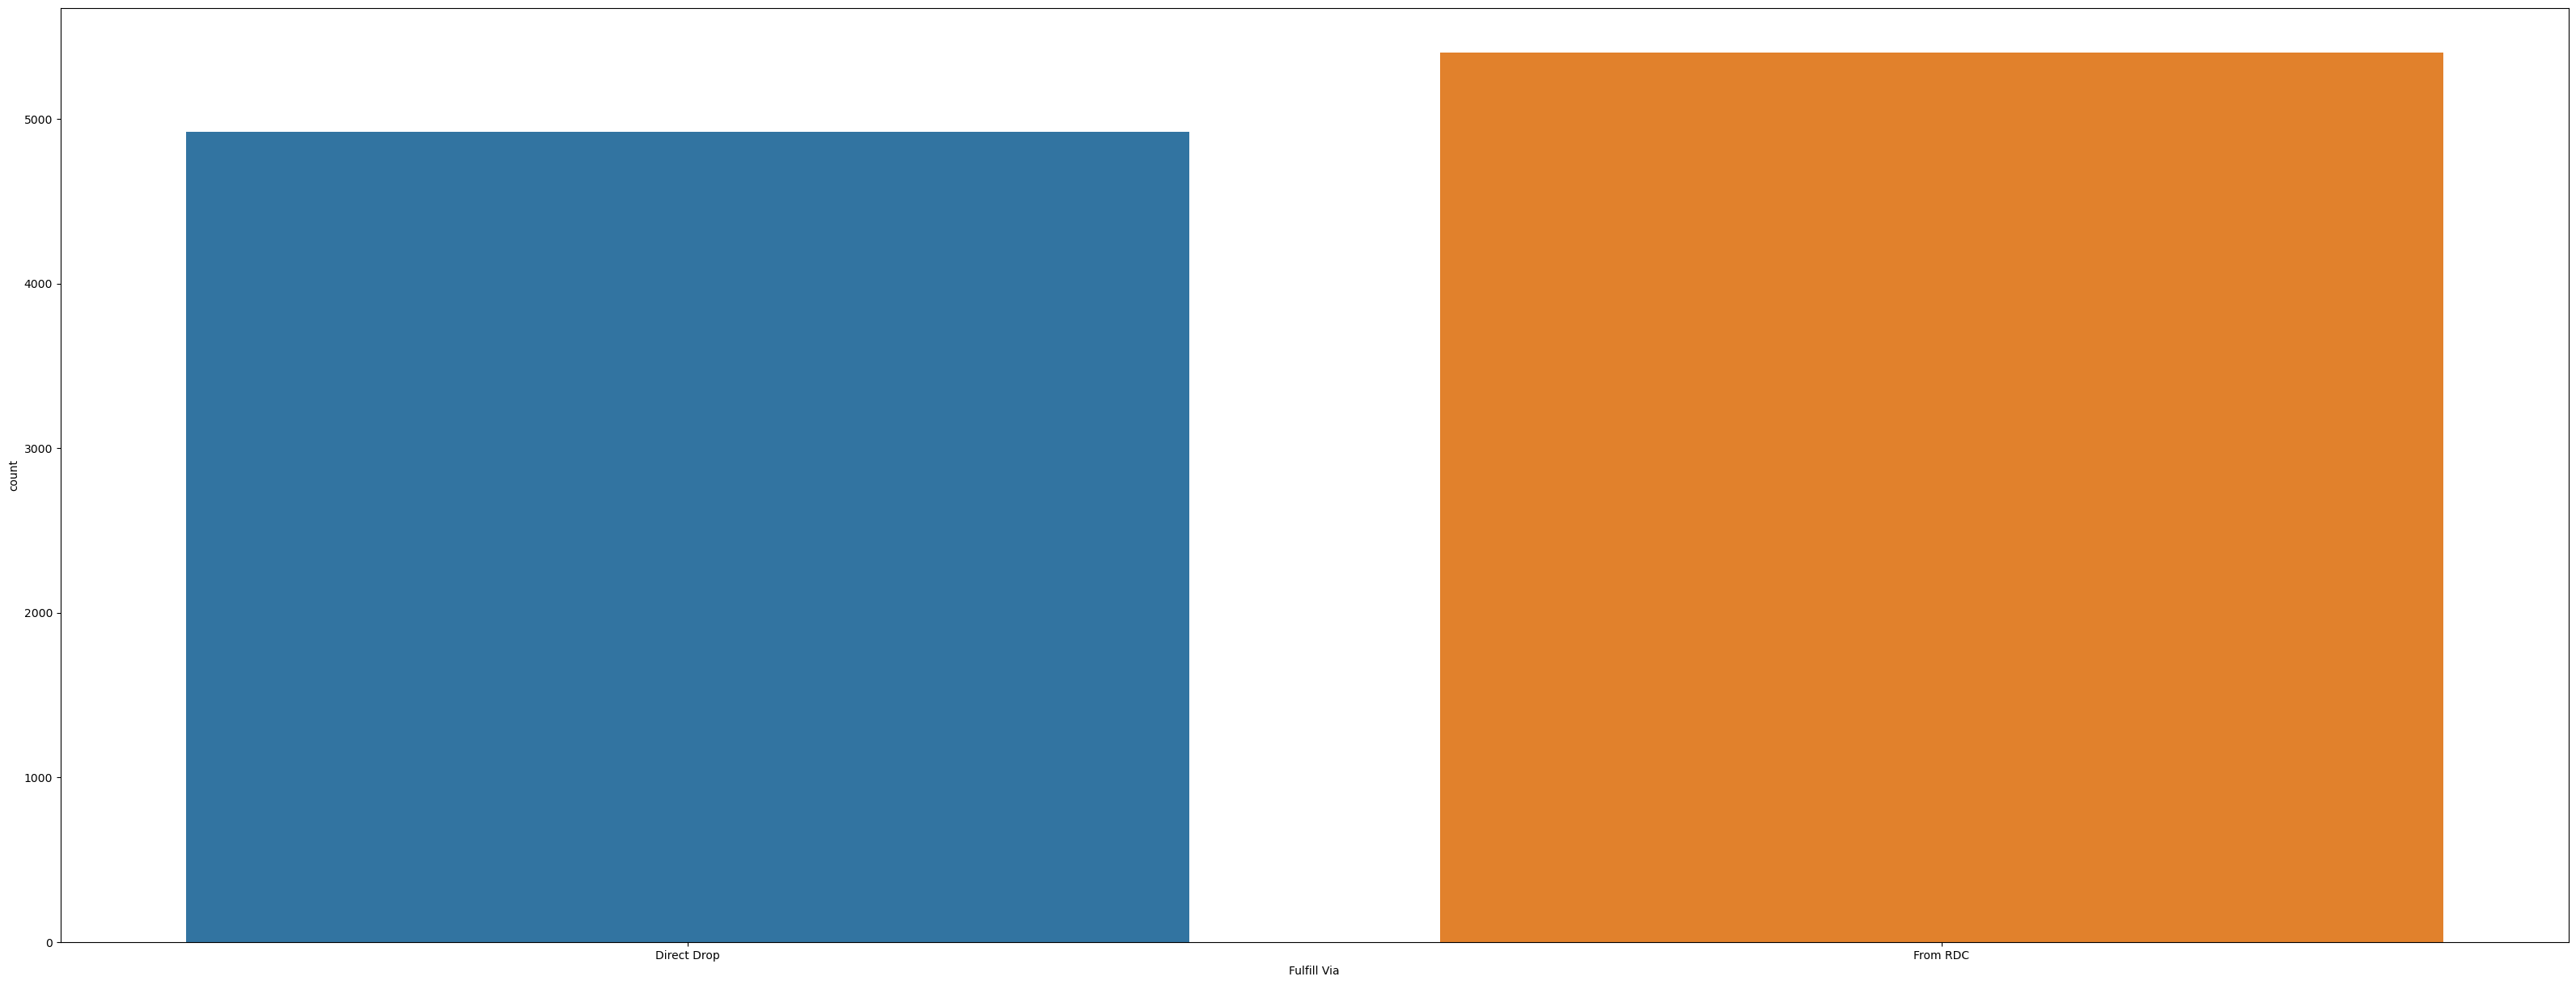

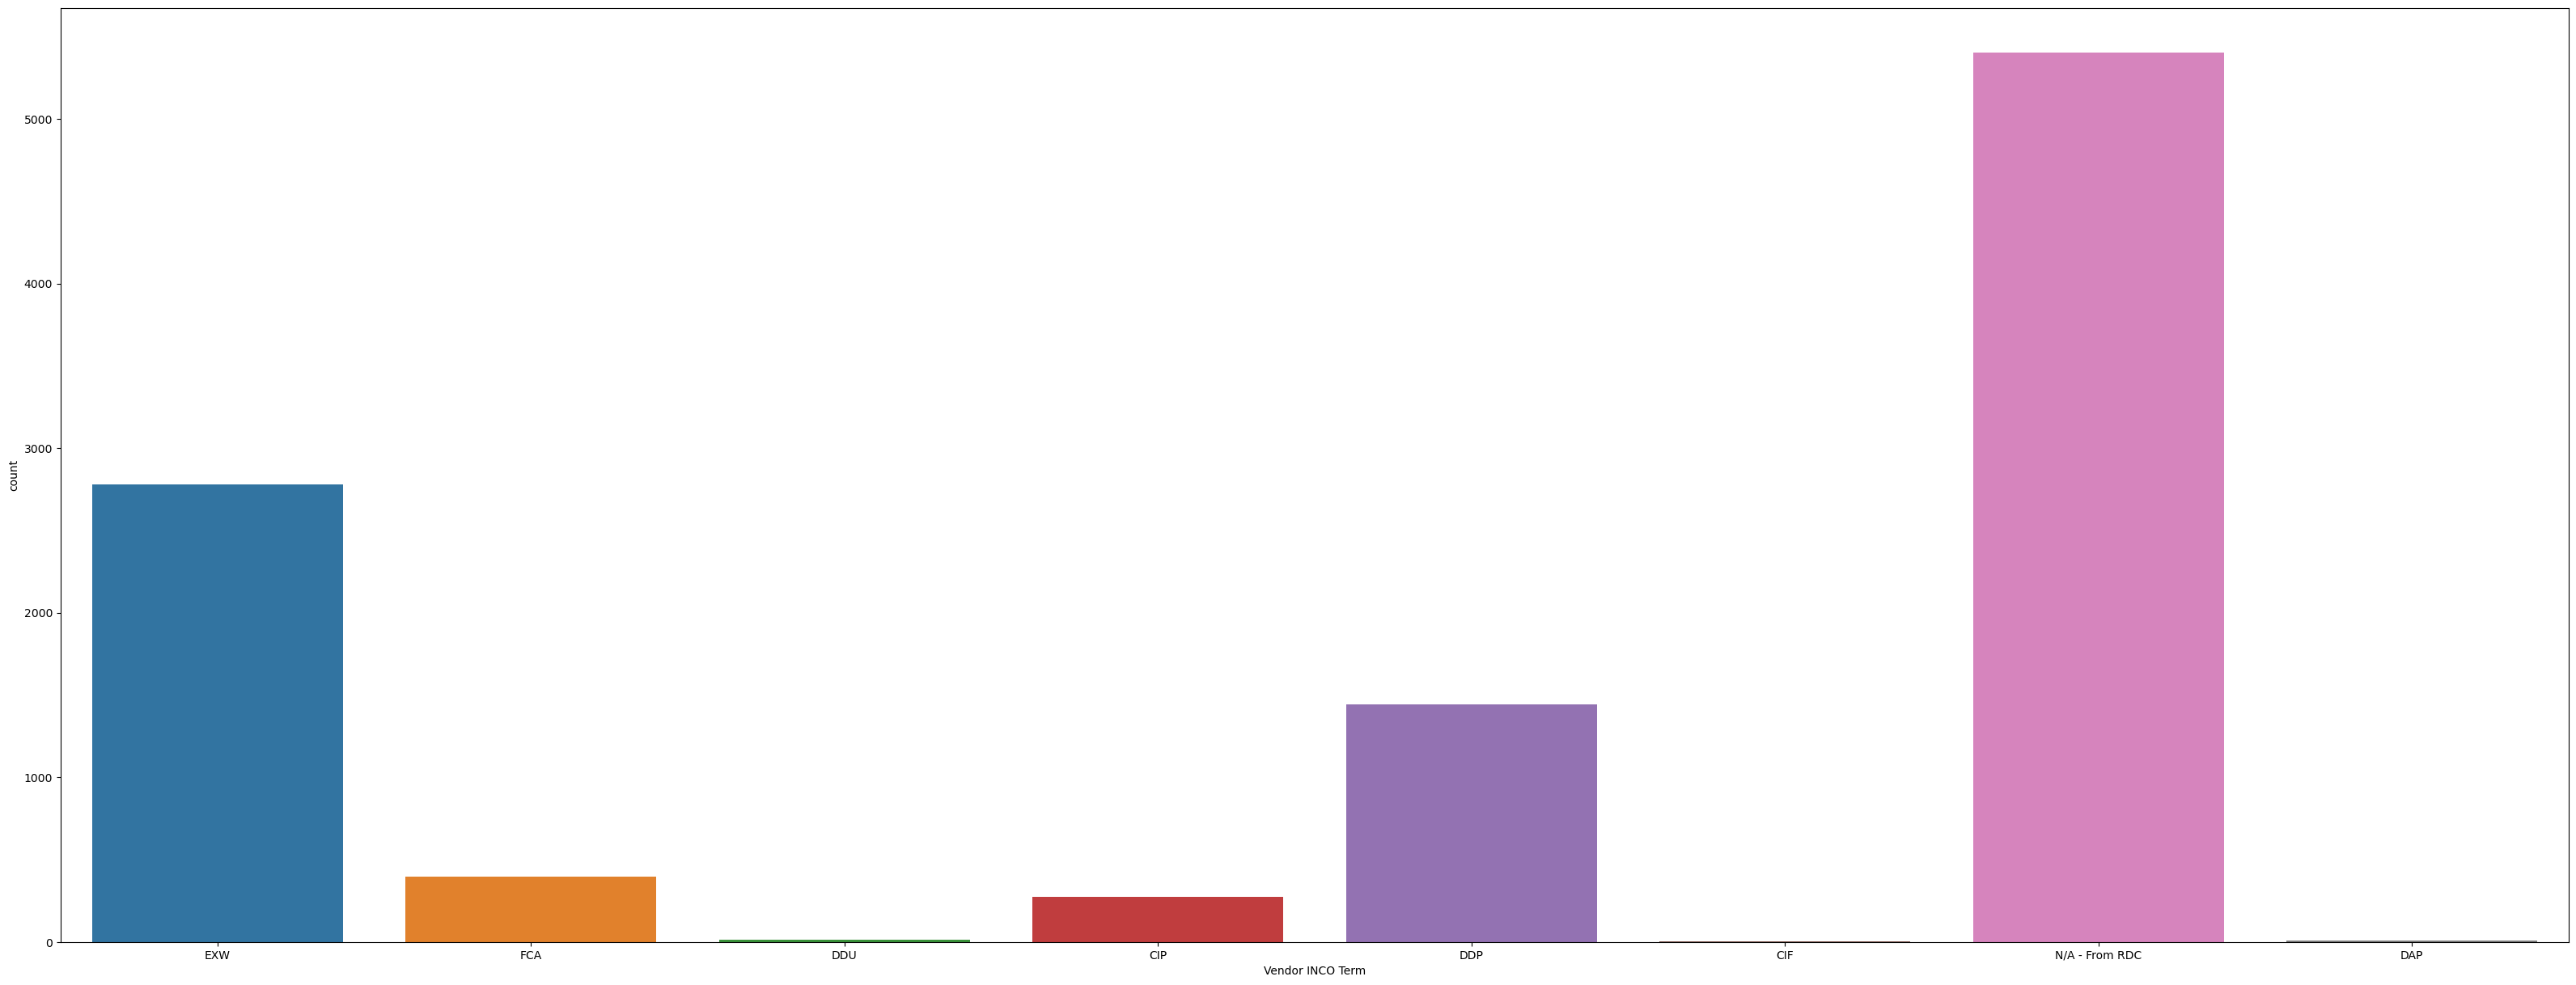

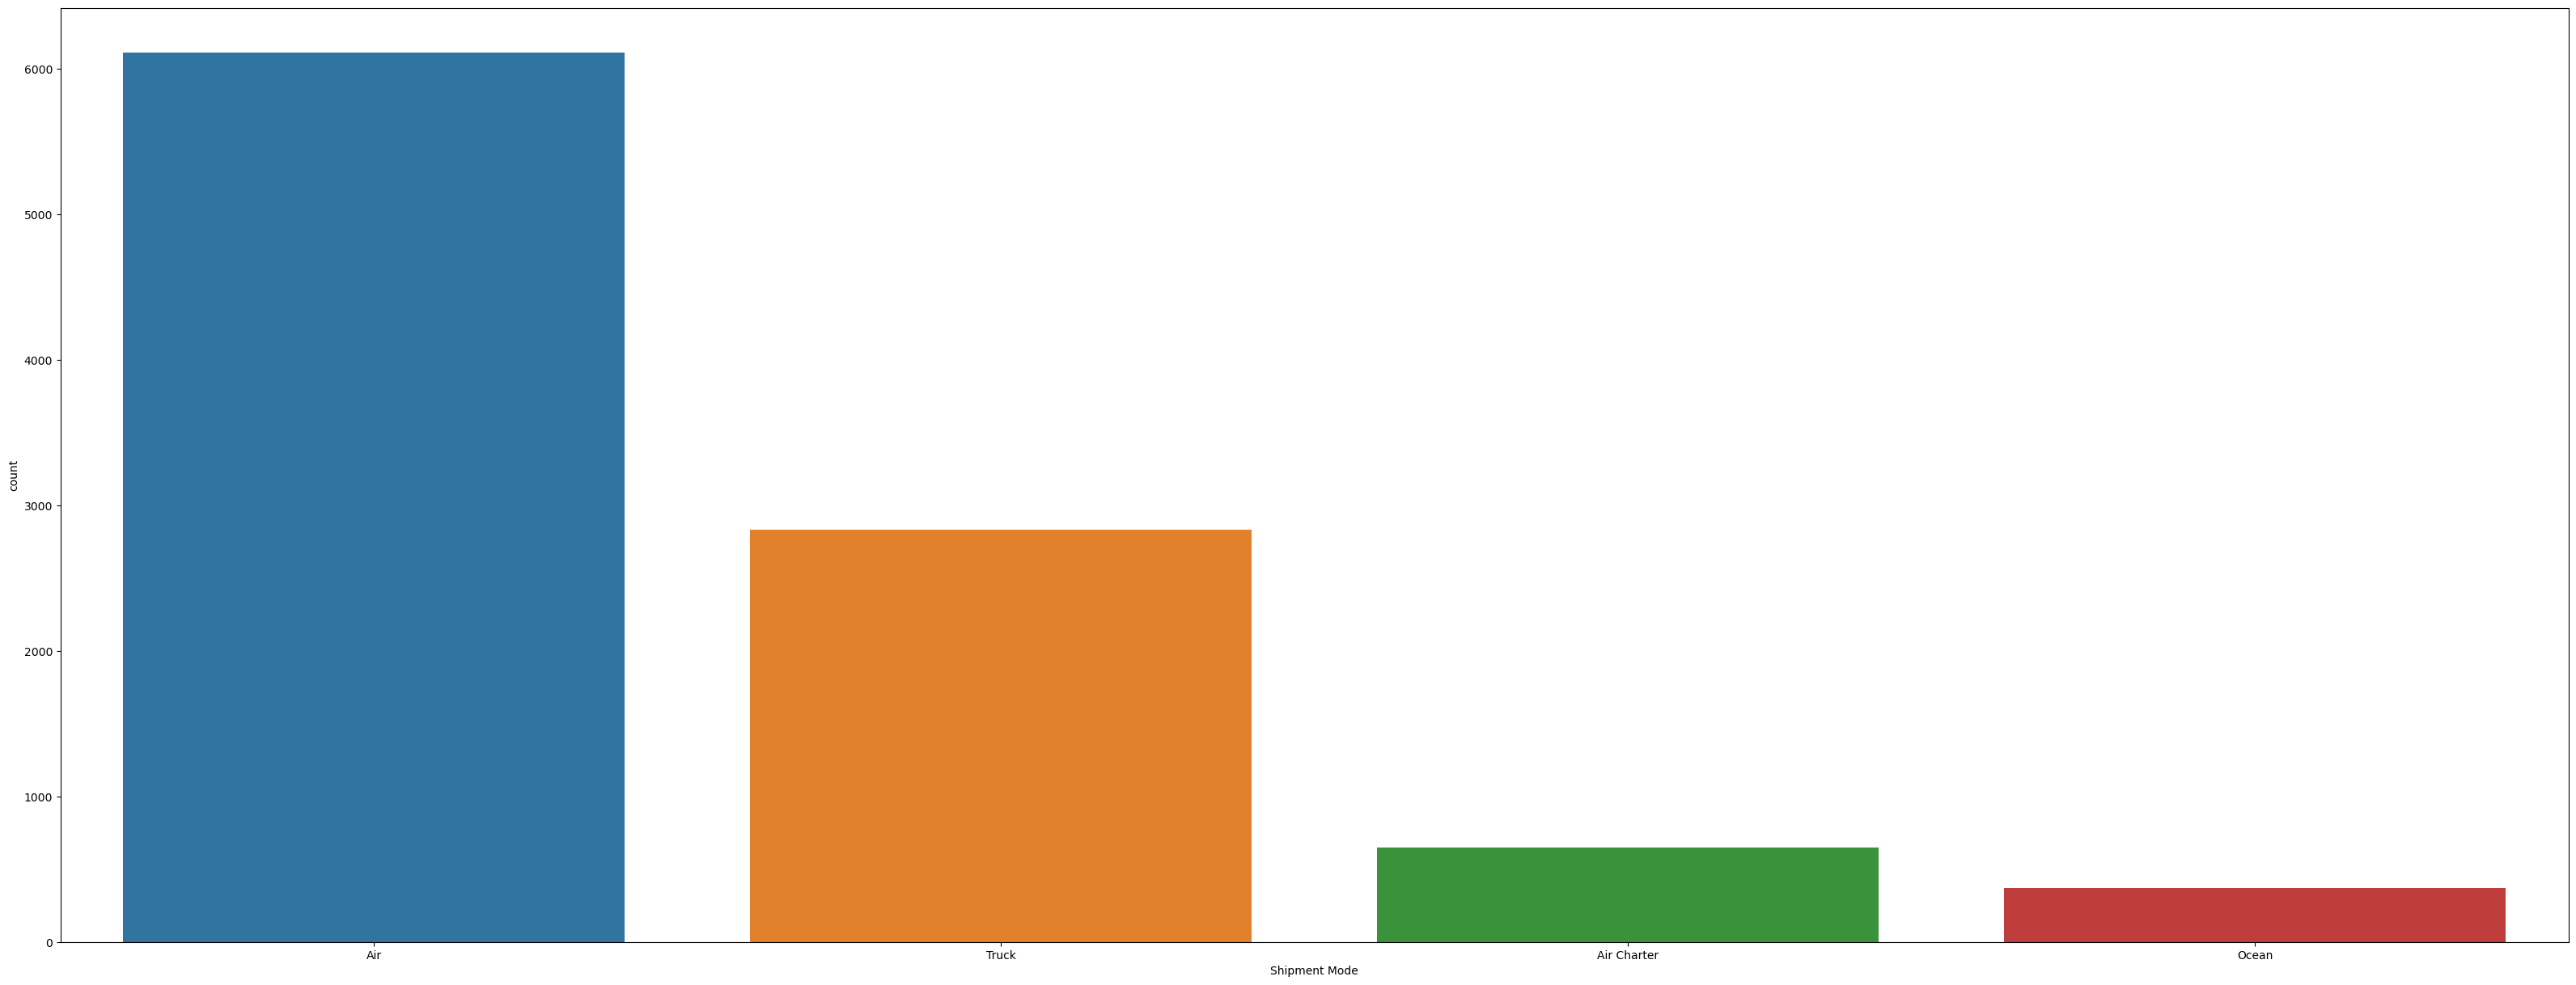

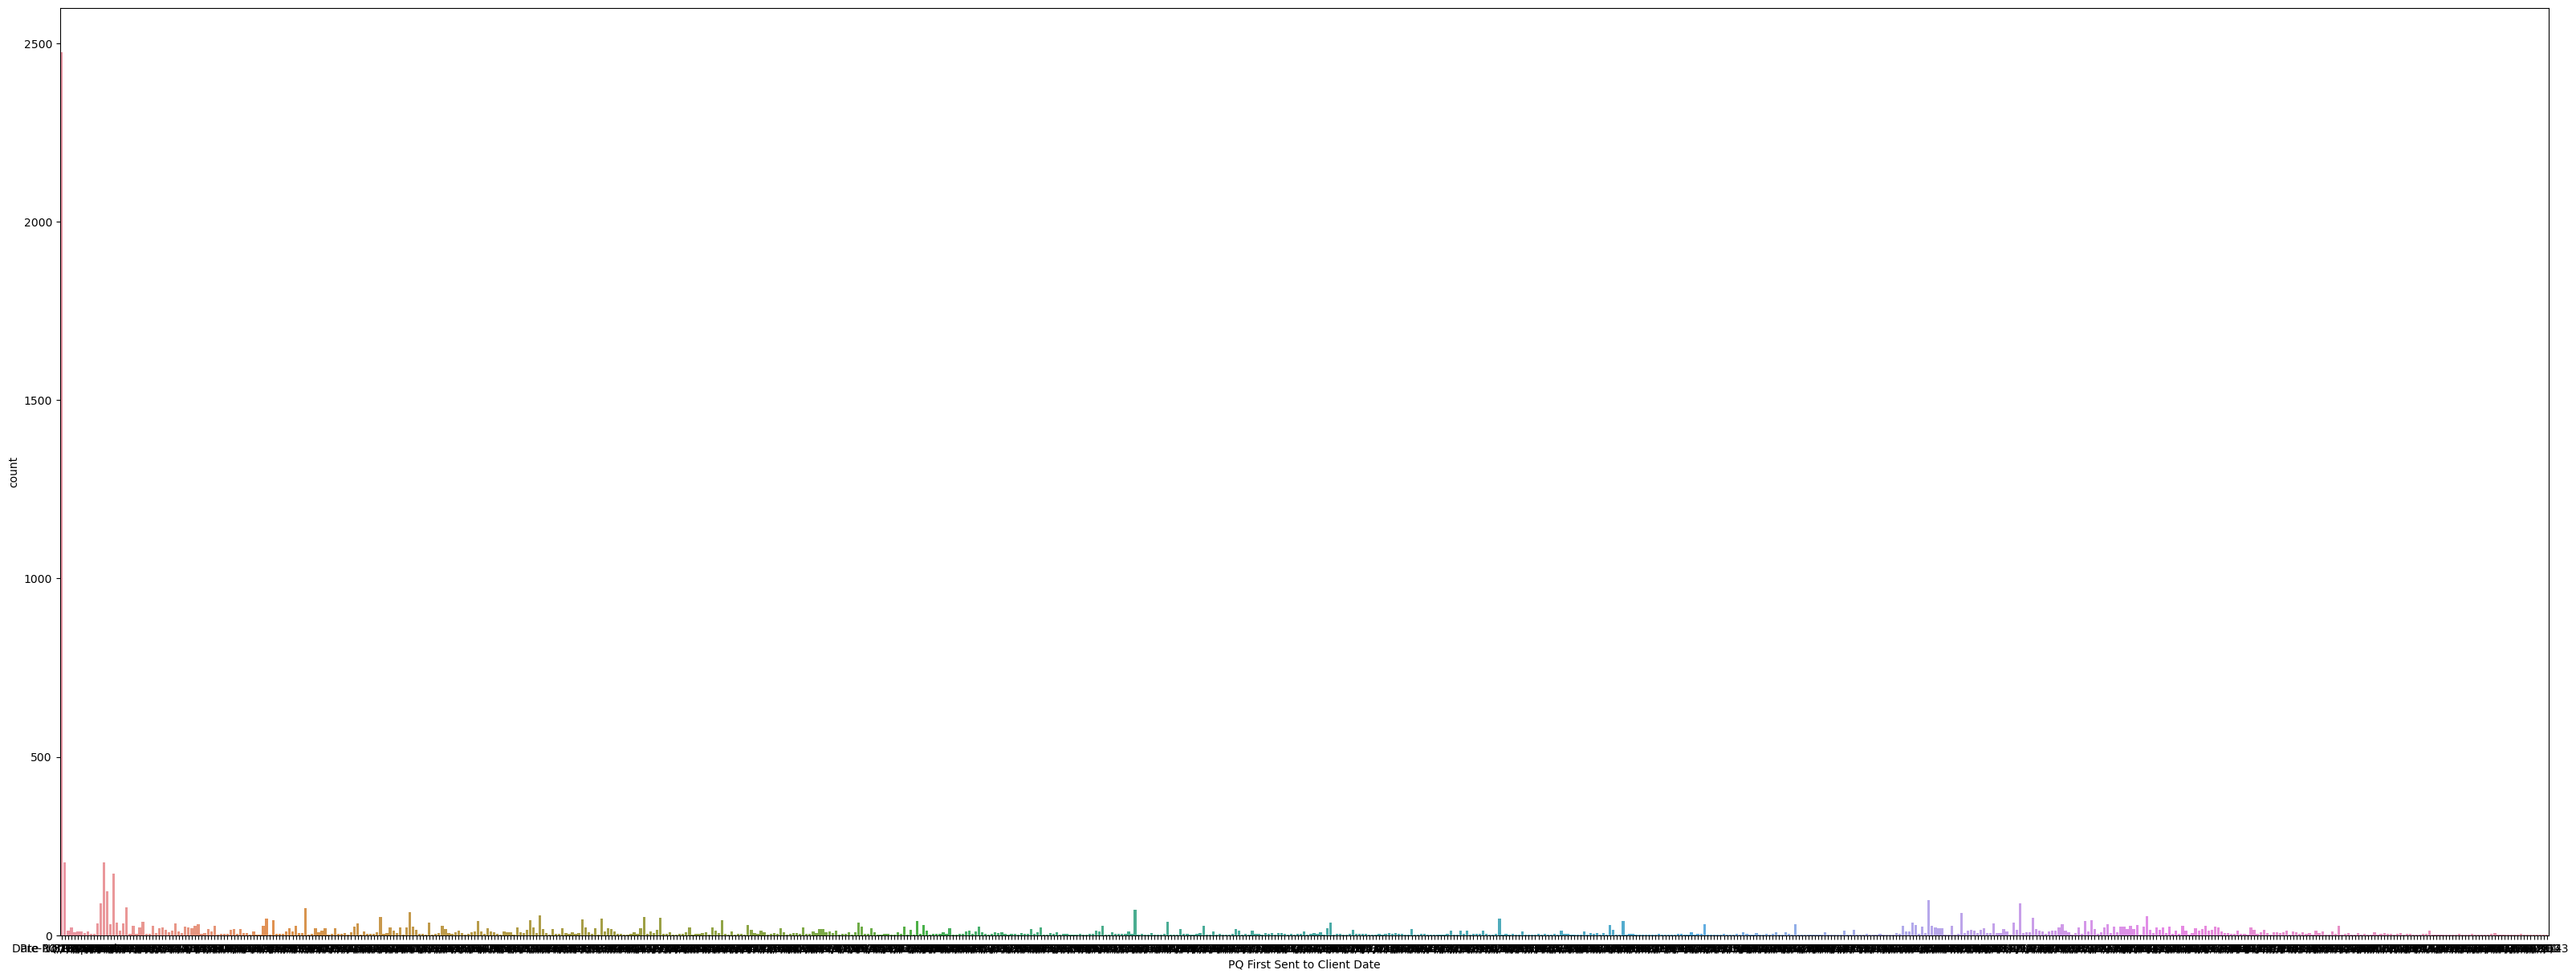

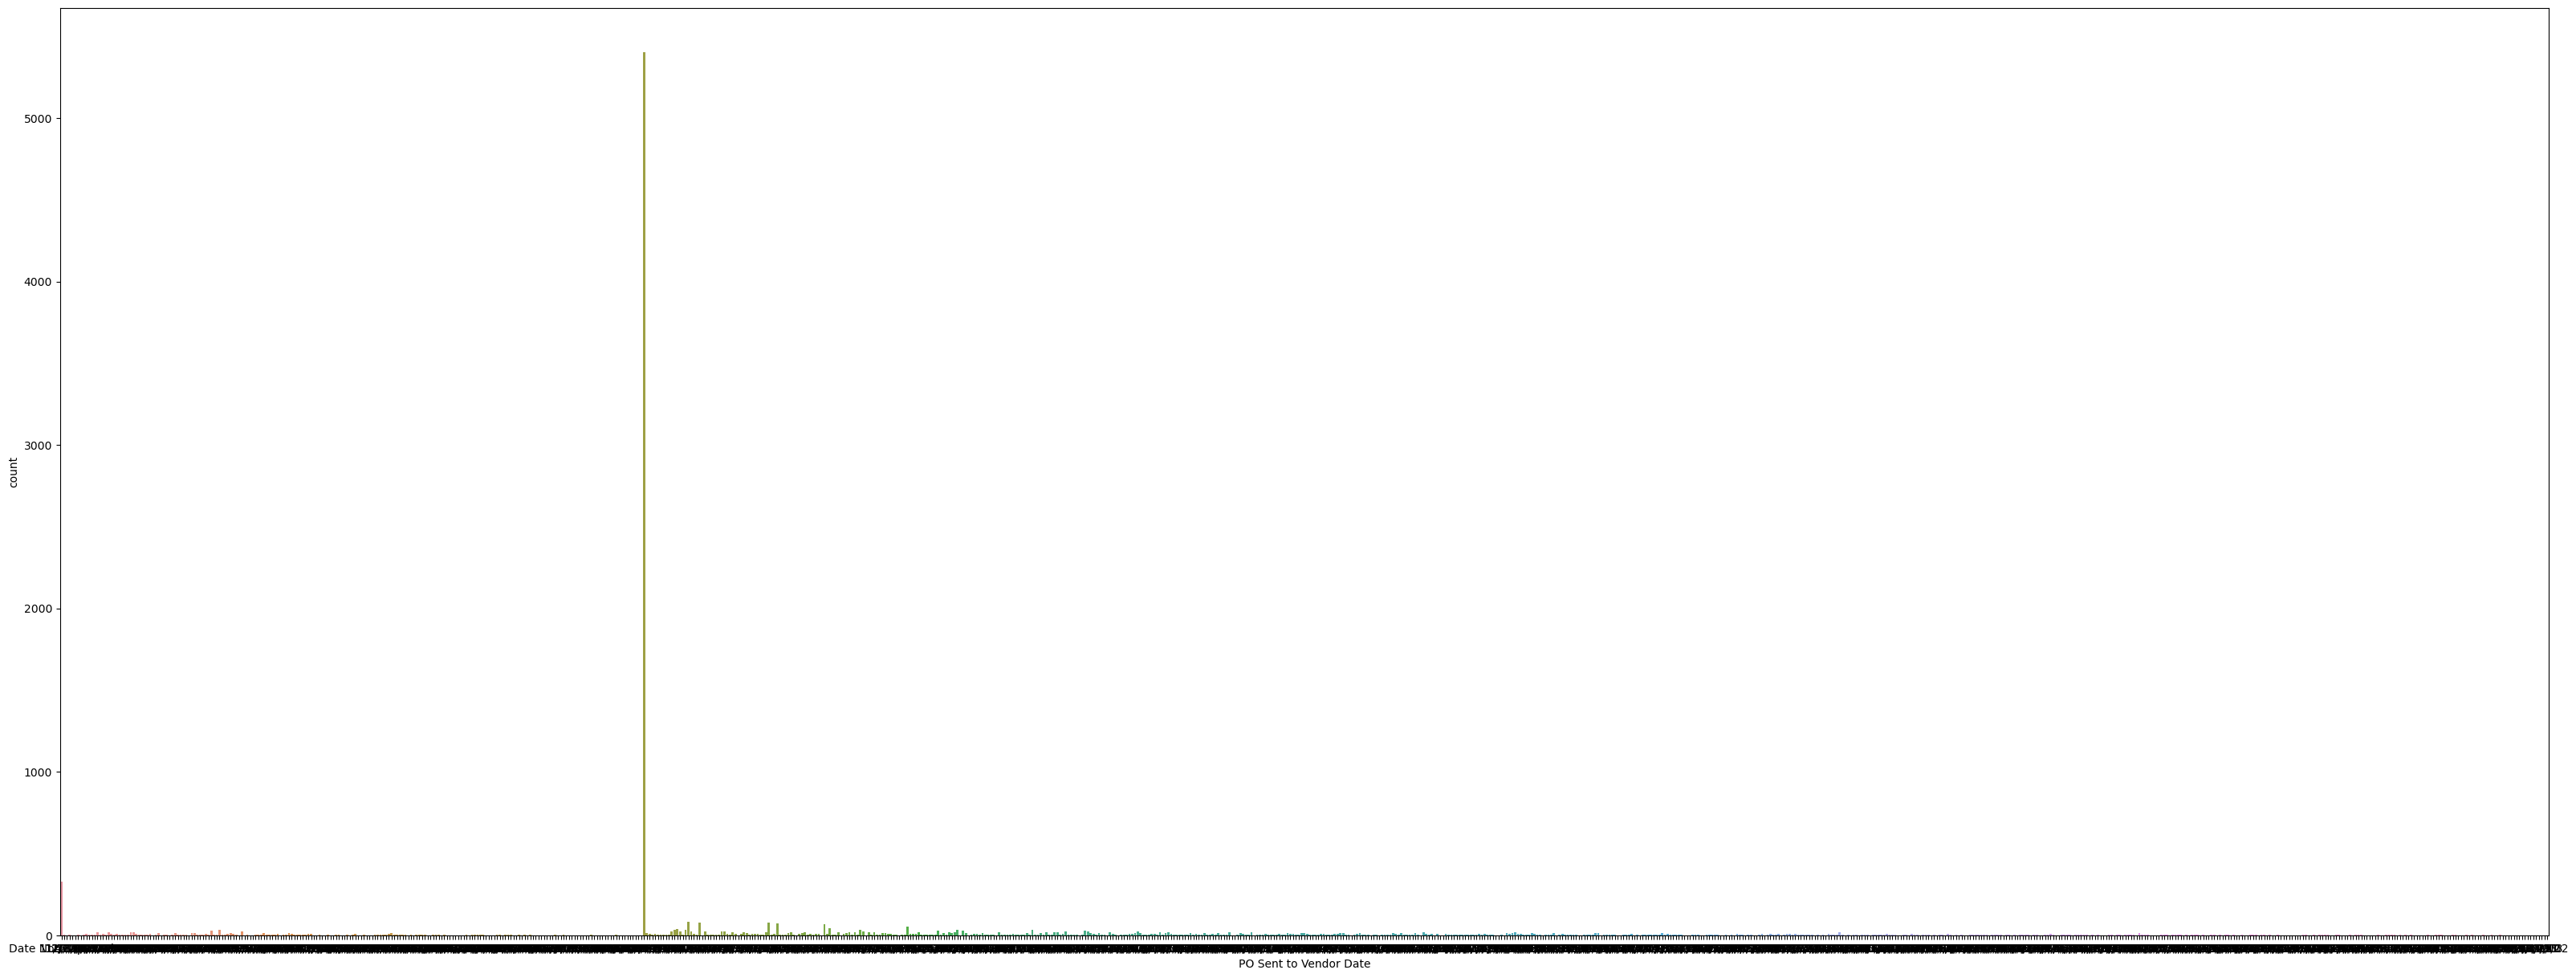

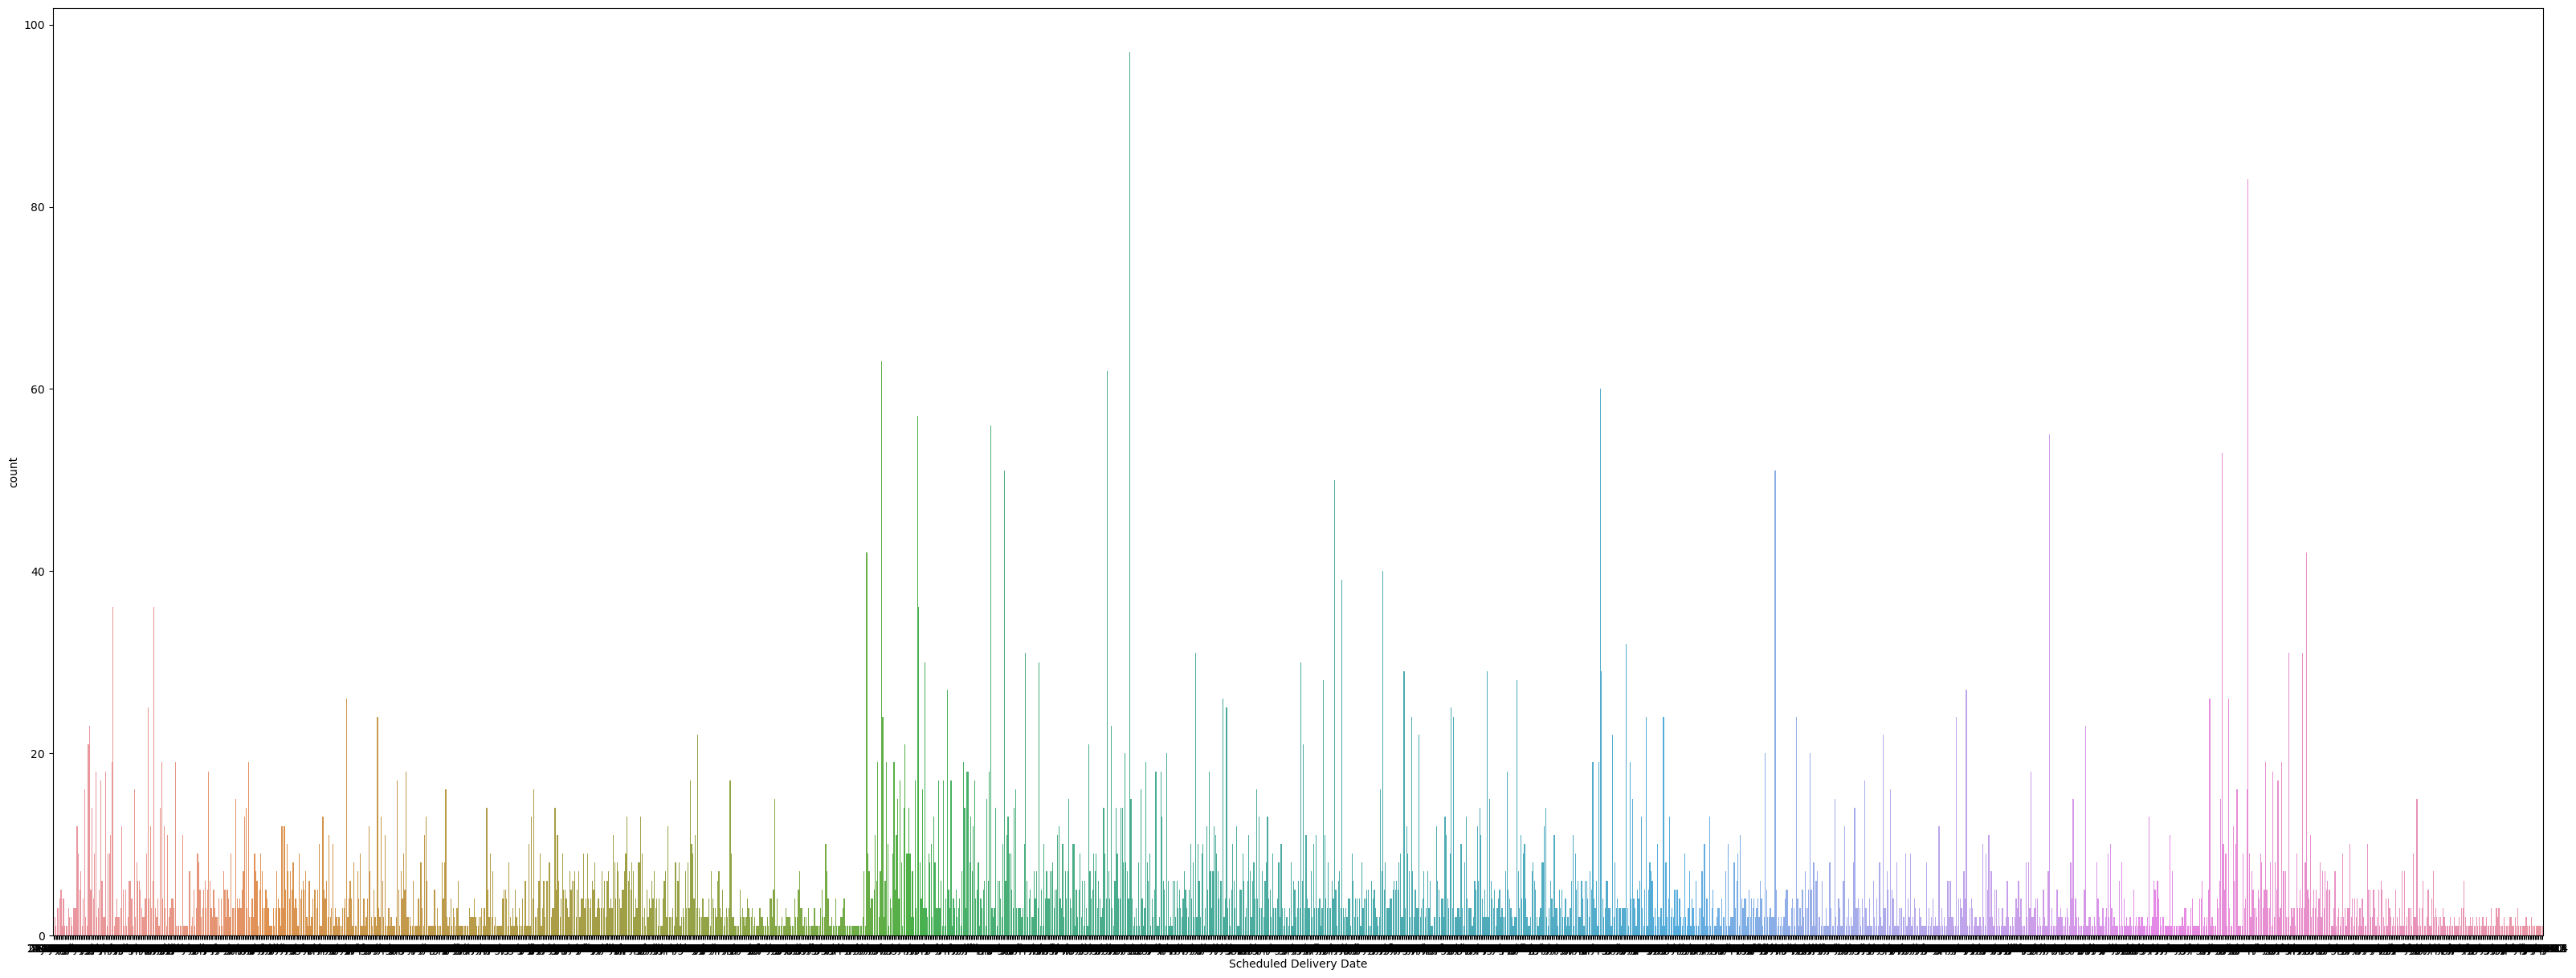

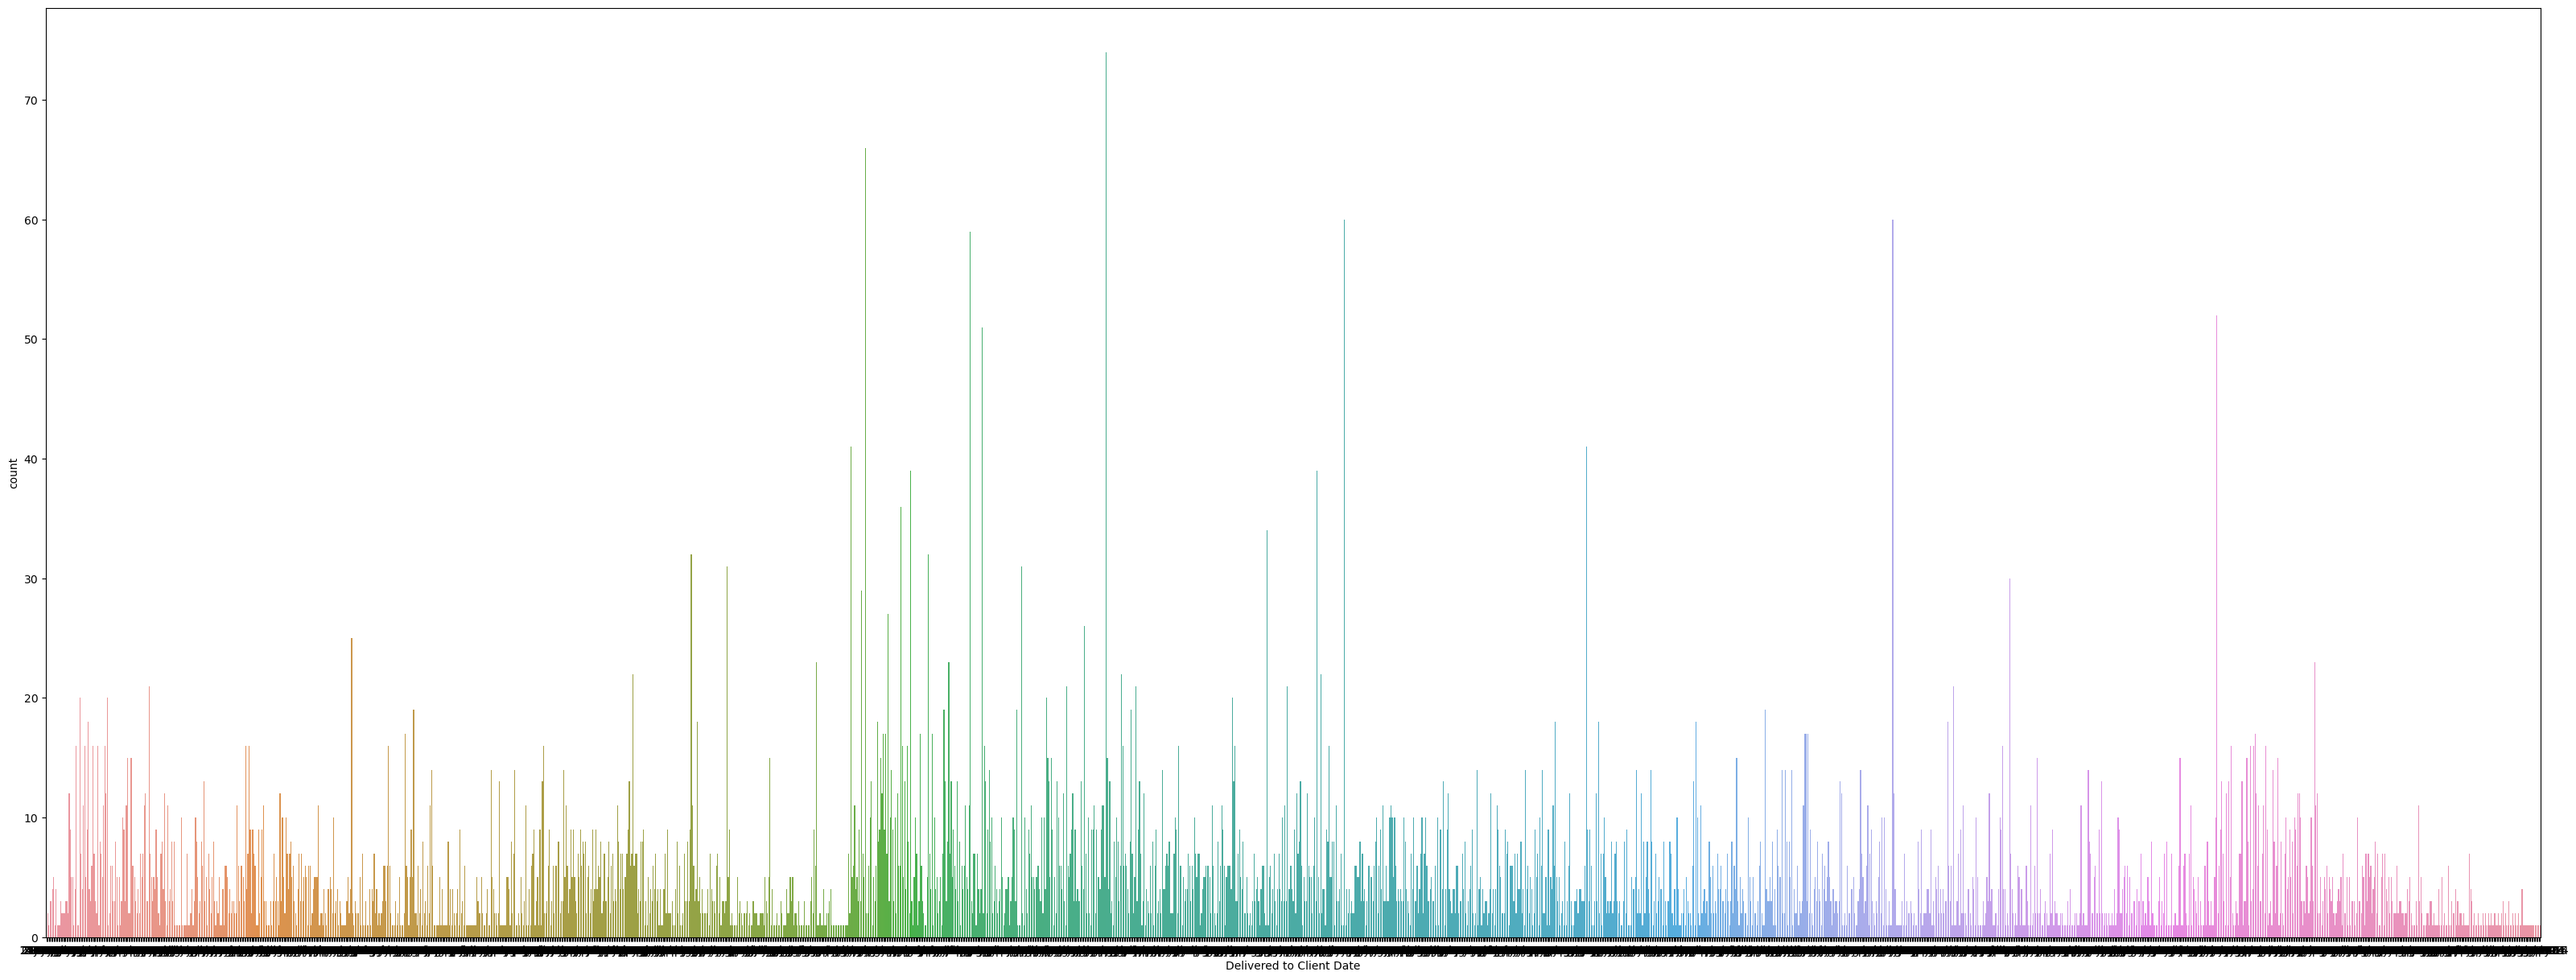

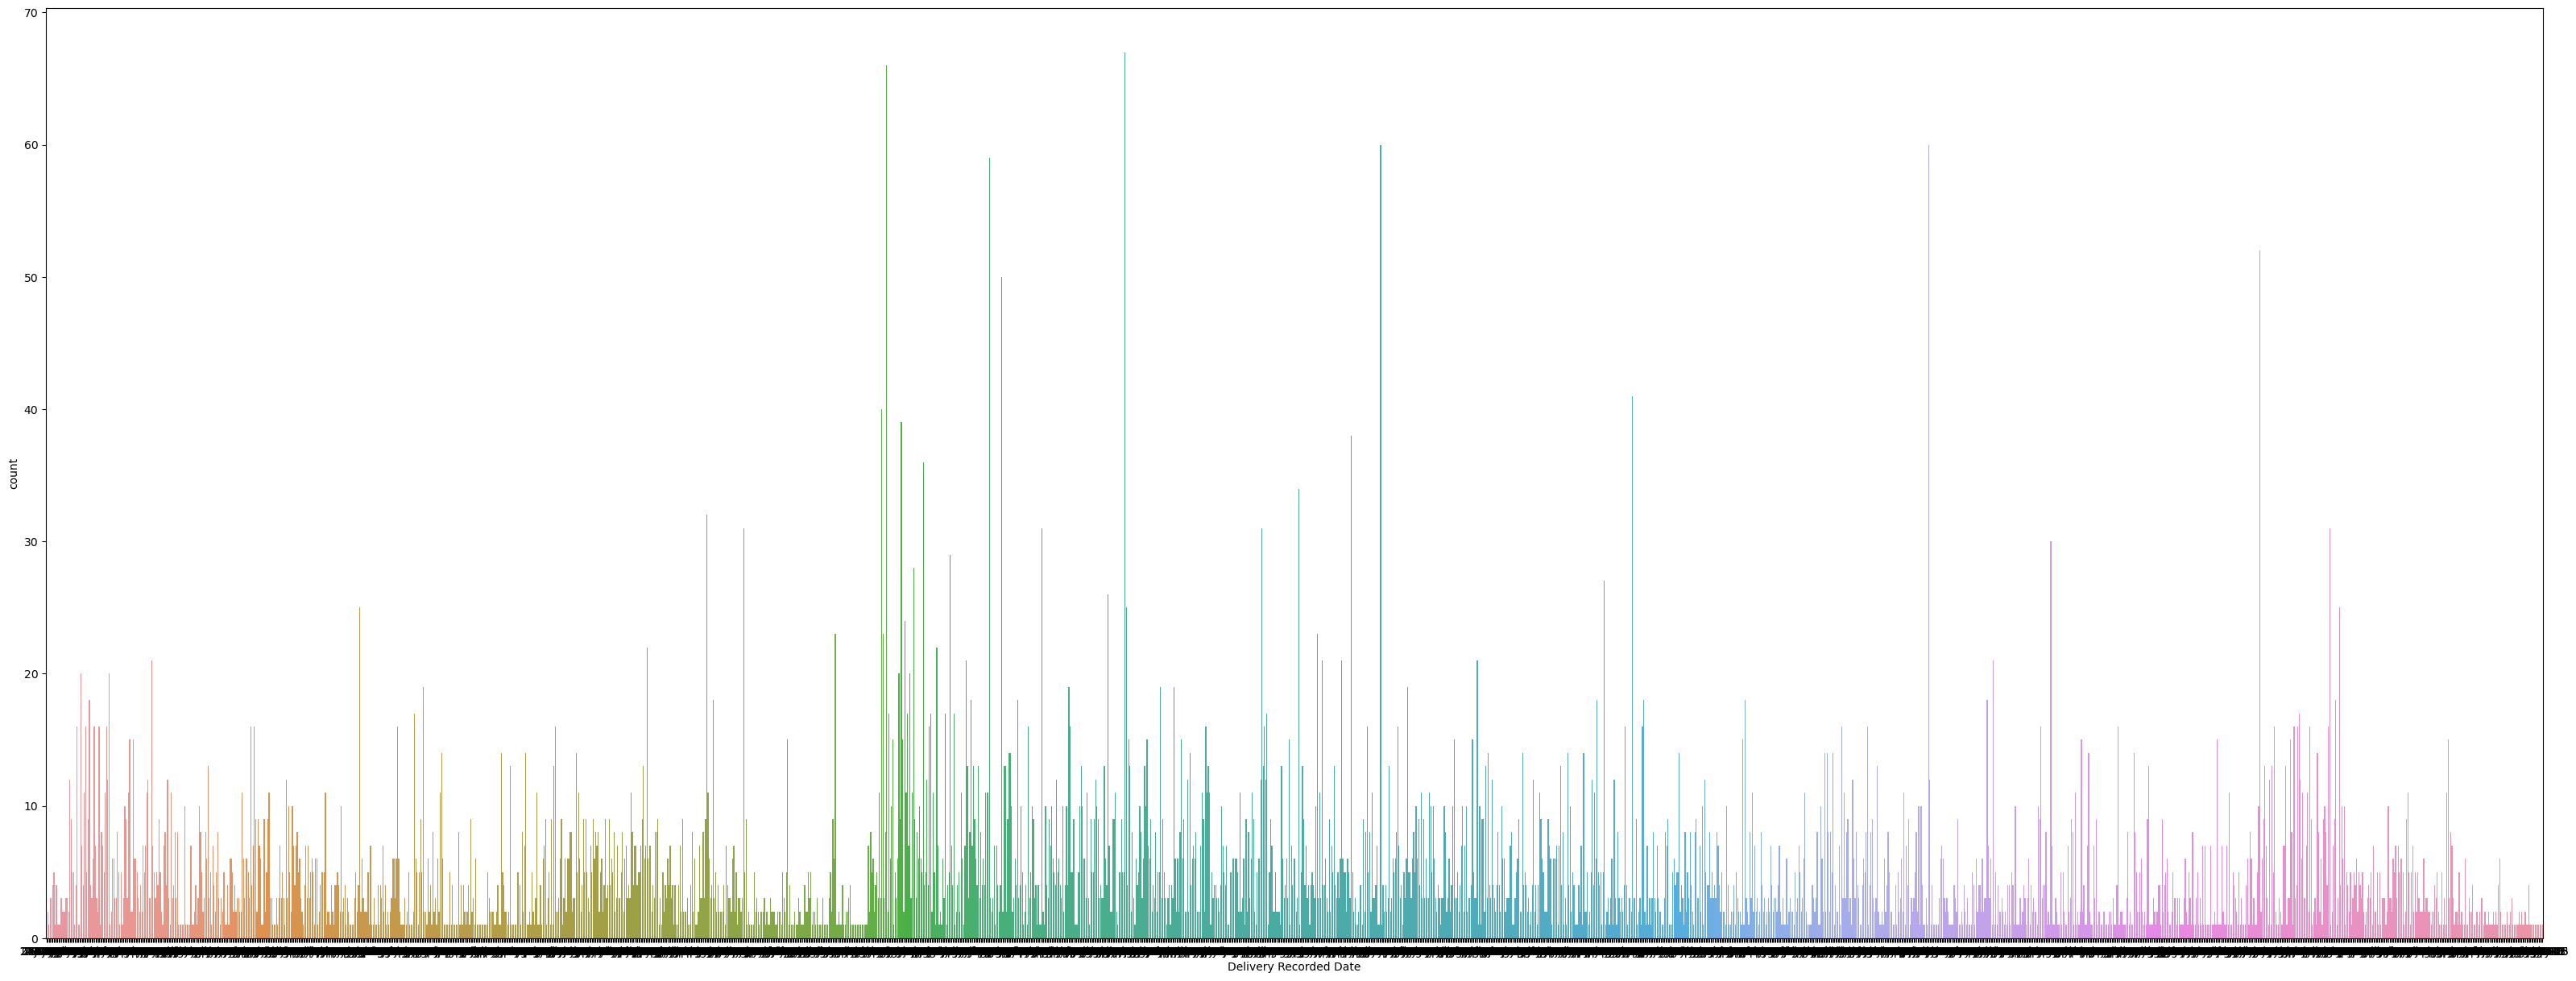

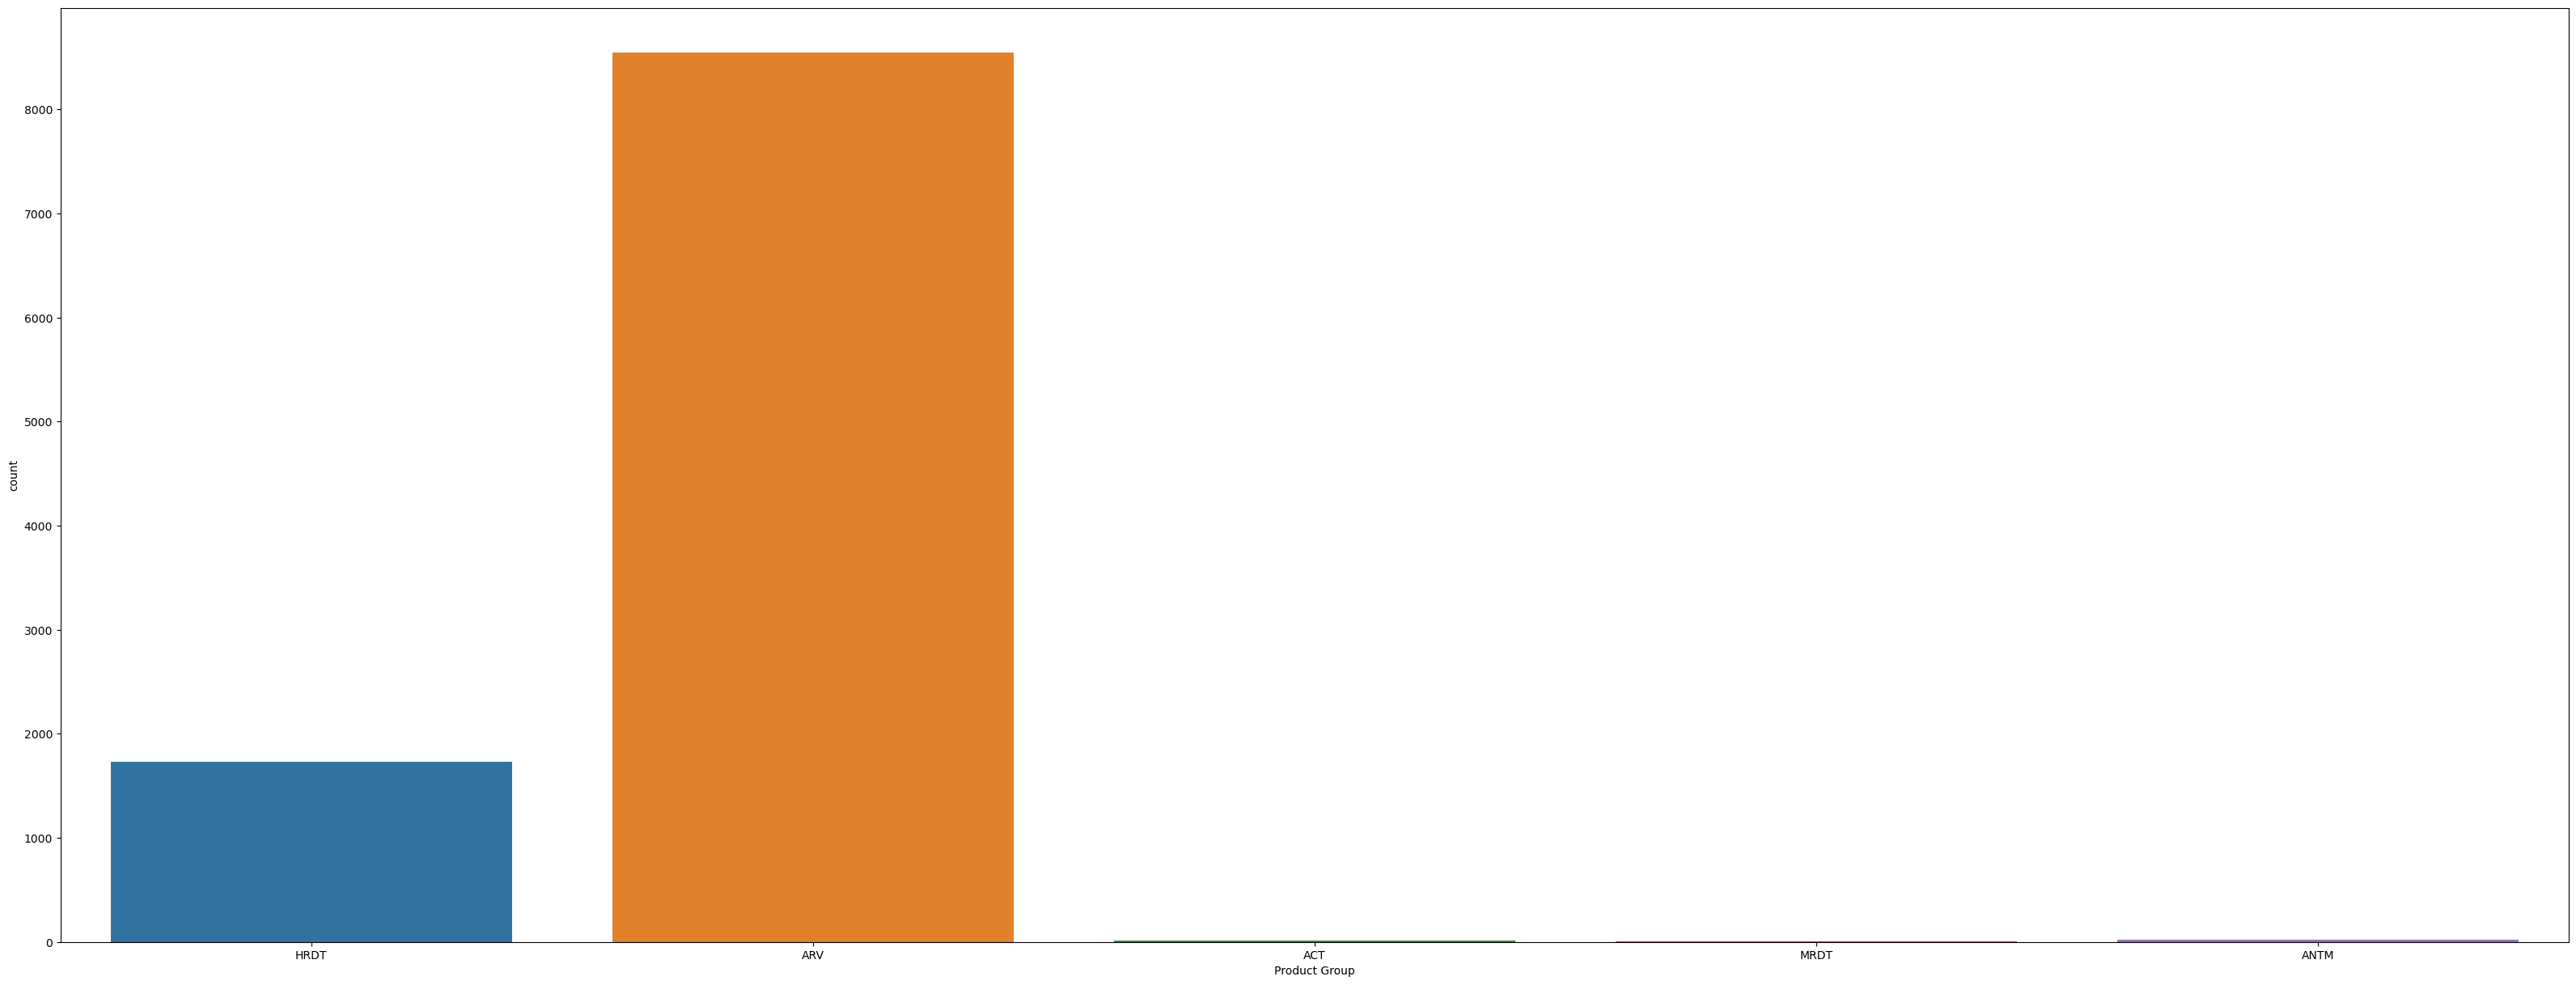

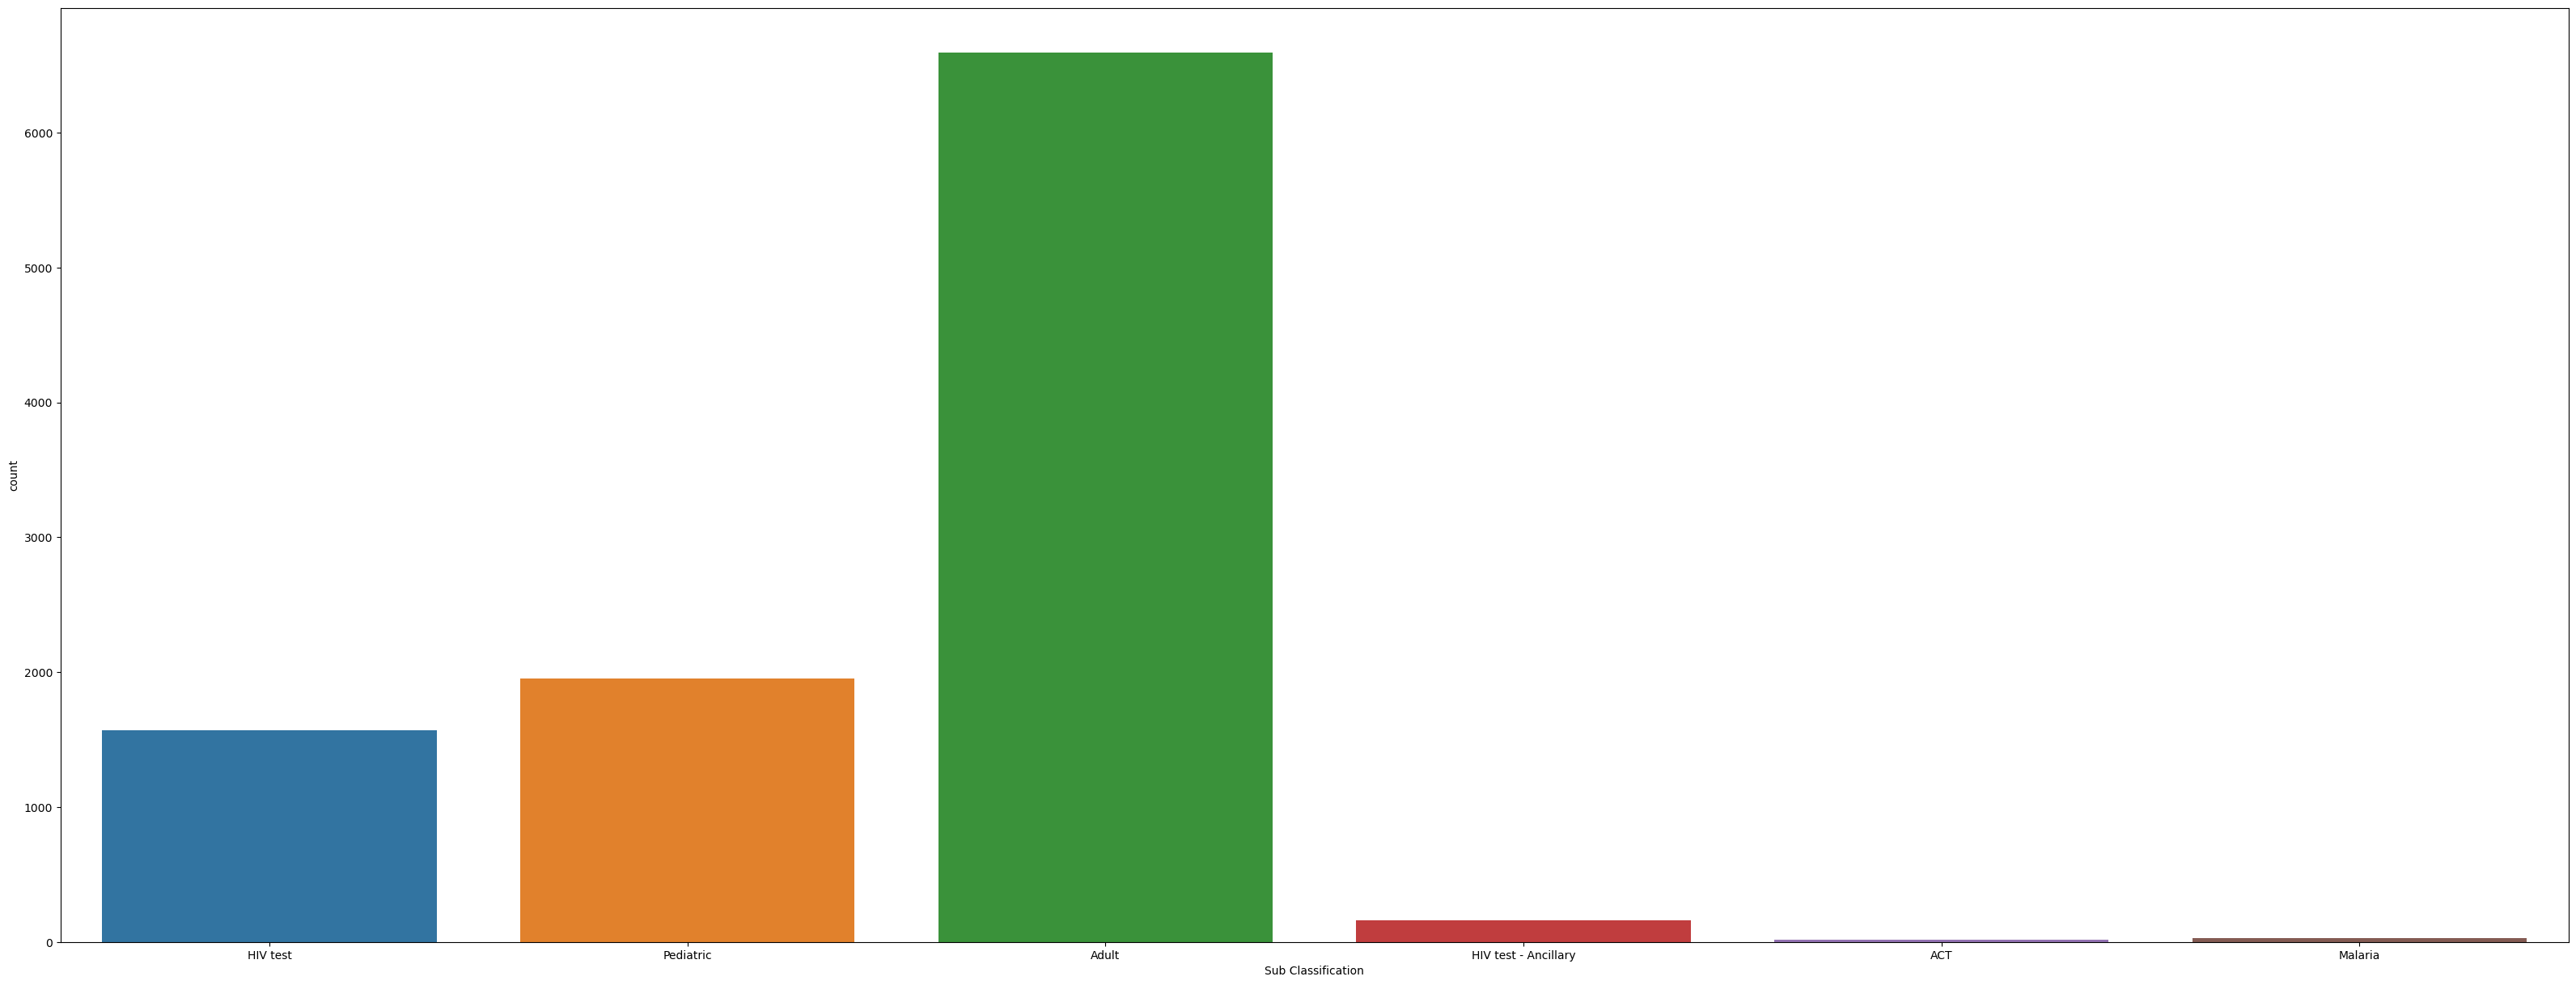

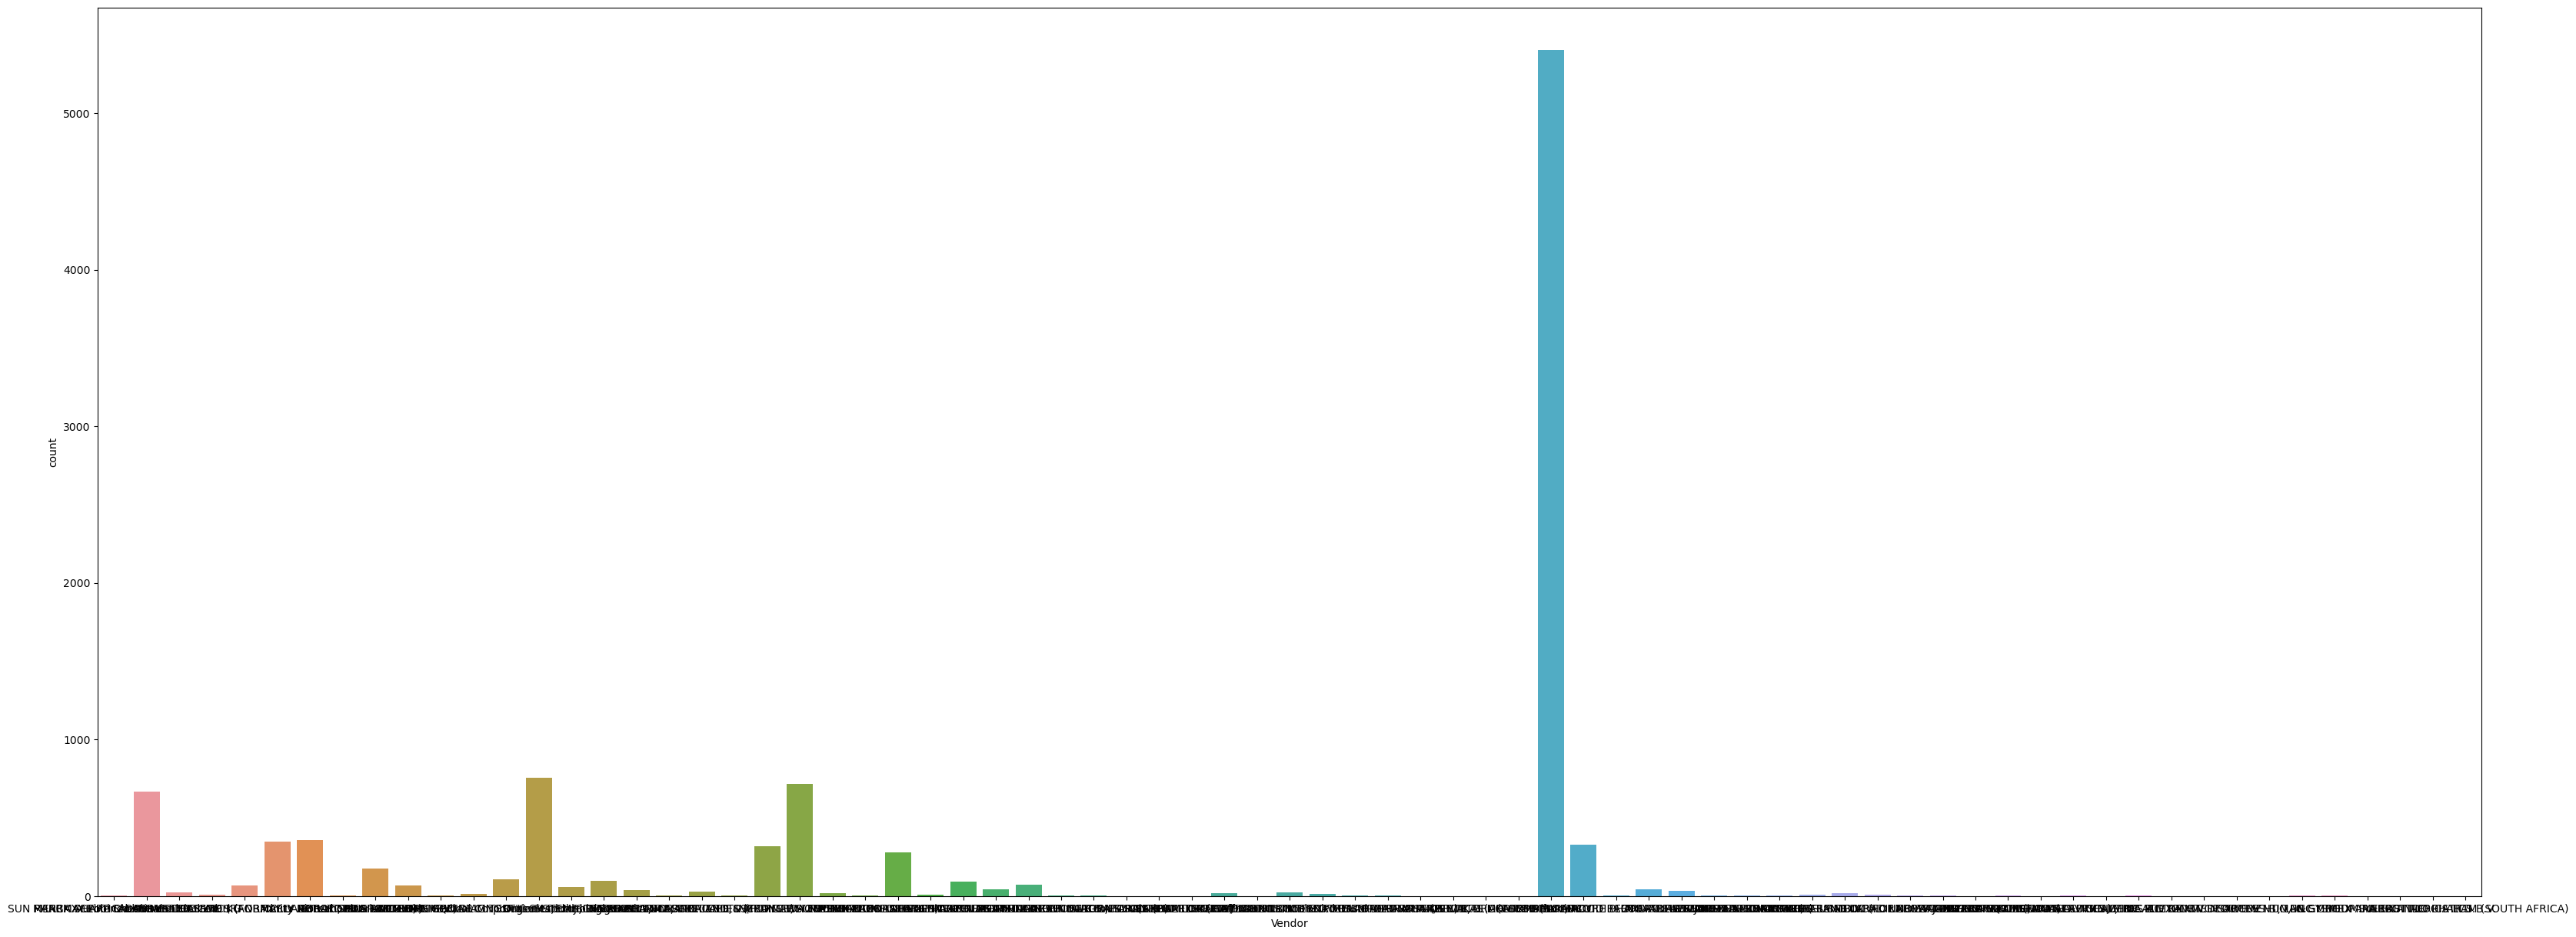

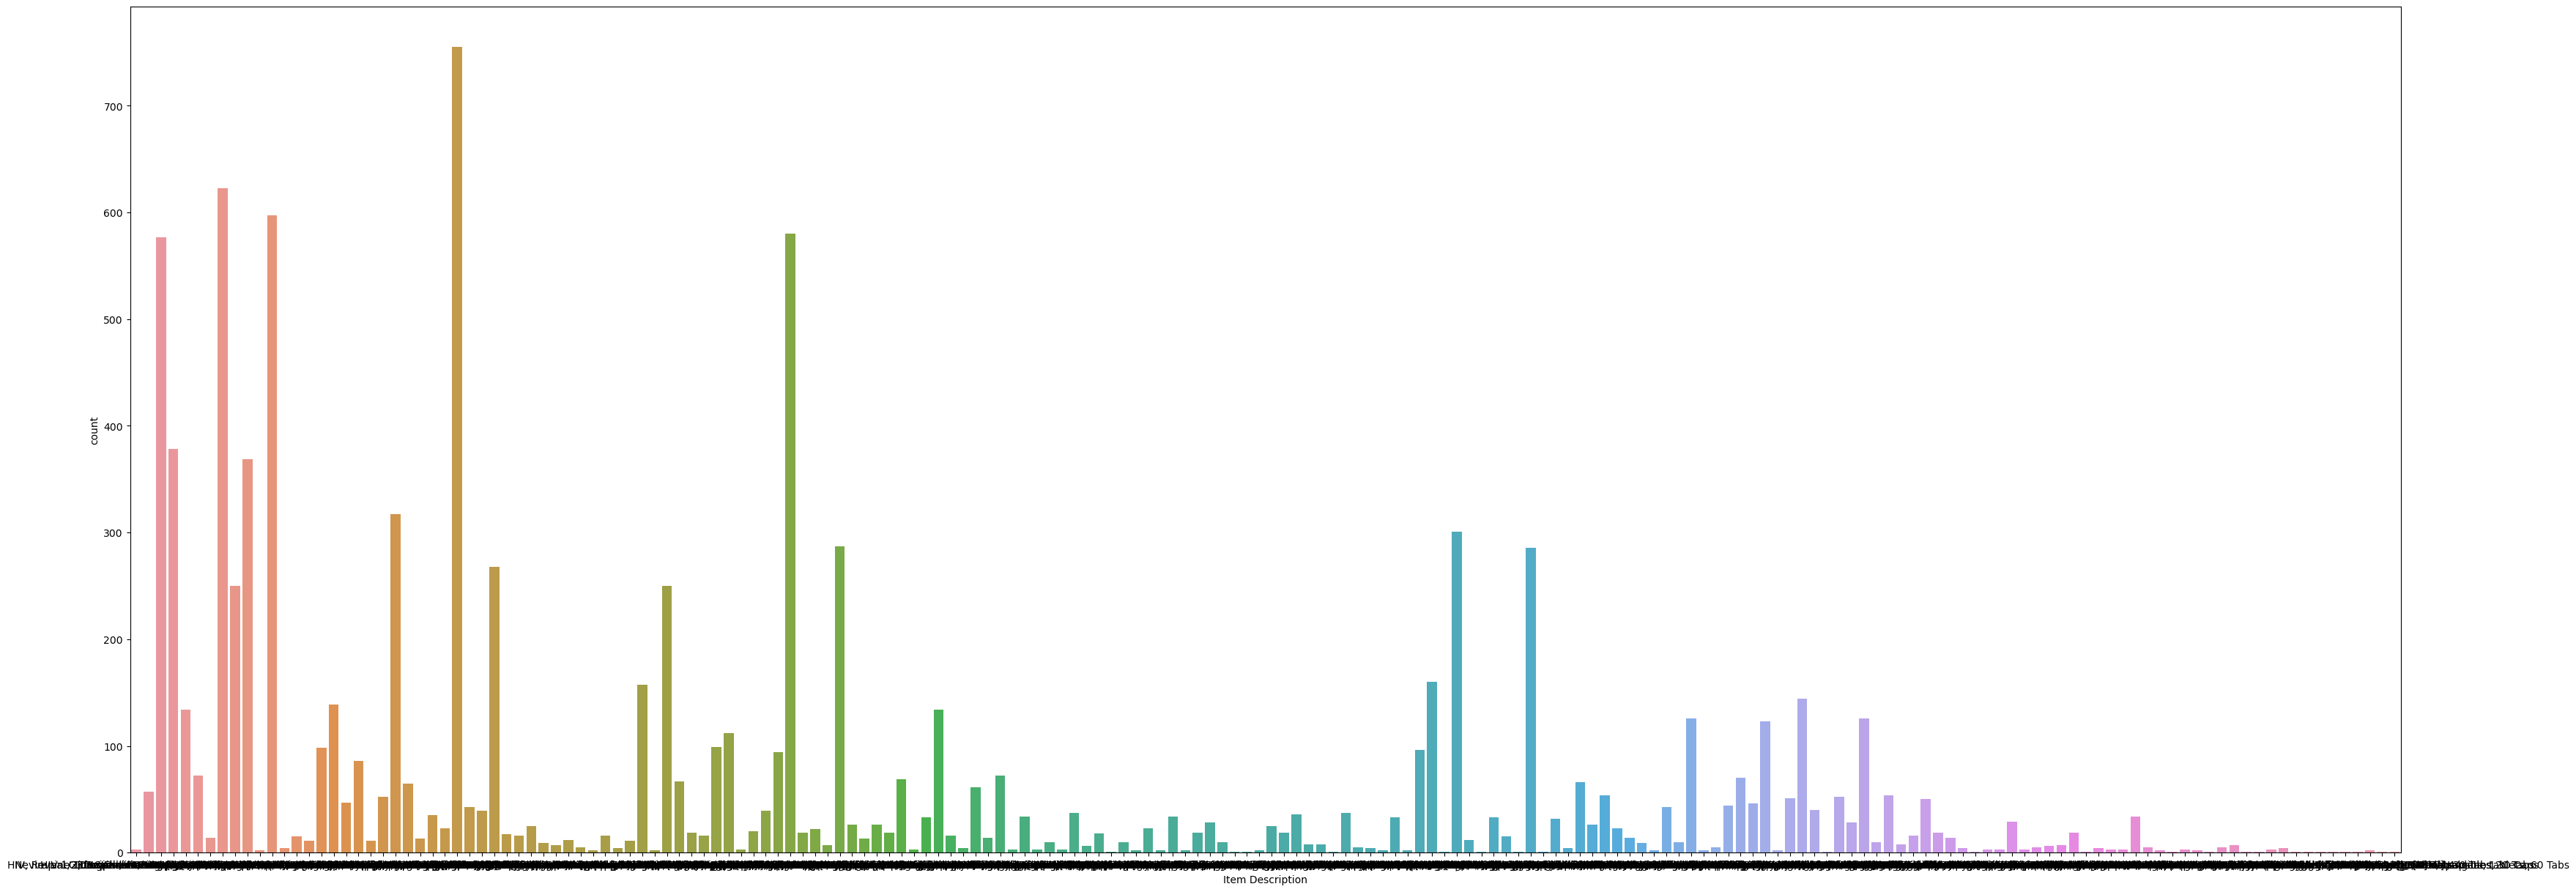

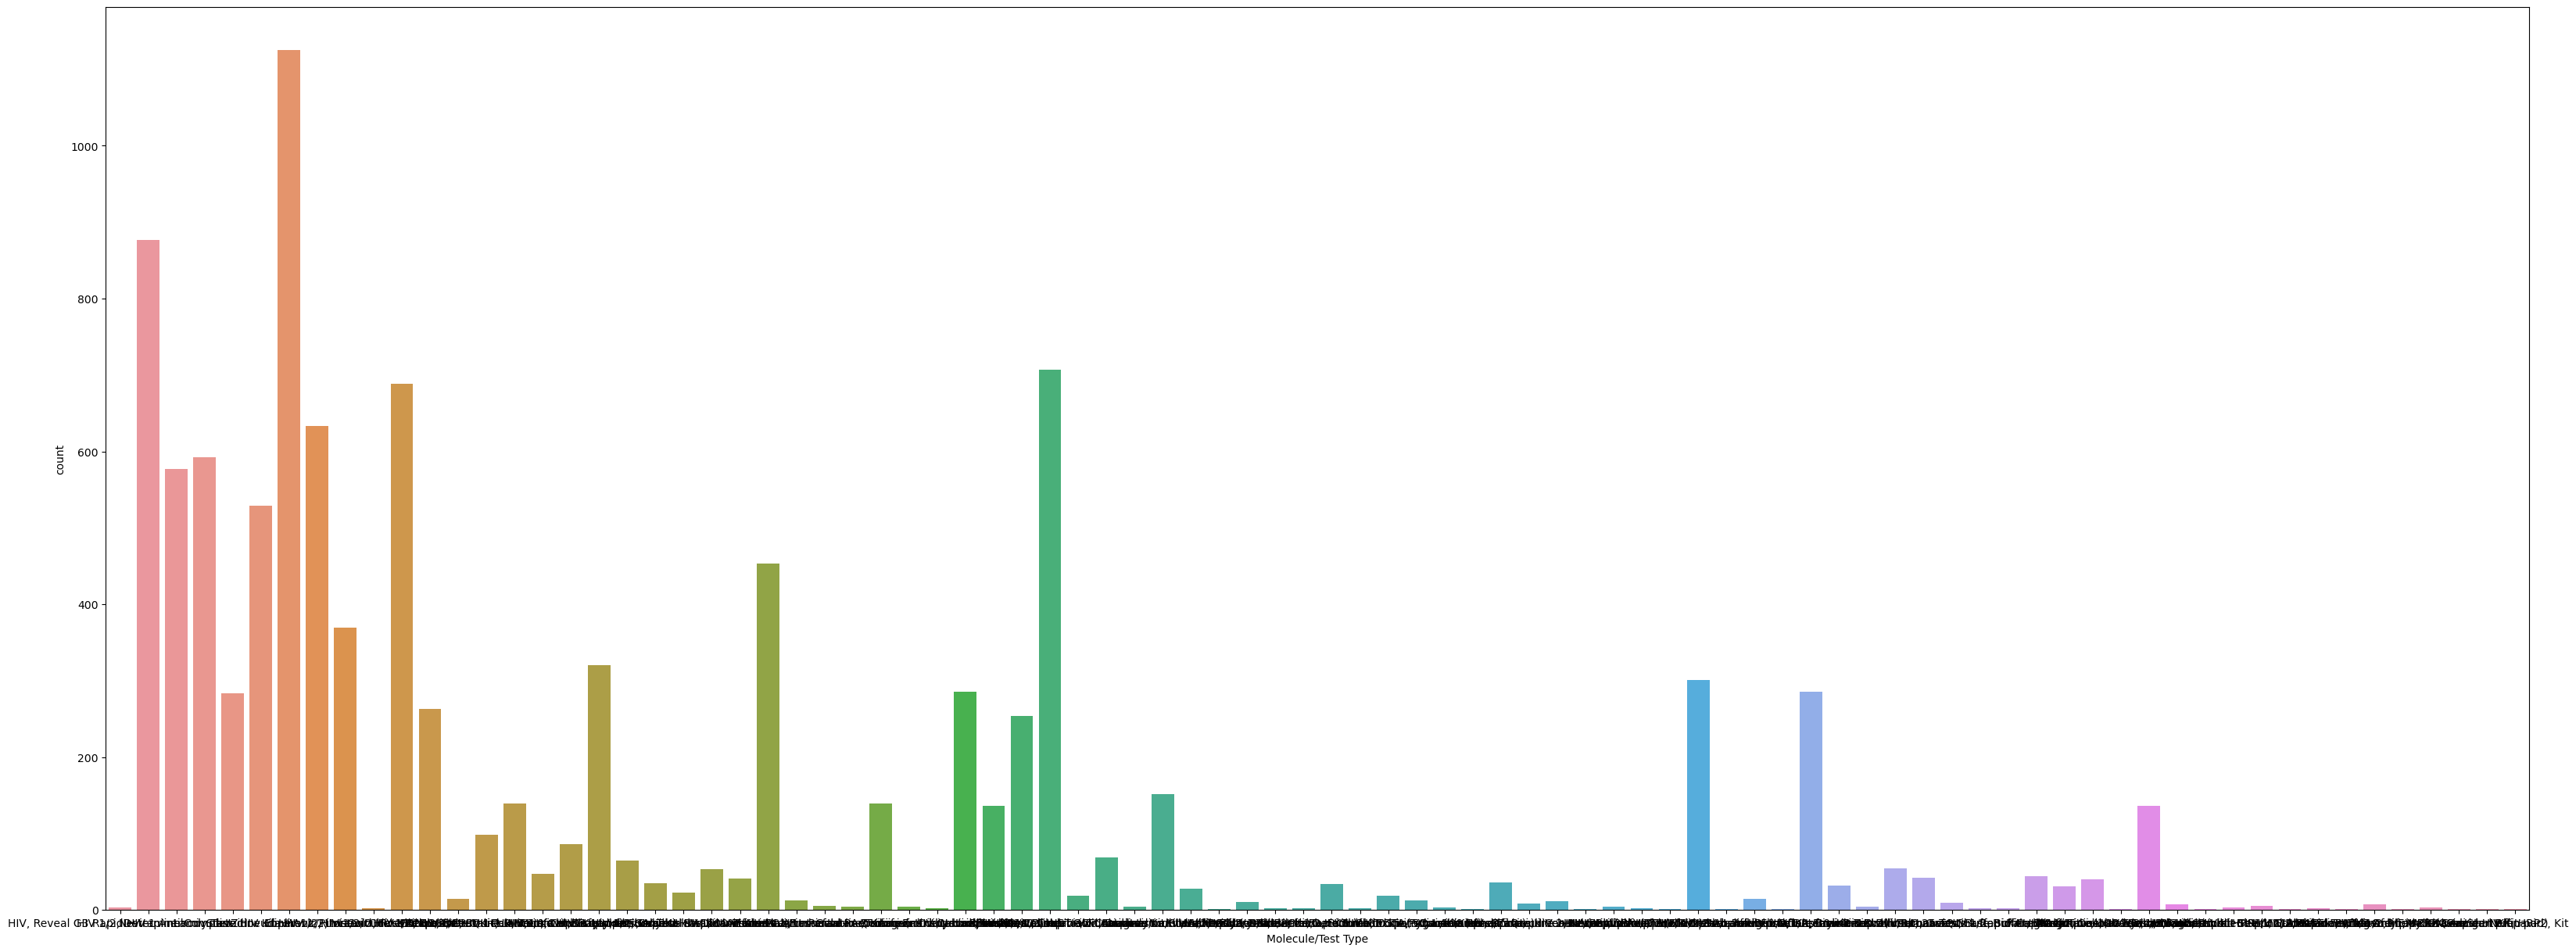

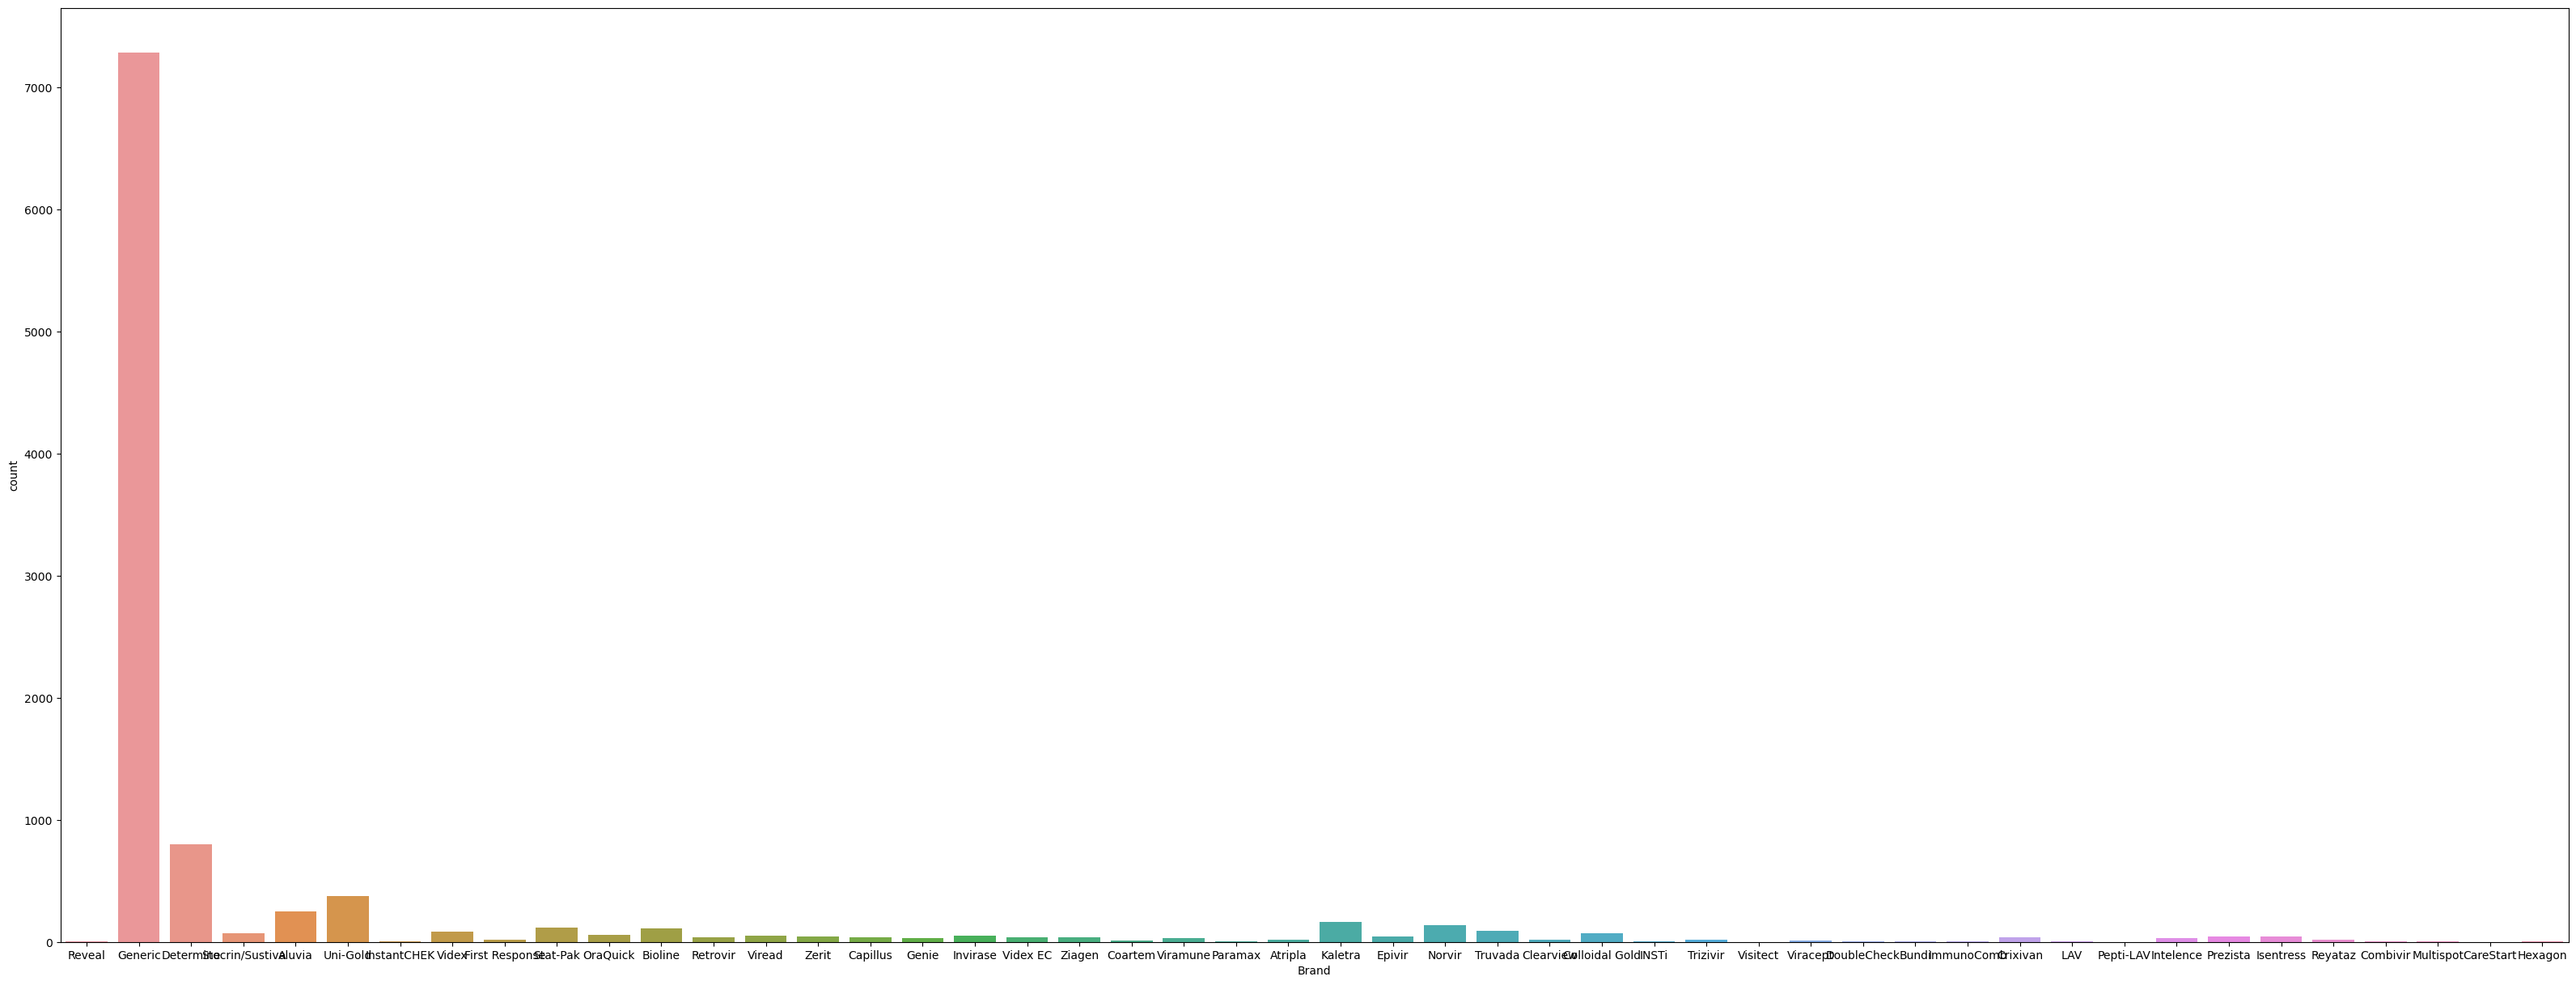

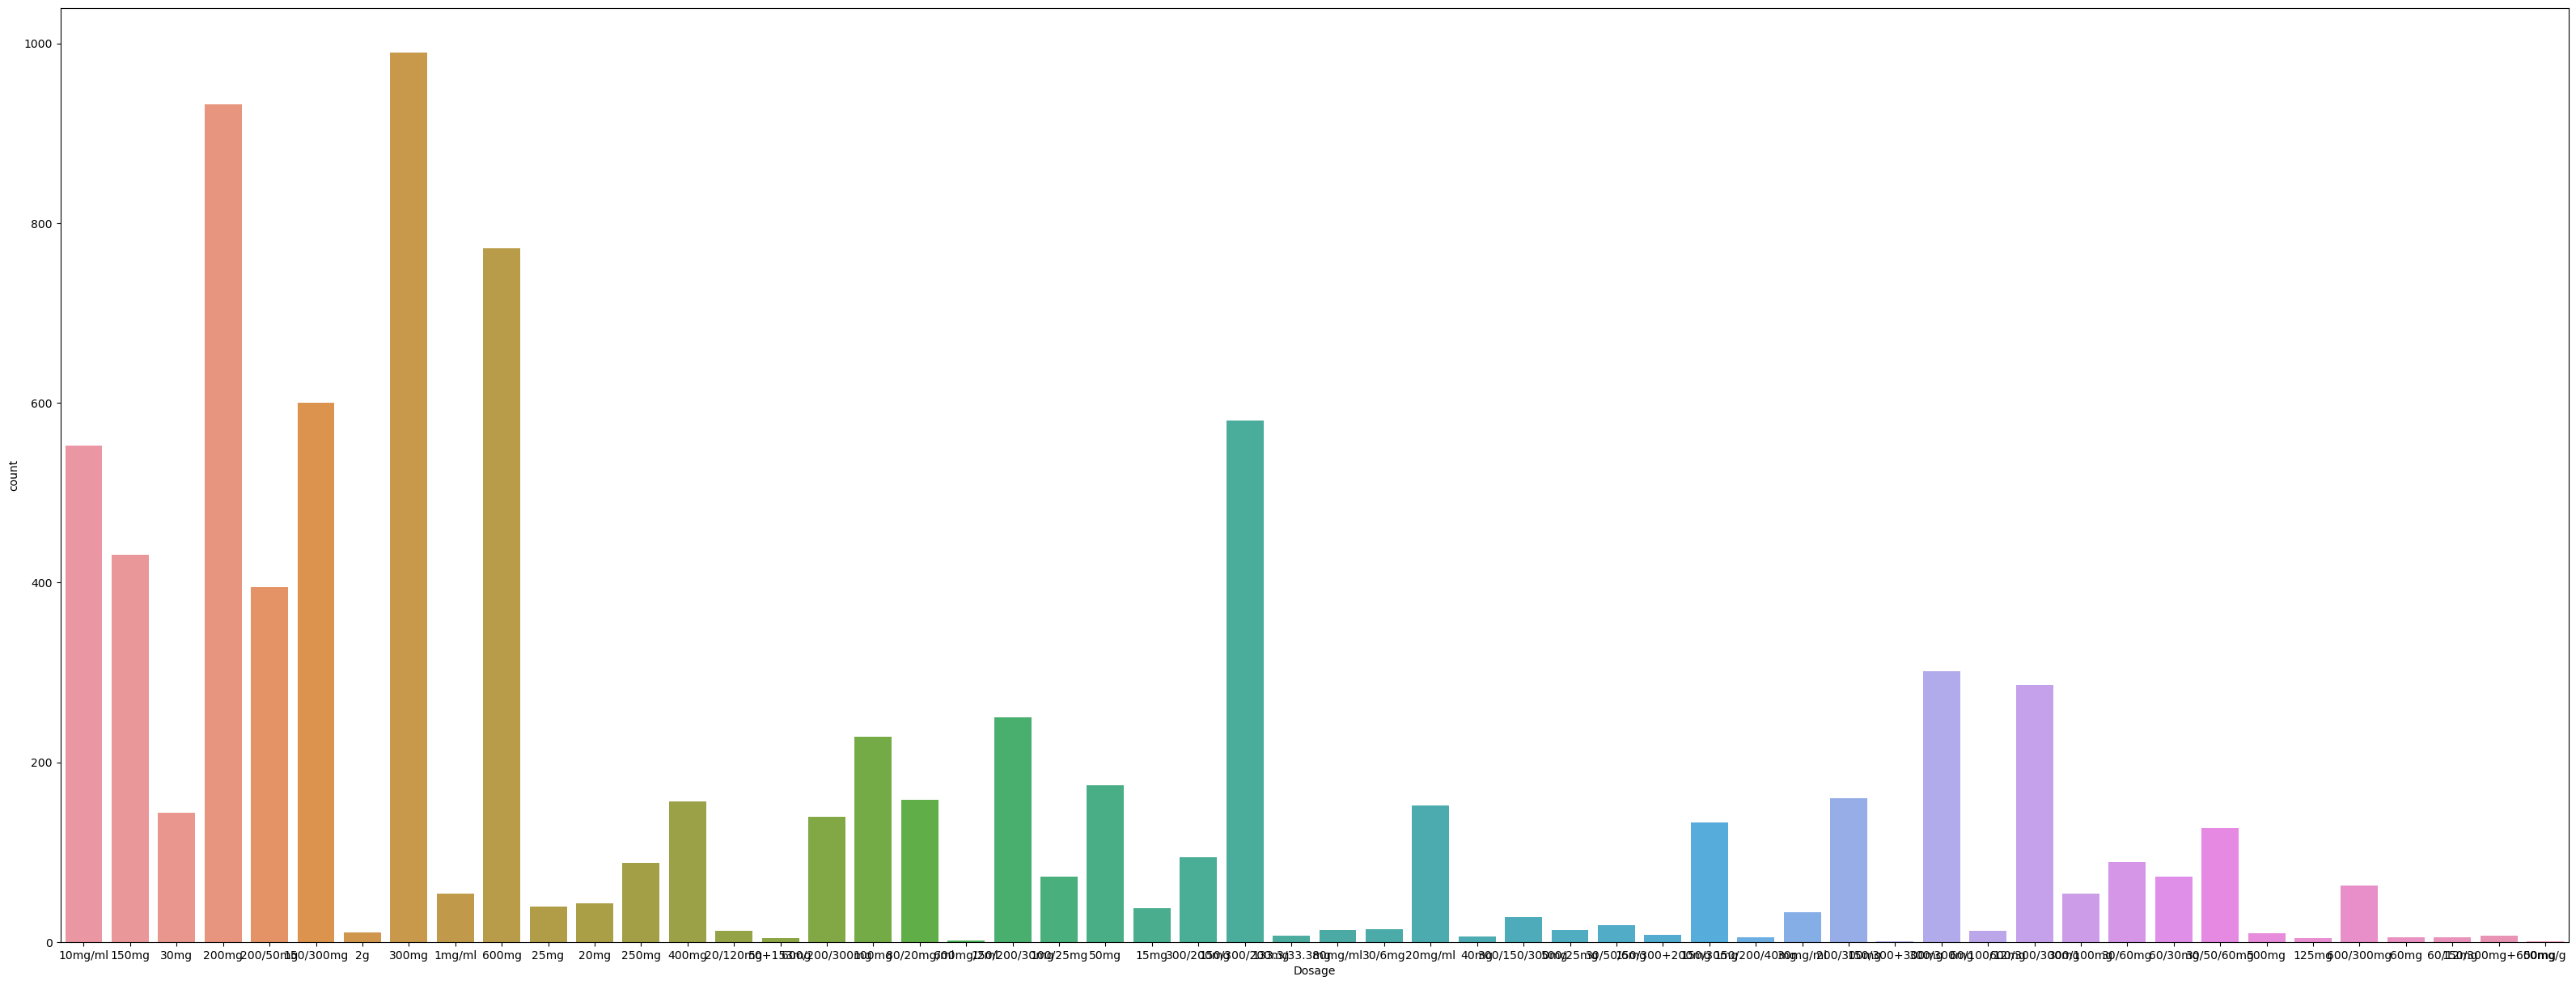

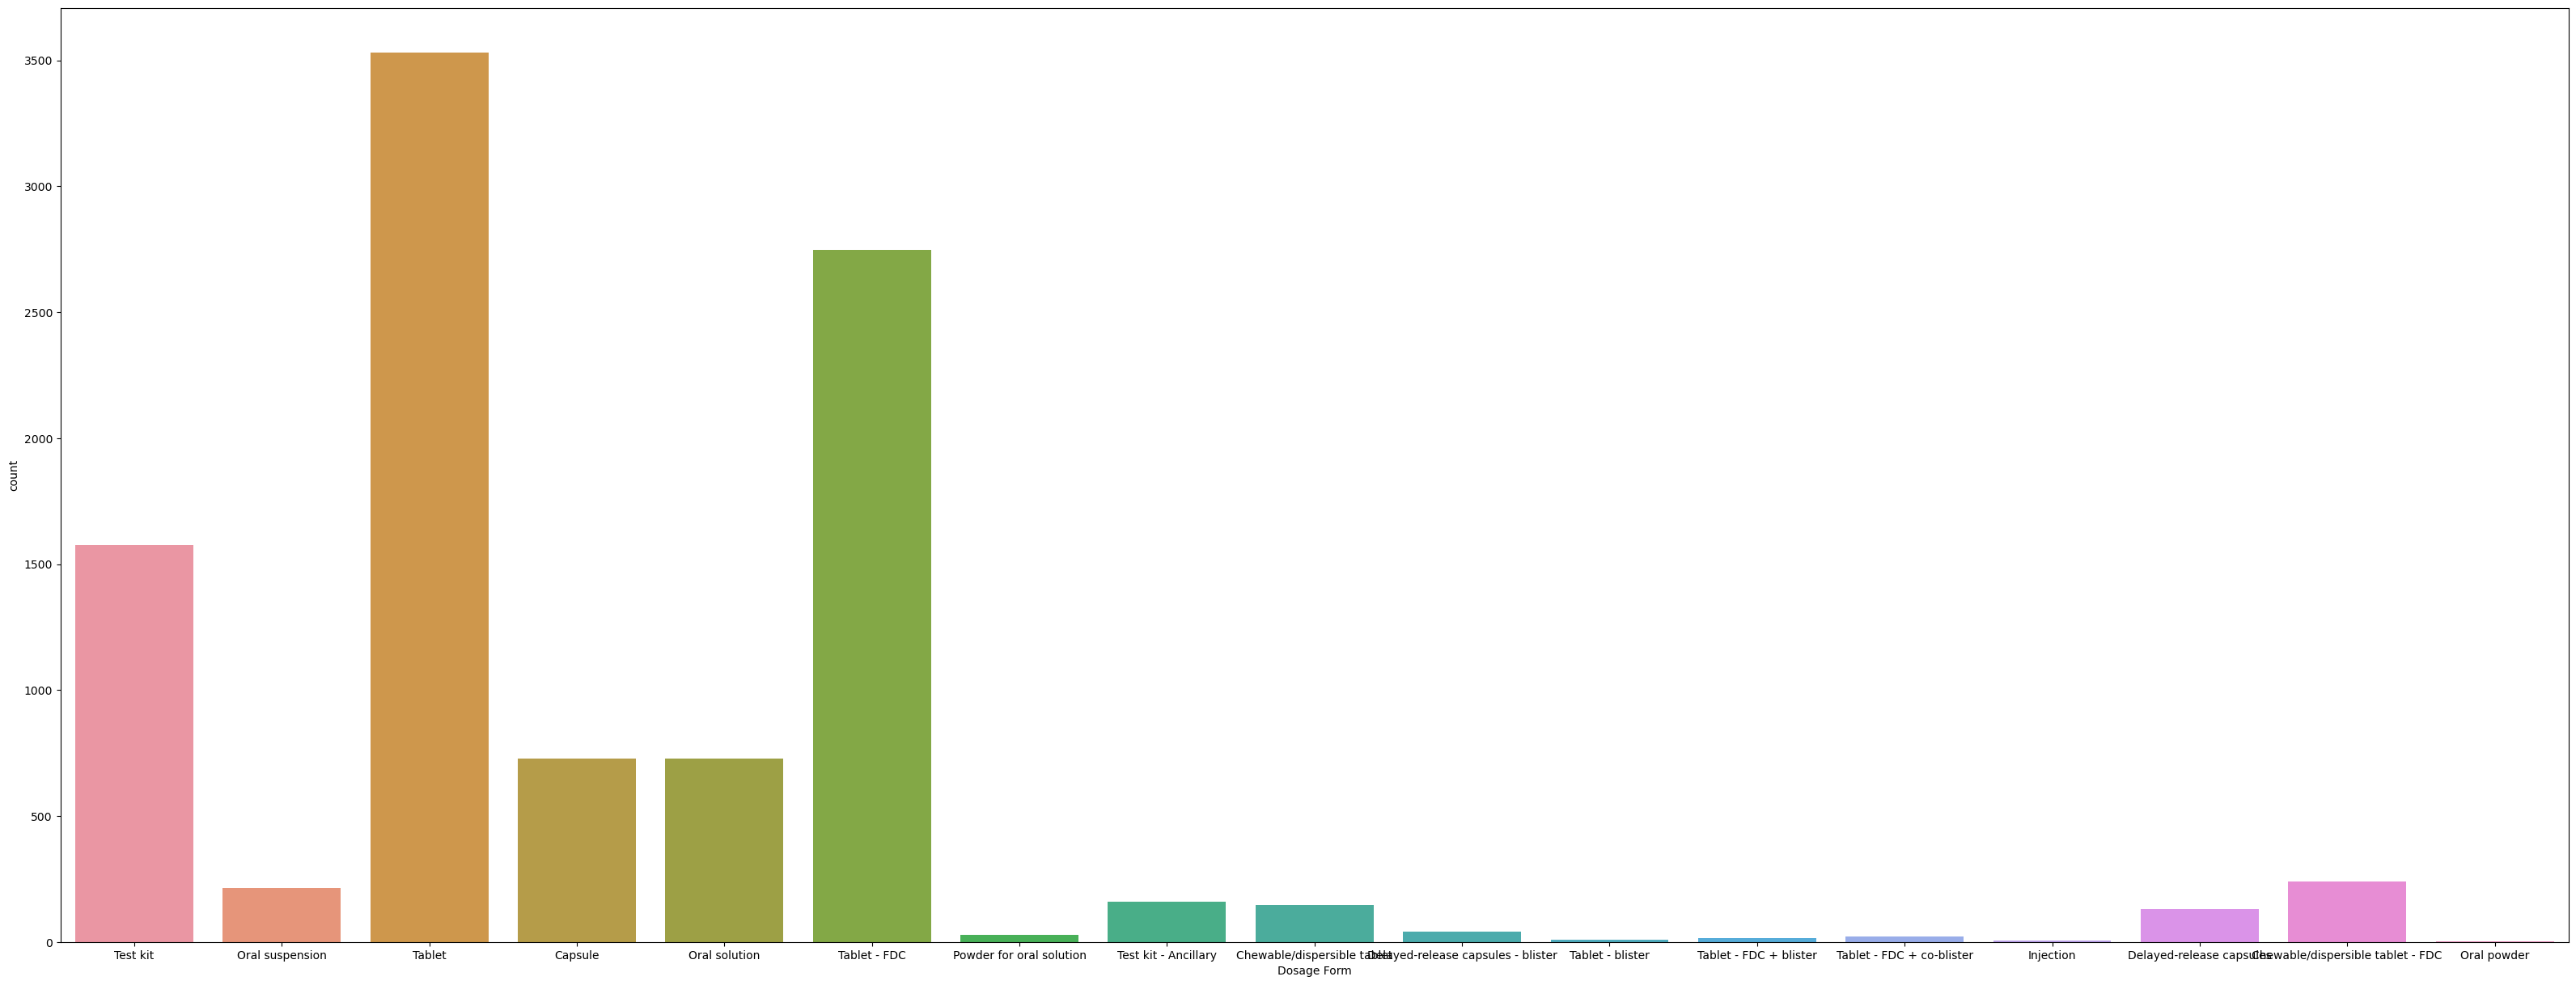

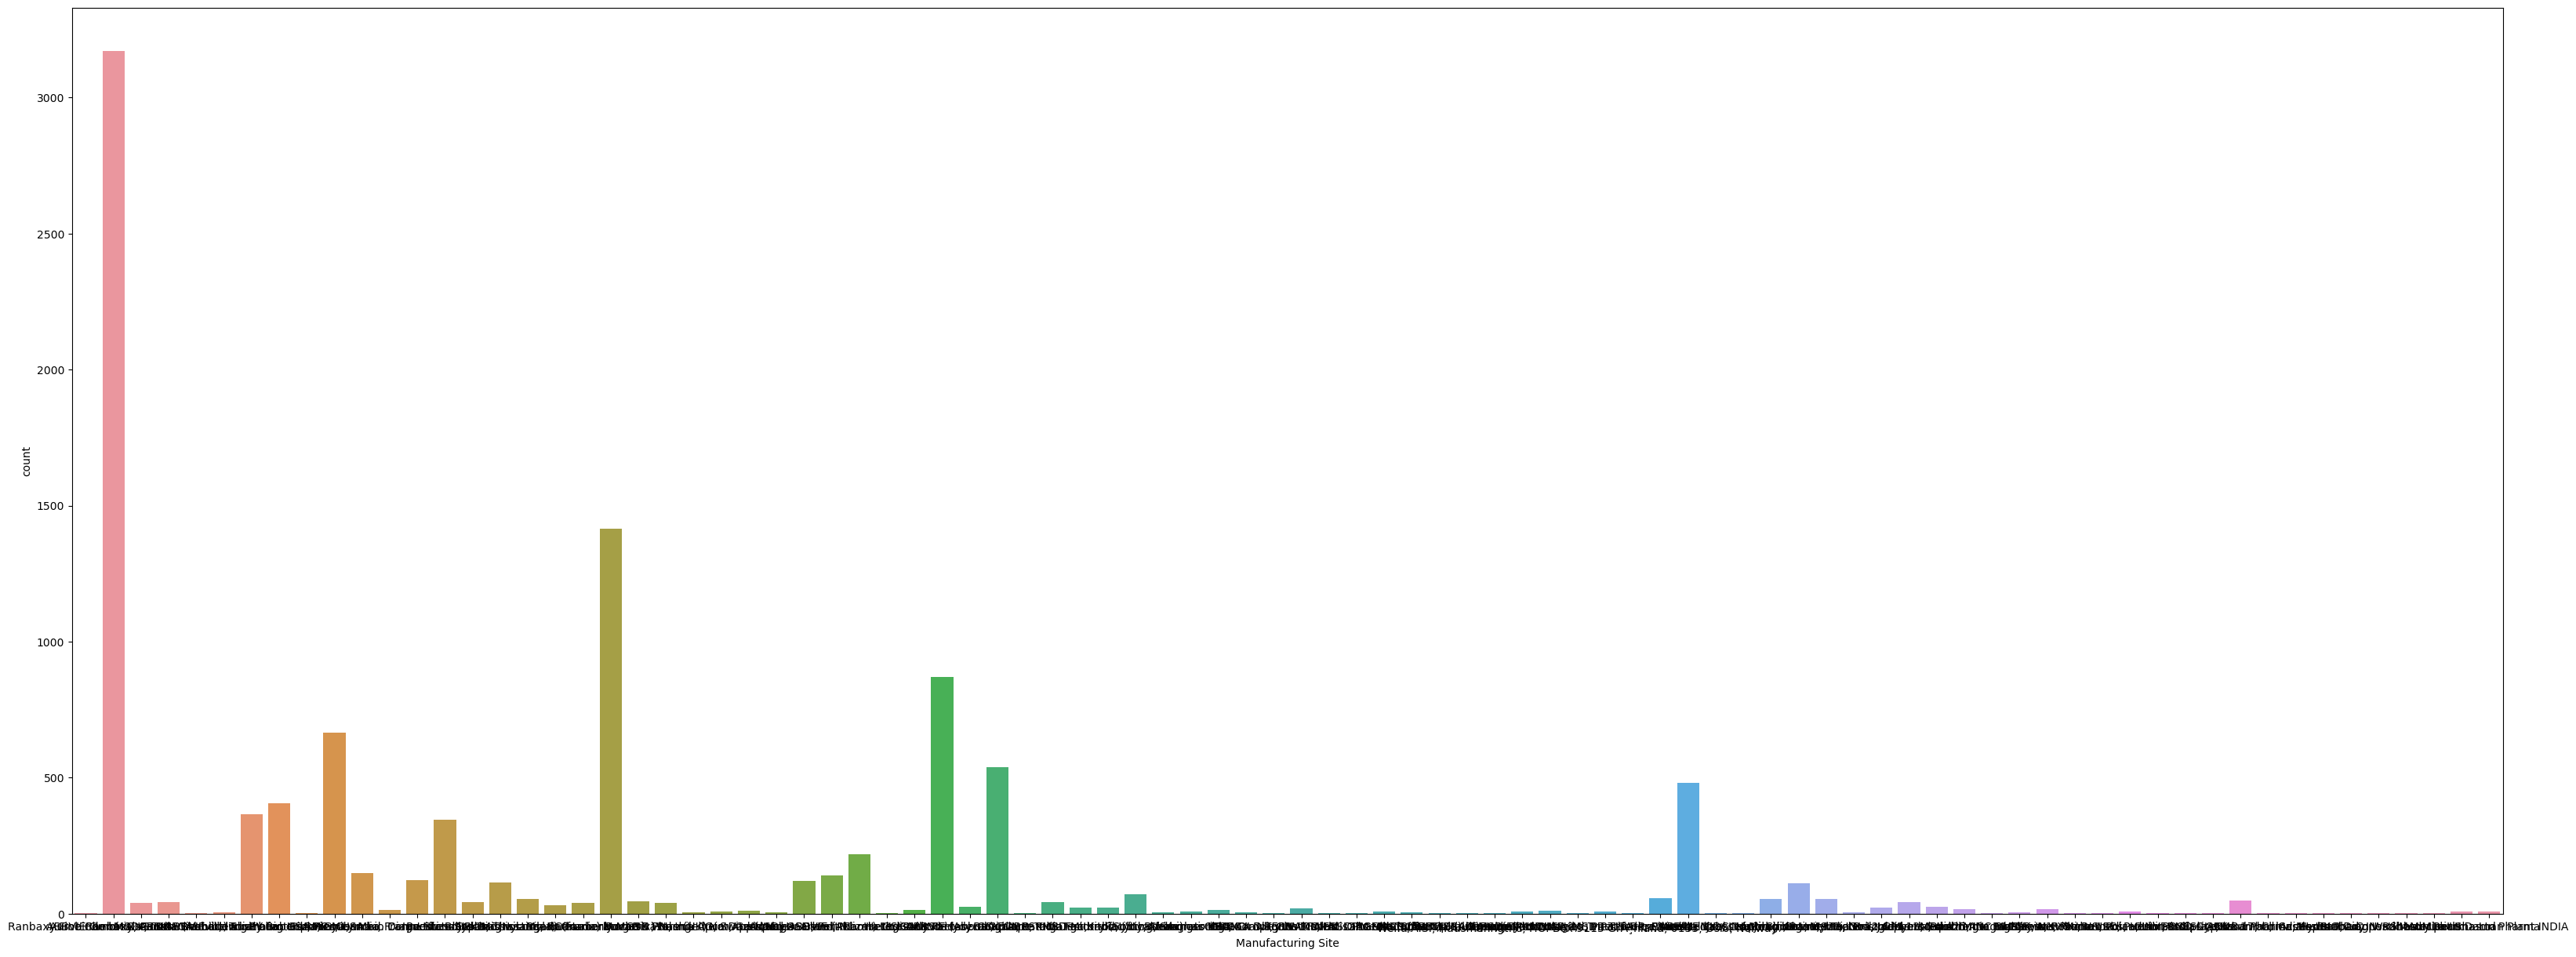

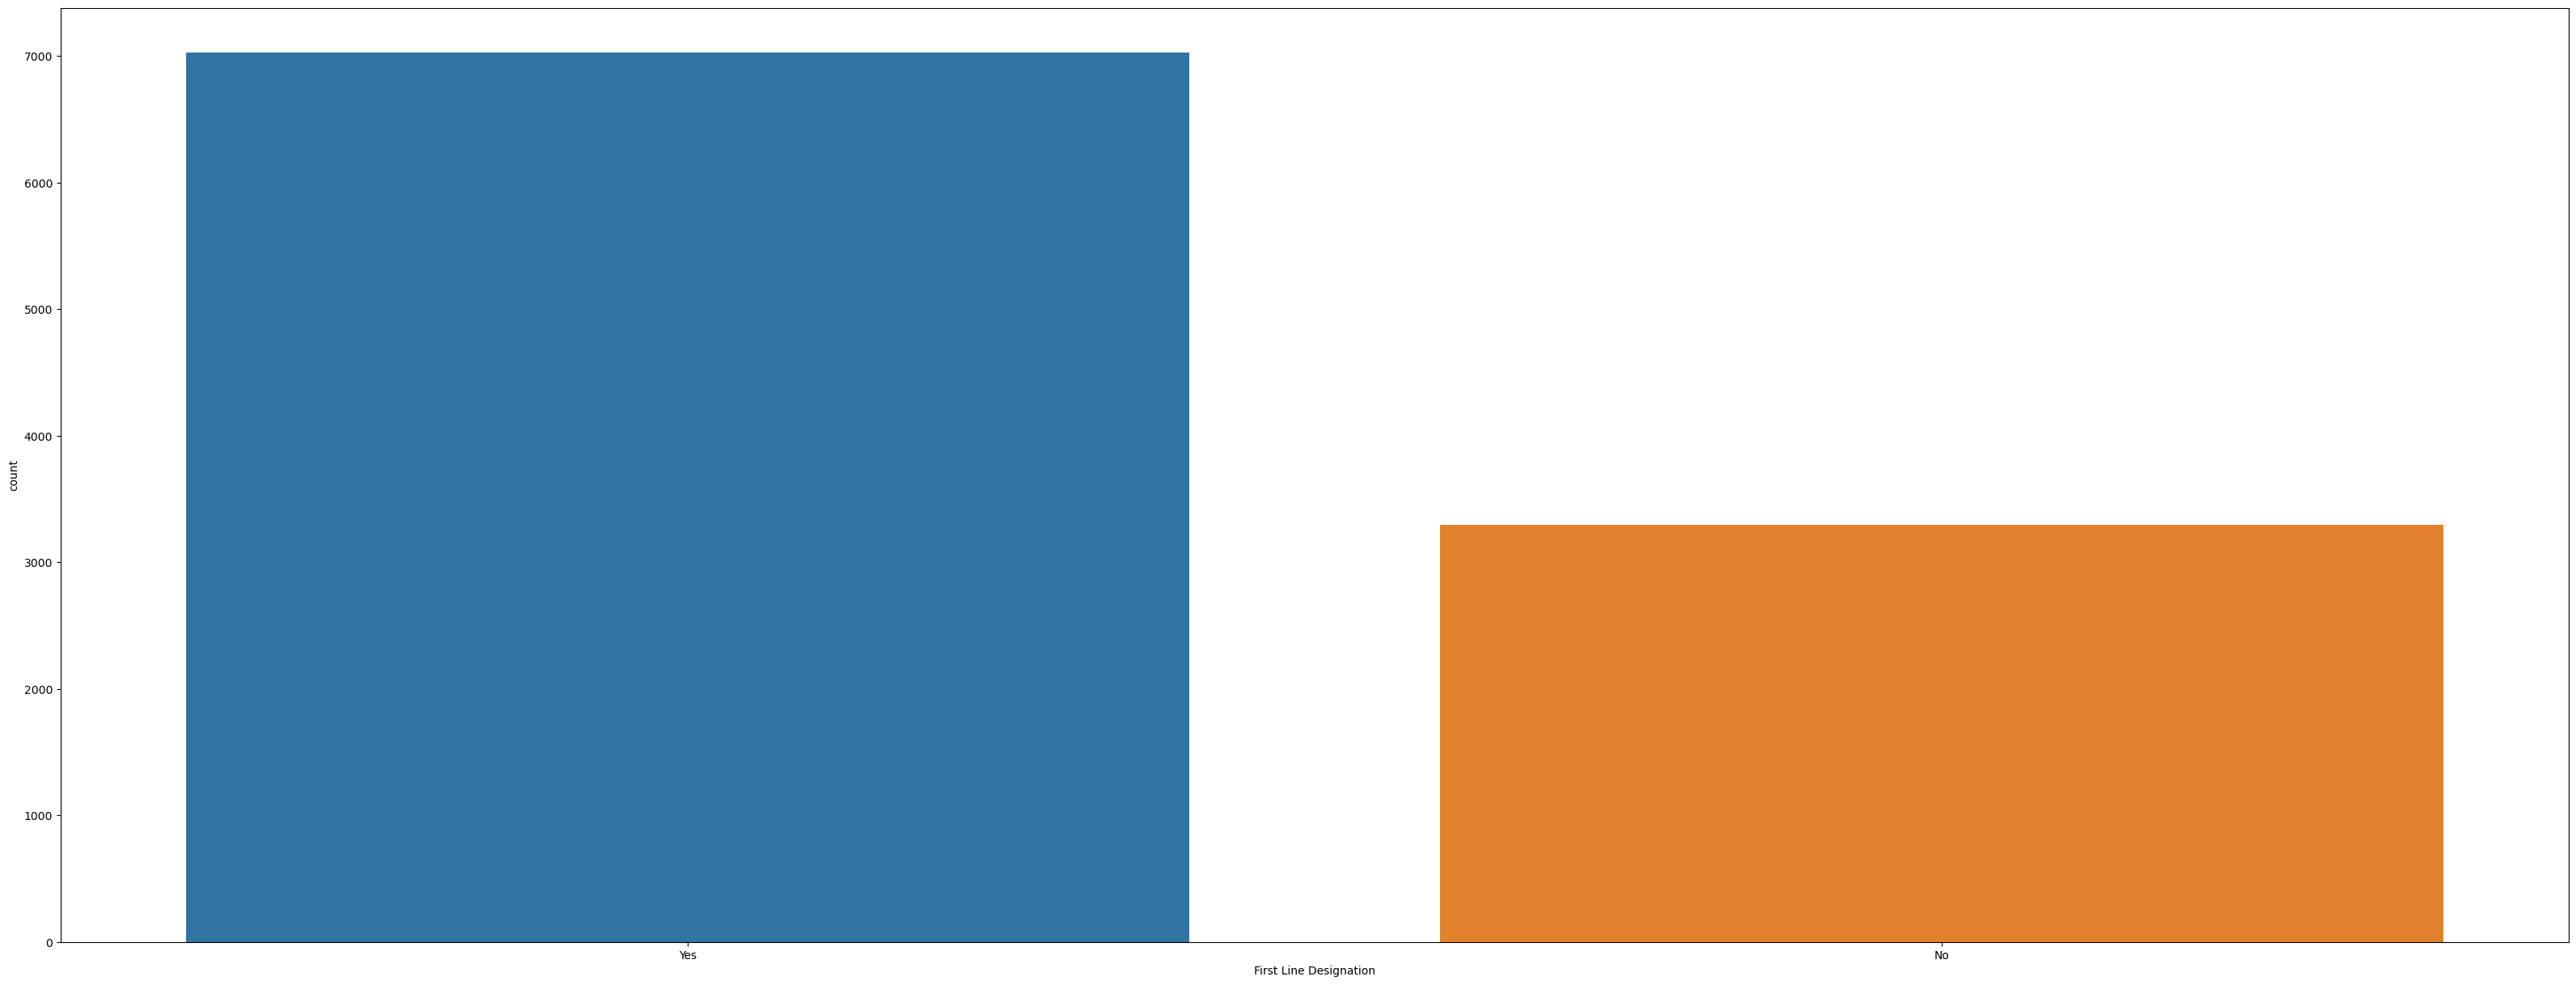

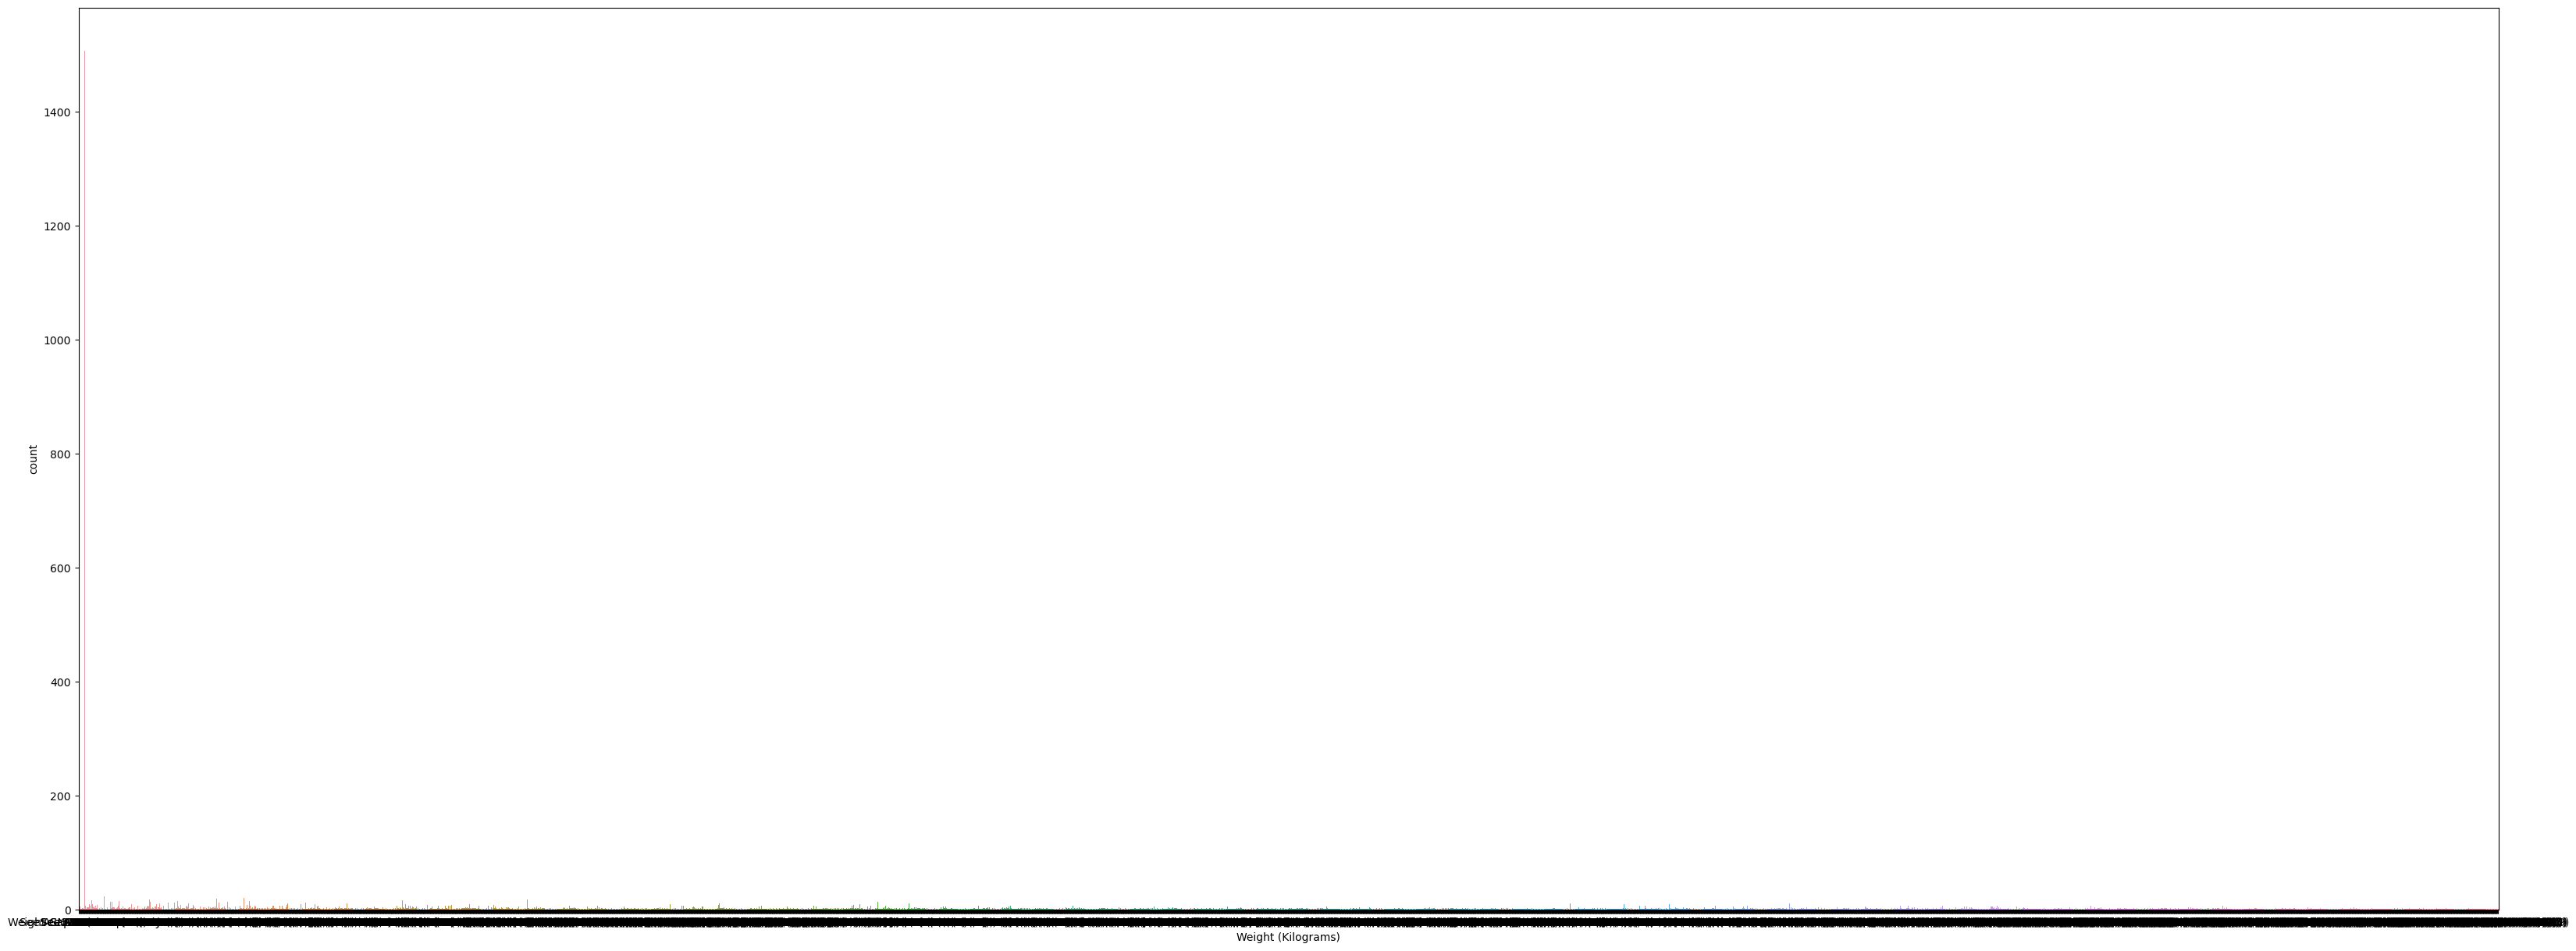

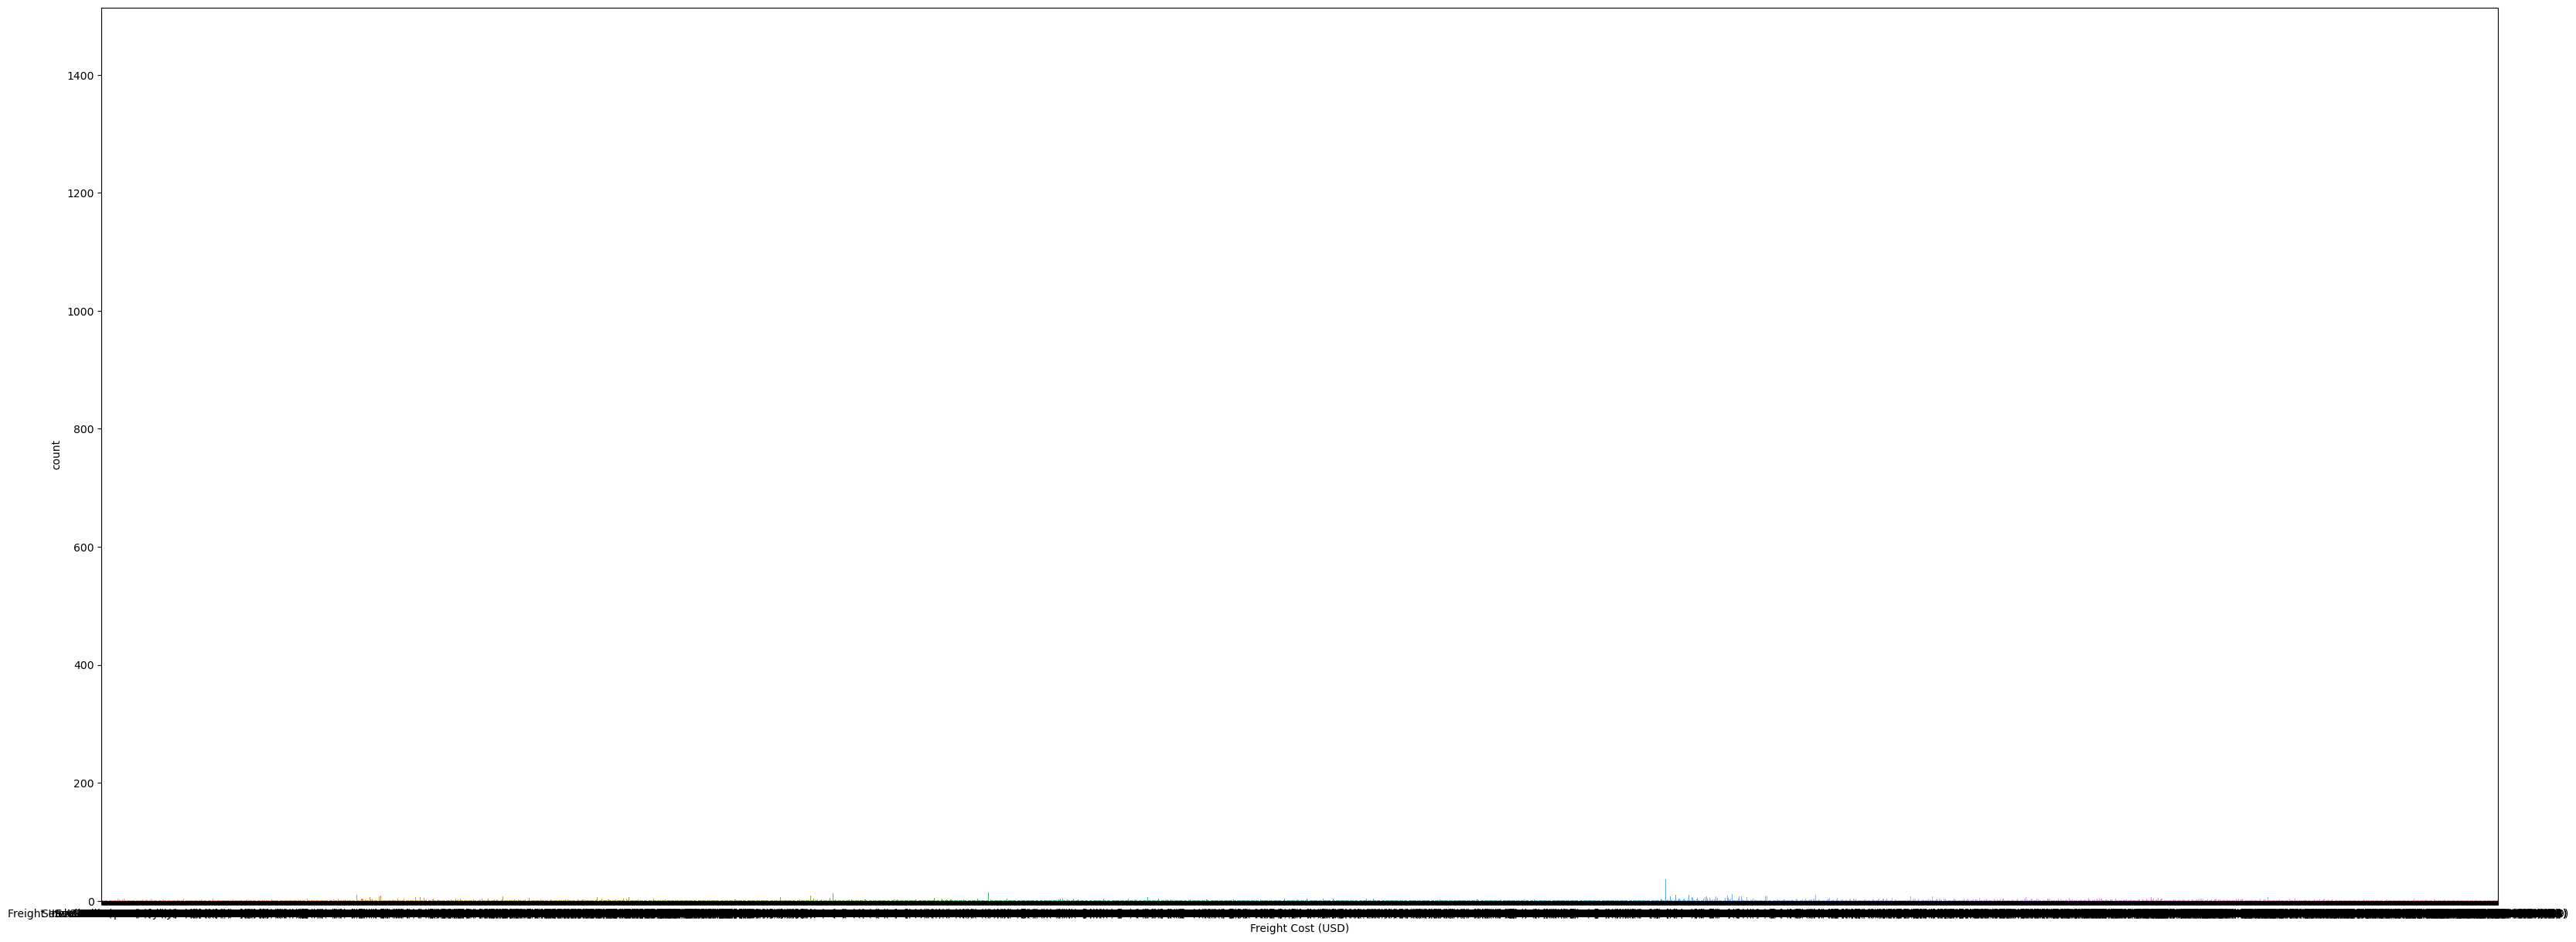

In [26]:
for i in df[cat_cols].columns:
    plt.figure(figsize=(40,15))
    sns.countplot(x = df[i])
    plt.show()

In [16]:
df[cat_cols].columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

In [27]:
df.groupby('Country').sum().reset_index()  # For numerical

C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\3458159197.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Country').sum().reset_index()


,Country,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
0,Afghanistan,143637,2100,115,4.617350e+03,111.55,0.34,5.43
1,Angola,301036,810,3920,1.984000e+05,269.56,5.02,398.56
2,Belize,85192,240,300,6.300000e+02,2.10,0.01,1.04
3,Benin,794425,765,137349,7.877255e+05,187.48,3.35,1294.33
4,Botswana,1971498,3839,119532,1.632899e+06,7052.54,264.21,2105.44
5,Burkina Faso,114540,90,165,4.512500e+02,8.85,0.18,0.53
6,Burundi,7173897,8031,203212,3.351580e+06,2051.81,55.47,4012.37
7,Cameroon,4302359,4342,1790405,1.462917e+07,3864.62,55.66,18707.34
8,"Congo, DRC",23862813,30445,518546,5.772336e+06,6032.41,171.91,6704.27
9,Côte d'Ivoire,58832859,96158,11898572,1.208845e+08,22882.35,654.56,182381.08


In [28]:
df[cat_cols].groupby('Country').sum().reset_index() # for categorical

,Country,Project Code,PQ #,PO / SO #,ASN/DN #,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
0,Afghanistan,101-AF-T30101-AF-T30101-AF-T30,FPQ-15746FPQ-15746FPQ-15746,SCMS-276460SCMS-275090SCMS-275090,ASN-31199ASN-30861ASN-30861,PMO - USPMO - USPMO - US,Direct DropDirect DropDirect Drop,EXWEXWEXW,AirAirAir,1/20/151/20/151/20/15,2/12/152/9/152/9/15,18-Aug-1512-Jul-1512-Jul-15,18-Aug-1512-Jul-1512-Jul-15,18-Aug-1513-Jul-1513-Jul-15,ANTMANTMANTM,MalariaMalariaMalaria,AMSTELFARMA B.V.IMRES B.V.IMRES B.V.,"Sulfadoxine/Pyrimethamine 500/25mg, tablets, 1...",Sulfadoxine/PyrimethamineQuinine (as dihydroch...,GenericGenericGeneric,500/25mg600mg/2ml300mg,Tablet - FDCInjectionTablet,"Micro Labs, Hosur, IndiaGland Pharma, Hyderaba...",YesYesNo,2168See ASN-30861 (ID#:41238),525.56555.49See ASN-30861 (ID#:41238)
1,Angola,120-AO-T01120-AO-T01103-AO-T30103-AO-T30102-AO...,Pre-PQ ProcessPre-PQ ProcessFPQ-11074FPQ-11252...,SO-780SO-779SCMS-171780SCMS-171790SCMS-91620SC...,DN-256DN-249ASN-17959ASN-17969ASN-9640ASN-9551...,PMO - USPMO - USPMO - USPMO - USPMO - USPMO - ...,From RDCFrom RDCDirect DropDirect DropDirect D...,N/A - From RDCN/A - From RDCFCAEXWEXWEXWN/A - ...,TruckTruckAirAirAirAirAir,Pre-PQ ProcessPre-PQ Process12/7/1212/12/1210/...,N/A - From RDCN/A - From RDC1/3/131/11/1311/10...,15-Oct-0715-Oct-0725-Apr-1312-Mar-1314-Apr-111...,15-Oct-0715-Oct-0725-Apr-1312-Mar-1314-Apr-111...,15-Oct-0715-Oct-0725-Apr-1312-Mar-1314-Apr-111...,HRDTHRDTARVARVHRDTHRDTARV,HIV testHIV testPediatricPediatricHIV testHIV ...,SCMS from RDCSCMS from RDCABBVIE LOGISTICS (FO...,"HIV 1/2, Determine Complete HIV Kit, 100 Tests...","HIV 1/2, Determine Complete HIV KitHIV 1/2, Un...",DetermineUni-GoldKaletraGenericUni-GoldDetermi...,80/20mg/ml50mg20mg/ml,Test kitTest kitOral solutionCapsuleTest kitTe...,"ABBVIE GmbH & Co.KG WiesbadenTrinity Biotech, ...",YesYesYesYesYesYesYes,495449221260865173,1012.59952.044281.43840.179597.913790.12322.47
2,Belize,100-BZ-T30,FPQ-7883,SO-40050,DN-2267,PMO - US,From RDC,N/A - From RDC,Air,6/17/11,N/A - From RDC,15-Jul-11,1-Jul-11,1-Jul-11,ARV,Pediatric,SCMS from RDC,"Zidovudine 10mg/ml, oral solution w/syringe, B...",Zidovudine,Generic,10mg/ml,Oral solution,"Aurobindo Unit III, India",Yes,Weight Captured Separately,1959.61
3,Benin,128-BJ-T01128-BJ-T01128-BJ-T01100-BJ-T30100-BJ...,Pre-PQ ProcessPre-PQ ProcessPre-PQ ProcessFPQ-...,SCMS-17280SCMS-17280SCMS-17290SCMS-109830SO-39...,ASN-1412ASN-1380ASN-1355ASN-11115DN-2237DN-225...,PMO - USPMO - USPMO - USPMO - USPMO - USPMO - ...,Direct DropDirect DropDirect DropDirect DropFr...,EXWEXWEXWEXWN/A - From RDCN/A - From RDCN/A - ...,AirAirAirAirAirAirAirAirAirAirAirAirAir,Pre-PQ ProcessPre-PQ ProcessPre-PQ Process5/16...,2/6/082/6/082/6/085/27/11N/A - From RDCN/A - F...,10-Mar-0810-Mar-084-Mar-0812-Jul-1113-Jun-1113...,10-Mar-084-Mar-084-Mar-0812-Jul-119-Jun-1130-J...,10-Mar-084-Mar-084-Mar-0812-Jul-119-Jun-1130-J...,HRDTHRDTHRDTARVARVARVARVARVARVARVARVARVARV,HIV test - AncillaryHIV testHIV testAdultAdult...,"Orgenics, LtdOrgenics, LtdStandard Diagnostics...","HIV, Lancet, Safety, for HIV Test kits, 100 Pc...","HIV, Lancet, Safety, for HIV Test kits, 100 Pc...",GenericDetermineBiolineGenericGenericAluviaGen...,600/300/300mg600mg200/50mg150/200/30mg150/30mg...,Test kit - AncillaryTest kitTest kitTablet - F...,Inverness JapanInverness JapanStandard Diagnos...,YesYesYesYesYesYesYesNoNoNoNoYesNo,Weight Captured Separately3277017576821292192S...,Invoiced Separately6687.511136.375864.5628541....
4,Botswana,102-BW-T01144-BW-T01102-BW-T01102-BW-T01102-BW...,Pre-PQ ProcessPre-PQ ProcessPre-PQ ProcessPre-...,SCMS-31370SCMS-41870SCMS-46071SCMS-16730SCMS-1...,ASN-2796ASN-4896ASN-4324ASN-1721ASN-1

In [34]:
df.groupby(['Country','Shipment Mode']).sum().reset_index()

C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\1712493470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Country','Shipment Mode']).sum().reset_index()


,Country,Shipment Mode,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
0,Afghanistan,Air,143637,2100,115,4.617350e+03,111.55,0.34,5.43
1,Angola,Air,278458,690,3620,1.816000e+05,157.56,2.62,371.68
2,Angola,Truck,22578,120,300,1.680000e+04,112.00,2.40,26.88
3,Belize,Air,85192,240,300,6.300000e+02,2.10,0.01,1.04
4,Benin,Air,794425,765,137349,7.877255e+05,187.48,3.35,1294.33
...,...,...,...,...,...,...,...,...,...
80,Zambia,Truck,26555366,20790,23375265,1.812618e+08,2885.10,67.60,277955.59
81,Zimbabwe,Air,5817492,14404,1286469,1.429309e+07,4069.26,80.90,21107.91
82,Zimbabwe,Air Charter,1055712,690,795000,2.742166e+06,71.03,2.18,2818.92
83,Zimbabwe,Ocean,177079,180,289053,1.327196e+06,17.58,0.29,1492.15


In [35]:
df.groupby(['Country','Shipment Mode','Freight Cost (USD)']).sum().reset_index()

C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\3905663732.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Country','Shipment Mode','Freight Cost (USD)']).sum().reset_index()


,Country,Shipment Mode,Freight Cost (USD),ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
0,Afghanistan,Air,525.56,28996,1000,26,936.00,36.00,0.04,1.10
1,Afghanistan,Air,555.49,41238,100,32,800.00,25.00,0.25,0.94
2,Afghanistan,Air,See ASN-30861 (ID#:41238),73403,1000,57,2881.35,50.55,0.05,3.39
3,Angola,Air,13790.1,62322,100,1800,144000.00,80.00,0.80,310.46
4,Angola,Air,2322.47,83646,240,480,6000.00,12.50,0.05,7.42
...,...,...,...,...,...,...,...,...,...,...
6594,Zimbabwe,Truck,See DN-644 (ID#:11894),12508,60,6295,51304.25,8.15,0.14,82.09
6595,Zimbabwe,Truck,See DN-774 (ID#:11268),12811,100,1800,129582.00,71.99,0.72,207.33
6596,Zimbabwe,Truck,See DN-813 (ID#:10979),22535,60,12000,64040.00,14.01,0.47,102.46
6597,Zimbabwe,Truck,See DN-838 (ID#:10718),12794,25,4342,86840.00,20.00,0.80,138.94


In [39]:
df.groupby(['Country','Shipment Mode']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum'})

PO / SO #  \
Country     Shipment Mode              
Afghanistan Air                    3   
Angola      Air                    5   
            Truck                  2   
Belize      Air                    1   
Benin       Air                   13   
...                              ...   
Zambia      Truck                386   
Zimbabwe    Air                  145   
            Air Charter           18   
            Ocean                  3   
            Truck                360   

                                                          Freight Cost (USD)  
Country     Shipment Mode                                                     
Afghanistan Air                        525.56555.49See ASN-30861 (ID#:41238)  
Angola      Air                            4281.43840.179597.913790.12322.47  
            Truck                                              1012.59952.04  
Belize      Air                                                      1959.61  
Benin       Air            Invoiced Separately6687.511136.375864.5628541....  
...                                                                      ...  
Zambia      Truck          15220.185014.652882.854887.184060.552938.92406...  
Zimbabwe    Air            Freight Included in Commodity Cost4112.46Freig...  
            Air Charter    23014.3546213.425682.6528788.7313959.2241158.4...  
            Ocean                                   25189.5116210.3122059.25  
            Truck          31351949.8418941.3120992145.17566322666.98See ...  

[85 rows x 2 columns]

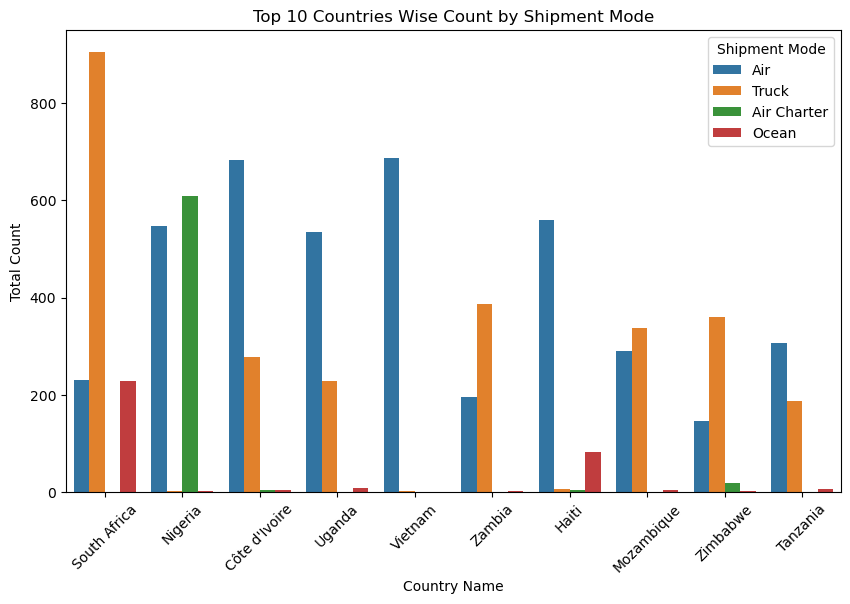

In [47]:
# Get the top 10 countries based on their occurrence count
top_10_countries = df['Country'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 countries
df_top_10 = df[df['Country'].isin(top_10_countries)]

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10, x='Country', hue='Shipment Mode', order=top_10_countries)
plt.title('Top 10 Countries Wise Count by Shipment Mode')
plt.xticks(rotation=45)
plt.ylabel('Total Count')
plt.xlabel('Country Name')
plt.legend(title='Shipment Mode', loc='upper right')
plt.show()

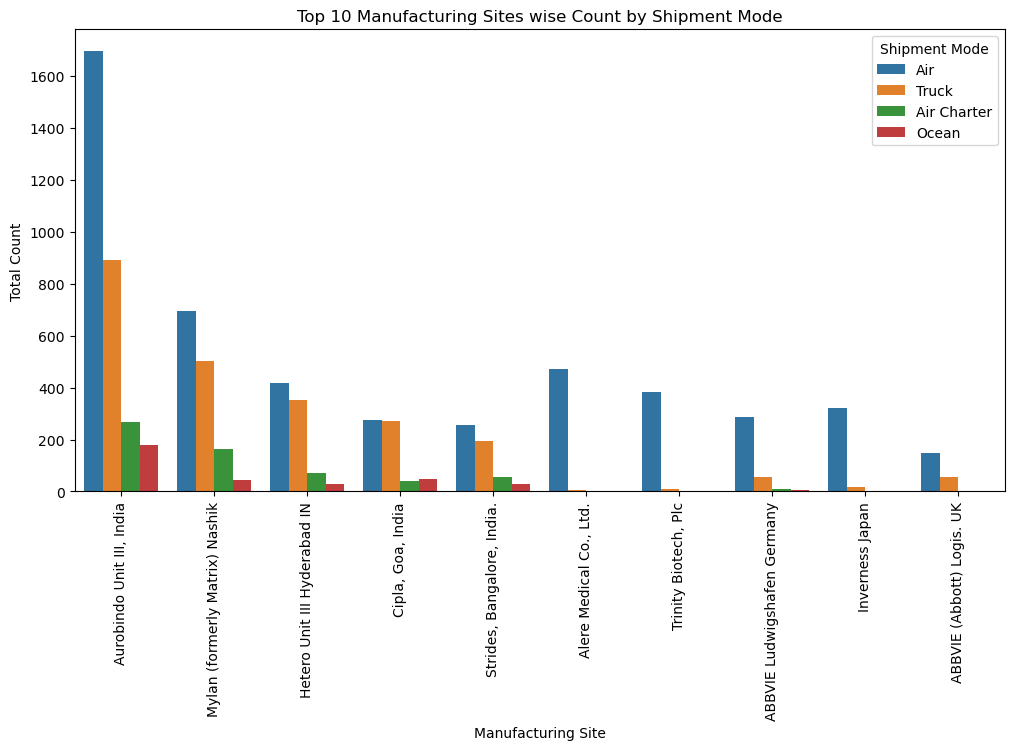

In [61]:
# Get the top 10 manufacturing sites based on their occurrence count
top_10_manufacturing_sites = df['Manufacturing Site'].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 manufacturing sites
df_top_10 = df[df['Manufacturing Site'].isin(top_10_manufacturing_sites)]

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='Manufacturing Site', hue='Shipment Mode', order=top_10_manufacturing_sites)
plt.title('Top 10 Manufacturing Sites wise Count by Shipment Mode')
plt.xticks(rotation=90)
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site')
plt.legend(title='Shipment Mode', loc='upper right')
plt.show()


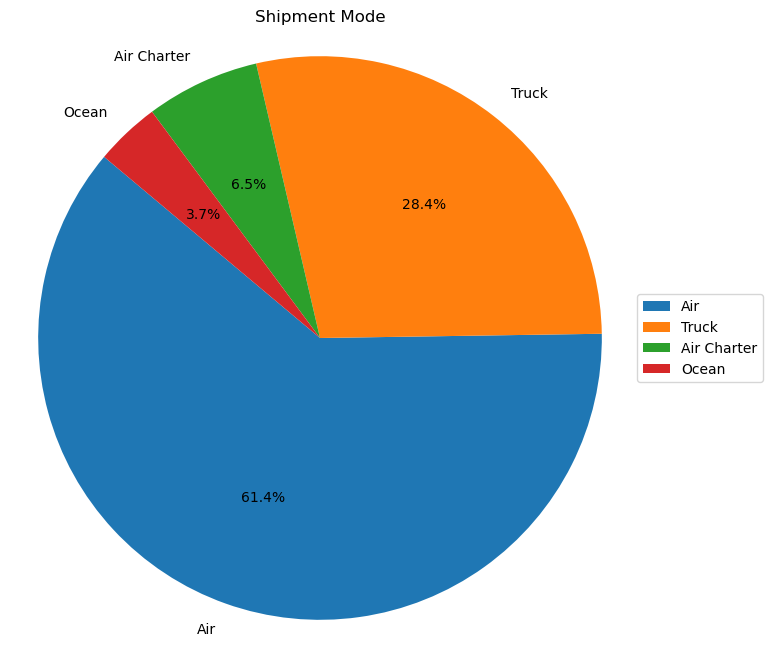

In [31]:
# Calculate the value counts for each category in the "Shipment Mode" column
ShippingMode = df["Shipment Mode"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ShippingMode, labels=ShippingMode.index, autopct='%1.1f%%', startangle=140)

# Set the title for the pie chart
plt.title("Shipment Mode")

# Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.axis('equal')

# Add a legend to the pie chart on the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()

# Featuring Enginering

In [104]:
# Remove wrong entry data in Weight (Kilograms) and Freight Cost(USD) and convert into numerical column
df = df[(df['Weight (Kilograms)'] != 'Weight Captured Separately')]
df = df[(df['Freight Cost (USD)'] != 'Freight Included in Commodity Cost')]
df = df[(df['Freight Cost (USD)'] != 'Invoiced Separately')]

# Remove all rows that contain the text 'See' in the 'Weight (Kilograms)' and 'Freight Cost (USD)' columns
filtered_df = df[~df[['Weight (Kilograms)','Freight Cost (USD)']].apply(lambda row: row.astype(str).str.contains('See').any(), axis=1)]


In [105]:
filtered_df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,86802,111-MZ-T30,FPQ-15195,SO-50130,DN-4235,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,10/17/14,N/A - From RDC,29-May-15,9-Jun-15,15-Jun-15,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,300000,2316000.00,7.72,0.13,Hetero Unit III Hyderabad IN,Yes,39688,28277.42,2725.93
10306,86803,111-MZ-T30,FPQ-14843,SO-49721,DN-4236,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,8/21/14,N/A - From RDC,29-May-15,15-Jun-15,15-Jun-15,ARV,Adult,SCMS from RDC,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,300/300mg,Tablet - FDC,30,16006,73467.54,4.59,0.15,"Hetero, Jadcherla, unit 5, IN",Yes,1504,1653.9,75.52
10310,86808,114-UG-T30,FPQ-15294,SO-50070,DN-4259,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,11/3/14,N/A - From RDC,30-Jun-15,4-Jun-15,15-Jun-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,18000,64800.00,3.60,0.06,Mylan (formerly Matrix) Nashik,Yes,2253,3785.72,76.27
10315,86814,151-NG-T30,FPQ-14989,SO-51424,DN-4276,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,9/19/14,N/A - From RDC,30-Jun-15,15-May-15,22-May-15,ARV,Adult,SCMS from RDC,"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,70000,1304800.00,18.64,0.16,ABBVIE Ludwigshafen Germany,Yes,15198,26180,1341.33


In [110]:
# 'Weight (Kilograms)' and 'Freight Cost (USD)' into numeric
filtered_df[['Weight (Kilograms)', 'Freight Cost (USD)']] = filtered_df[['Weight (Kilograms)', 'Freight Cost (USD)']].apply(pd.to_numeric)
#'Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date' convert into Datetime
filtered_df[['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']] = filtered_df[['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']].apply(pd.to_datetime)

C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\1379383193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['Weight (Kilograms)', 'Freight Cost (USD)']] = filtered_df[['Weight (Kilograms)', 'Freight Cost (USD)']].apply(pd.to_numeric)
C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\1379383193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']] = filtered_df[['Scheduled Delivery Date','Delivered to

In [111]:
filtered_df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-11-14,2006-11-14,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.50,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,2006-08-27,2006-08-27,2006-08-27,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-09-01,2006-09-01,2006-09-01,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-08-11,2006-08-11,2006-08-11,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,86802,111-MZ-T30,FPQ-15195,SO-50130,DN-4235,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,10/17/14,N/A - From RDC,2015-05-29,2015-06-09,2015-06-15,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,300000,2316000.00,7.72,0.13,Hetero Unit III Hyderabad IN,Yes,39688,28277.42,2725.93
10306,86803,111-MZ-T30,FPQ-14843,SO-49721,DN-4236,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,8/21/14,N/A - From RDC,2015-05-29,2015-06-15,2015-06-15,ARV,Adult,SCMS from RDC,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,300/300mg,Tablet - FDC,30,16006,73467.54,4.59,0.15,"Hetero, Jadcherla, unit 5, IN",Yes,1504,1653.90,75.52
10310,86808,114-UG-T30,FPQ-15294,SO-50070,DN-4259,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,11/3/14,N/A - From RDC,2015-06-30,2015-06-04,2015-06-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,18000,64800.00,3.60,0.06,Mylan (formerly Matrix) Nashik,Yes,2253,3785.72,76.27
10315,86814,151-NG-T30,FPQ-14989,SO-51424,DN-4276,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,9/19/14,N/A - From RDC,2015-06-30,2015-05-15,2015-05-22,ARV,Adult,SCMS from RDC,"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,70000,1304800.00,18.64,0.16,ABBVIE Ludwigshafen Germany,Yes,15198,26180.00,1341.33


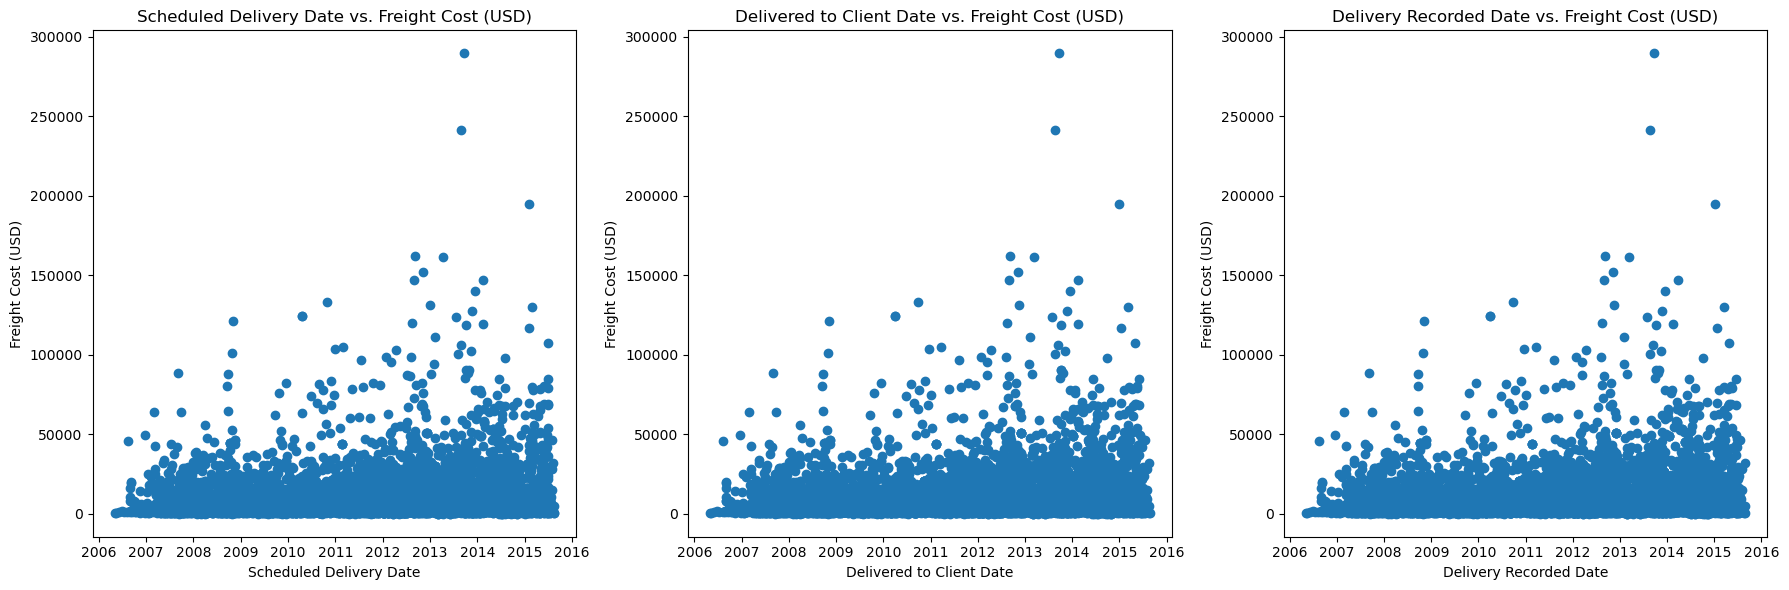

In [116]:
#Check relation ship Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date' w.r.t Freight Cost (USD) 
plt.figure(figsize=(18, 6))

# Scatter plot for Scheduled Delivery Date
plt.subplot(1,3,1)
plt.scatter(filtered_df['Scheduled Delivery Date'], filtered_df['Freight Cost (USD)'])
plt.xlabel('Scheduled Delivery Date')
plt.ylabel('Freight Cost (USD)')
plt.title('Scheduled Delivery Date vs. Freight Cost (USD)')

# Scatter plot for Delivered to Client Date
plt.subplot(1,3,2)
plt.scatter(filtered_df['Delivered to Client Date'], filtered_df['Freight Cost (USD)'])
plt.xlabel('Delivered to Client Date')
plt.ylabel('Freight Cost (USD)')
plt.title('Delivered to Client Date vs. Freight Cost (USD)')

# Scatter plot for Delivery Recorded Date
plt.subplot(1,3,3)
plt.scatter(filtered_df['Delivery Recorded Date'], filtered_df['Freight Cost (USD)'])
plt.xlabel('Delivery Recorded Date')
plt.ylabel('Freight Cost (USD)')
plt.title('Delivery Recorded Date vs. Freight Cost (USD)')

plt.tight_layout()
plt.show()

In [117]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6175 entries, 0 to 10316
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            6175 non-null   int64         
 1   Project Code                  6175 non-null   object        
 2   PQ #                          6175 non-null   object        
 3   PO / SO #                     6175 non-null   object        
 4   ASN/DN #                      6175 non-null   object        
 5   Country                       6175 non-null   object        
 6   Managed By                    6175 non-null   object        
 7   Fulfill Via                   6175 non-null   object        
 8   Vendor INCO Term              6175 non-null   object        
 9   Shipment Mode                 5964 non-null   object        
 10  PQ First Sent to Client Date  6175 non-null   object        
 11  PO Sent to Vendor Date       

# Handling Missing Values

In [136]:
filtered_df['Shipment Mode'] = filtered_df['Shipment Mode'].fillna(filtered_df['Shipment Mode'].mode()[0])
filtered_df['Dosage'] = filtered_df['Dosage'].fillna(filtered_df['Dosage'].mode()[0])
filtered_df['Line Item Insurance (USD)'] = filtered_df['Line Item Insurance (USD)'].fillna(filtered_df['Line Item Insurance (USD)'].median())

C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\2958390372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Shipment Mode'] = filtered_df['Shipment Mode'].fillna(filtered_df['Shipment Mode'].mode()[0])
C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\2958390372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Dosage'] = filtered_df['Dosage'].fillna(filtered_df['Dosage'].mode()[0])
C:\Users\miqba\AppData\Local\Temp\ipykernel_30140\2958390372.py:3: SettingWithCopyWarning: 
A

converting Categotical into numerical columns

In [155]:
filtered_df.select_dtypes(include='object').columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Product Group', 'Sub Classification', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Manufacturing Site', 'First Line Designation'],
      dtype='object')

In [158]:
filtered_df = pd.get_dummies(filtered_df,columns=['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Product Group', 'Sub Classification', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Manufacturing Site', 'First Line Designation'],drop_first=True)

In [159]:
filtered_df.head()

,ID,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Project Code_100-BW-T01,Project Code_100-CI-T01,Project Code_100-DO-T30,Project Code_100-GH-T30,Project Code_100-GN-T30,Project Code_100-HT-T01,Project Code_100-PK-T01,Project Code_100-SL-T01,Project Code_100-SN-T01,Project Code_100-SZ-T01,Project Code_100-ZM-T30,Project Code_100-ZW-T01,Project Code_100-ZW-T30,Project Code_101-AF-T30,Project Code_101-CD-T30,Project Code_101-KE-T30,Project Code_102-AO-T30,Project Code_102-BI-T30,Project Code_102-BW-T01,Project Code_102-BW-T30,Project Code_102-CD-T30,Project Code_102-DO-T30,Project Code_102-GY-T01,Project Code_102-GY-T30,Project Code_102-KE-T01,Project Code_102-KE-T30,Project Code_102-LS-T01,Project Code_102-LY-T30,Project Code_102-ML-T30,Project Code_102-MW-T30,Project Code_102-NG-T01,Project Code_102-SD-T30,Project Code_102-SS-T30,Project Code_102-SZ-T30,Project Code_102-UG-T30,Project Code_102-ZW-T30,Project Code_103-AO-T30,Project Code_103-CD-T30,...,Manufacturing Site_Gilead(Nycomed) Oranienburg DE,Manufacturing Site_Gland Pharma Ltd Pally Factory,"Manufacturing Site_Gland Pharma, Hyderabad, IN","Manufacturing Site_Guilin OSD site, No 17, China",Manufacturing Site_Hetero Unit III Hyderabad IN,"Manufacturing Site_Hetero, Jadcherla, unit 5, IN",Manufacturing Site_Human Diagnostic,Manufacturing Site_INVERNESS ANY,Manufacturing Site_INVERNESS ORGENICS LINE,Manufacturing Site_Inverness Japan,Manufacturing Site_Inverness USA,Manufacturing Site_Ipca Dadra/Nagar Haveli IN,"Manufacturing Site_Janssen Ortho LLC, Puerto Rico","Manufacturing Site_Janssen-Cilag, Latina, IT","Manufacturing Site_KHB Test Kit Facility, Shanghai China",Manufacturing Site_MSD Elkton USA,"Manufacturing Site_MSD Manati, Puerto Rico, (USA)","Manufacturing Site_MSD Patheon, Canada",Manufacturing Site_MSD South Granville Australia,"Manufacturing Site_MSD, Haarlem, NL",Manufacturing Site_Macleods Daman Plant INDIA,Manufacturing Site_Meditab (for Cipla) Daman IN,"Manufacturing Site_Medochemie Factory A, CY","Manufacturing Site_Medopharm Malur Factory, INDIA","Manufacturing Site_Micro Labs Ltd. (Brown & Burk), India","Manufacturing Site_Micro Labs, Hosur, India","Manufacturing Site_Micro labs, Verna, Goa, India",Manufacturing Site_Mylan (formerly Matrix) Nashik,"Manufacturing Site_Mylan, H-12 & H-13, India",Manufacturing Site_Not Applicable,"Manufacturing Site_Novartis Pharma AG, Switzerland","Manufacturing Site_Novartis Pharma Suffern, USA","Manufacturing Site_OMEGA Diagnostics, UK","Manufacturing Site_Orasure Technologies, Inc","Manufacturing Site_Orasure Technologies, Inc USA","Manufacturing Site_Pacific Biotech, Thailand",Manufacturing Site_Premier Med. Corp Ltd. India,Manufacturing Site_Premier Medical Corporation,Manufacturing Site_Ranbaxy Fine Chemicals LTD,Manufacturing Site_Ranbaxy per Shasun Pharma,Manufacturing Site_Ranbaxy per Shasun Pharma Ltd,"Manufacturing Site_Ranbaxy, Paonta Shahib, India","Manufacturing Site_Remedica, Limassol, Cyprus",Manufacturing Site_Roche Basel,Manufacturing Site_Roche Madrid,"Manufacturing Site_Standard Diagnostics, Korea","Manufacturing Site_Strides, Bangalore, India.","Manufacturing Site_Trinity Biotech, Plc","Manufacturing Site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway",Manufacturing Site_bioLytical Laboratories
0,1,2006-06-02,2006-06-02,2006-06-02,30,19,551.0,29.00,0.97,13,780.34,90.535,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3,2006-11-14,2006-11-14,2006-11-14,240,1000,6200.0,6.20,0.03,358,4521.50,90.535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4